# 1. Í∞úÎ∞ú ÌôòÍ≤Ω ÏÑ∏ÌåÖÌïòÍ∏∞

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [42]:
import matplotlib.font_manager as fm

# ÏÇ¨Ïö©Ìï† ÌïúÍ∏Ä Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï (Ïòà: ÏúàÎèÑÏö∞Ïùò Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# Ìè∞Ìä∏ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
font_name = fm.FontProperties(fname=font_path).get_name()

print(f"Í∞ÄÏ†∏Ïò® Ìè∞Ìä∏ Ïù¥Î¶Ñ: {font_name}")

# matplotlibÏùò rcParams ÏÑ§Ï†ïÏùÑ ÌÜµÌï¥ Ìè∞Ìä∏ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ ÏÑ§Ï†ï

print(f"matplotlib Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: {plt.rcParams['font.family']}")

Í∞ÄÏ†∏Ïò® Ìè∞Ìä∏ Ïù¥Î¶Ñ: Malgun Gothic
matplotlib Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: ['Malgun Gothic']


# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [43]:
df = "C:/Users/PC/Documents/codeit_study/train_df.csv"

In [44]:
try:
    df = pd.read_csv(df, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")
except UnicodeDecodeError:
    df = pd.read_csv(df, encoding='cp949', on_bad_lines='skip')
    print("CP949 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")

UTF-8 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.


# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

## Ï≤¥Í∞êÏò®ÎèÑ Ï†ÑÏ≤òÎ¶¨

In [45]:
import numpy as np
import pandas as pd

# ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Ïõî Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df['date_dt'] = pd.to_datetime(df['date_dt'])
df['month'] = df['date_dt'].dt.month

# Ïó¨Î¶ÑÏ≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (5~9Ïõî)
def summer_chi(ta, rh):
    try:
        tw = (
            ta * np.arctan(0.151977 * np.sqrt(rh + 8.313659)) +
            np.arctan(ta + rh) -
            np.arctan(rh - 1.676331) +
            0.00391838 * rh ** 1.5 * np.arctan(0.023101 * rh) -
            4.686035
        )
        chi = -0.2442 + 0.55399 * tw + 0.45535 * ta - 0.0022 * tw**2 - 0.00278 * tw * ta + 3.0
        return chi
    except:
        return np.nan

# Í≤®Ïö∏Ï≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (10~4Ïõî)
def winter_chi(ta, v):
    try:
        v_16 = v ** 0.16
        chi = 13.12 + 0.6215 * ta - 11.37 * v_16 + 0.3965 * v_16 * ta
        return chi
    except:
        return np.nan

# Ï†ÑÏ≤¥ Ï≤¥Í∞êÏò®ÎèÑ Í≥ÑÏÇ∞
def calculate_chi(row):
    if 5 <= row['month'] <= 9:
        return summer_chi(row['ta'], row['hm'])
    else:
        return winter_chi(row['ta'], row['ws'])

# Í≥ÑÏÇ∞ Ï†ÅÏö©
df['calculated_chi'] = df.apply(calculate_chi, axis=1)

# Î∞òÏò¨Î¶º
df['chi_rounded'] = df['chi'].round(1)
df['calculated_chi_rounded'] = df['calculated_chi'].round(1)

# ÏùºÏπò Ïó¨Î∂Ä ÌôïÏù∏
df['is_same'] = df['chi_rounded'] == df['calculated_chi_rounded']
match_rate = df['is_same'].mean()

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: {match_rate * 100:.2f}%')

Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: 0.49%


In [46]:
# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Î∞òÏò¨Î¶º Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥)
df['chi_diff'] = df['chi'] - df['calculated_chi']

# Î∞òÏò¨Î¶º ÌõÑ Í∏∞Ï§ÄÏúºÎ°ú Îã§Î•¥Îã§Í≥† ÌåêÎã®Îêú Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
not_matched_df = df[df['is_same'] == False]

# Ï∞®Ïù¥ ÌÜµÍ≥Ñ
diff_stats = not_matched_df['chi_diff'].describe()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):")
print(diff_stats)

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÌèâÍ∑† Ïò§Ï∞®ÎèÑ ÌôïÏù∏
mean_abs_error = not_matched_df['chi_diff'].abs().mean()
print(f"\nÎ∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: {mean_abs_error:.2f}¬∞C")


Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):
count    1.551299e+07
mean    -6.075349e-02
std      3.256133e+00
min     -2.067645e+01
25%     -2.263946e+00
50%     -6.716838e-01
75%      2.750149e+00
max      8.363749e+00
Name: chi_diff, dtype: float64

Î∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: 2.70¬∞C


| ÌÜµÍ≥ÑÌï≠Î™©           | Í∞í (¬∞C)         | ÏùòÎØ∏                                                     |
| -------------- | -------------- | ------------------------------------------------------ |
| `count`        | **15,512,999** | ÎπÑÍµêÏóê ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò                                         |
| `mean`         | **-0.06¬∞C**    | ÌèâÍ∑†Ï†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú chiÍ∞Ä Ïã§Ï†úÎ≥¥Îã§ ÏïΩÍ∞Ñ **ÎÜíÎã§**Îäî Îúª (Ïã§Ï†ú chi - Í≥ÑÏÇ∞ chi < 0) |
| `std`          | **3.26¬∞C**     | Ïò§Ï∞®Ïùò ÌëúÏ§ÄÌé∏Ï∞®. ÎåÄÎ∂ÄÎ∂Ñ Í∞íÏùÄ ¬±3.26¬∞C ÏïàÏóê Î∂ÑÌè¨                         |
| `min`          | **-20.68¬∞C**   | Í≥ÑÏÇ∞Îêú Í∞íÎ≥¥Îã§ Ïã§Ï†ú chiÍ∞Ä 20.68ÎèÑ **ÎÇÆÏùÄ Í≤ΩÏö∞**Í∞Ä ÏûàÏóàÎã§Îäî Îúª               |
| `25%`          | **-2.26¬∞C**    | ÌïòÏúÑ 25%Îäî Ïò§Ï∞®Í∞Ä -2.26¬∞C Ïù¥Ìïò                                 |
| `50%` (median) | **-0.67¬∞C**    | Ï†àÎ∞òÏùÄ -0.67¬∞C Ïù¥Ìïò                                         |
| `75%`          | **+2.75¬∞C**    | ÏÉÅÏúÑ 25%Îäî Ïò§Ï∞®Í∞Ä 2.75¬∞C Ïù¥ÏÉÅ                                  |
| `max`          | **+8.36¬∞C**    | Í≥ÑÏÇ∞Îêú Í∞íÎ≥¥Îã§ Ïã§Ï†ú chiÍ∞Ä 8.36ÎèÑ **ÎÜíÏùÄ Í≤ΩÏö∞**Í∞Ä ÏûàÏóàÎã§Îäî Îúª                |


- Ï∞®Ïù¥Í∞Ä ÌÅ∞ Ïù¥Ïú† 
    - Î™®Îç∏ÎßÅ Í≥ºÏ†ï Ï§ë ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞ ? 
        - Î™®Îç∏ÎßÅ Í≥ºÏ†ï Ï§ë Î¨∏Ï†úÍ∞Ä ÏûàÏóàÎã§Í≥† ÌïòÎçîÎùºÎèÑ ÏùºÏπòÏú®Ïù¥ 0.49Î©¥ Ï¢Ä .... ÎÇ¥Í∞Ä Îî∞Î°ú Íµ¨Ìïú Í≤ÉÏùÑ chi ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ≥† ÏßÑÌñâÏùÑ Ìï¥ÏïºÌï†Íπå ? 
- Í∏∞Ï°¥ Ï≤¥Í∞êÏò®ÎèÑ ÎÇ¥Í∞Ä Íµ¨Ìïú Ï≤¥Í∞êÏò®ÎèÑÎ°ú ÎåÄÏ≤¥ ÌõÑ ÏÇ≠Ï†ú

In [47]:
df['chi'] = df['calculated_chi']
df = df.drop(columns=['calculated_chi_rounded', 'chi_rounded', 'calculated_chi', 'chi_diff'], axis=1)

## Î∂àÏæåÏßÄÏàò

In [48]:
# Î∂àÏæåÏßÄÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_discomfort_index(ta, rh):
    try:
        return 0.81 * ta + 0.01 * rh * (0.99 * ta - 14.3) + 46.3
    except:
        return np.nan

# Ï†ÅÏö©
df['discomfort_index'] = df.apply(lambda row: calculate_discomfort_index(row['ta'], row['hm']), axis=1)

# ÏòàÏãú Ï∂úÎ†•
print(df[['ta', 'hm', 'discomfort_index']].head())


    ta      hm  discomfort_index
0 -9.6  52.477         26.032375
1 -9.3  70.292         22.243460
2 -9.3  55.452         25.731898
3 -9.1  51.202         26.994326
4 -8.5  62.856         25.137260


- Î∂àÏæåÏßÄÏàò 

| DI Í∞í  | Ìï¥ÏÑù               |
| ----- | ---------------- |
| 68 Ïù¥Ìïò | ÏæåÏ†Å               |
| 68‚Äì75 | Î∂àÏæåÍ∞ê ÎäêÎÅºÎäî ÏÇ¨Îûå Ï¶ùÍ∞Ä ÏãúÏûë |
| 75‚Äì80 | Ï†àÎ∞ò Ïù¥ÏÉÅÏù¥ Î∂àÏæåÍ∞ê ÎäêÎÇå    |
| 80 Ïù¥ÏÉÅ | ÎåÄÎ∂ÄÎ∂Ñ Î∂àÏæåÍ∞êÏùÑ ÎäêÎÇå      |


In [49]:
# Î∂àÏæåÏßÄÏàò Îì±Í∏â Î∂ÑÎ•ò
def classify_di(di):
    if di <= 68:
        return 'ÏæåÏ†Å'
    elif di <= 75:
        return 'Î∂àÏæå Ï¶ùÍ∞Ä'
    elif di <= 80:
        return 'Ï†àÎ∞ò Ïù¥ÏÉÅ Î∂àÏæå'
    else:
        return 'Îß§Ïö∞ Î∂àÏæå'

df['di_level'] = df['discomfort_index'].apply(classify_di)

# ÌôïÏù∏
print(df[['discomfort_index', 'di_level']].value_counts())

discomfort_index  di_level
69.793510         Î∂àÏæå Ï¶ùÍ∞Ä       1758
69.253807         Î∂àÏæå Ï¶ùÍ∞Ä       1604
70.333213         Î∂àÏæå Ï¶ùÍ∞Ä       1574
70.693015         Î∂àÏæå Ï¶ùÍ∞Ä       1516
71.232718         Î∂àÏæå Ï¶ùÍ∞Ä       1468
                              ... 
67.228435         ÏæåÏ†Å             1
71.603009         Î∂àÏæå Ï¶ùÍ∞Ä          1
46.025083         ÏæåÏ†Å             1
76.593869         Ï†àÎ∞ò Ïù¥ÏÉÅ Î∂àÏæå       1
45.043172         ÏæåÏ†Å             1
Name: count, Length: 475650, dtype: int64


## Í∞ïÏàòÎüâ

- ÏãúÍ∞Ñ Í∞ïÏàòÎüâÏùÑ Îã§ ÎçîÌïòÎ©¥ Ïùº Í∞ïÏàòÎüâÏù¥ ÎÇòÏôÄÏïº ÌïòÏßÄ ÏïäÏùÑÍπå ? 

In [50]:
# ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©Í≥Ñ Í≥ÑÏÇ∞ (ÌïòÎ£® Îã®ÏúÑ)
hourly_rain_sum = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
hourly_rain_sum.rename(columns={'rn_hr1': 'daily_rn_hr1_sum'}, inplace=True)


In [51]:
# Ïùº Í∞ïÏàòÎüâ Ï†ïÎ≥¥ Ï∂îÏ∂ú
daily_rn_day = df[['date_dt', 'station_name', 'rn_day']].drop_duplicates()


In [52]:
# Î≥ëÌï©
rain_compare = pd.merge(hourly_rain_sum, daily_rn_day, on=['date_dt', 'station_name'])

# Ï∞®Ïù¥ Í≥ÑÏÇ∞
rain_compare['diff'] = (rain_compare['daily_rn_hr1_sum'] - rain_compare['rn_day']).round(2)


In [53]:
# ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ ÎπÑÏú®
match_rate = (rain_compare['diff'].abs() < 0.01).mean() * 100
print(f"Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: {match_rate:.2f}%")

# Î∂àÏùºÏπò ÏÉòÌîå
rain_compare[rain_compare['diff'].abs() >= 0.01].head()


Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: 27.92%


date_dt station_name  daily_rn_hr1_sum  rn_day  diff
86 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.890 -0.86
87 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.000  0.03
88 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.040 -0.01
89 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.170 -0.14
90 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.113 -0.08

In [54]:
# 1. Ïùº Í∞ïÏàòÎüâ Í≥ÑÏÇ∞ (date_dt + station_name Í∏∞Ï§Ä)
new_rn_day = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
new_rn_day.rename(columns={'rn_hr1': 'rn_day_new'}, inplace=True)

# 2. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
df = pd.merge(df.drop(columns=['rn_day']), new_rn_day, on=['date_dt', 'station_name'], how='left')

# 3. Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨ (ÏÑ†ÌÉù)
cols = df.columns.tolist()
# rn_day_newÎ•º rn_dayÎ°ú Ïù¥Î¶Ñ Î≥ÄÍ≤ΩÌïòÏó¨ Í∏∞Ï°¥ ÏúÑÏπòÎ°ú
cols[cols.index('rn_day_new')] = 'rn_day'
df.columns = cols
df.rename(columns={'rn_day_new': 'rn_day'}, inplace=True)

# 4. ÌôïÏù∏
print(df[['date_dt', 'station_name', 'hour', 'rn_hr1', 'rn_day']].head(10))


     date_dt station_name  hour  rn_hr1  rn_day
0 2021-01-01          ÏÑúÏö∏Ïó≠     0     0.0     0.0
1 2021-01-01          ÏÑúÏö∏Ïó≠     5     0.0     0.0
2 2021-01-01          ÏÑúÏö∏Ïó≠     6     0.0     0.0
3 2021-01-01          ÏÑúÏö∏Ïó≠     7     0.0     0.0
4 2021-01-01          ÏÑúÏö∏Ïó≠     8     0.0     0.0
5 2021-01-01          ÏÑúÏö∏Ïó≠     9     0.0     0.0
6 2021-01-01          ÏÑúÏö∏Ïó≠    10     0.0     0.0
7 2021-01-01          ÏÑúÏö∏Ïó≠    11     0.0     0.0
8 2021-01-01          ÏÑúÏö∏Ïó≠    12     0.0     0.0
9 2021-01-01          ÏÑúÏö∏Ïó≠    13     0.0     0.0


## Ï∂úÍ∑º Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ Íµ¨Î∂Ñ

In [55]:
df['year'] = pd.to_datetime(df['date_dt']).dt.year
df['month'] = pd.to_datetime(df['date_dt']).dt.month
df['day'] = pd.to_datetime(df['date_dt']).dt.day
grouped_all = df.groupby(['year', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1']
].mean().reset_index()

In [56]:
def assign_commute_time(hour):
    if 7 <= hour <= 9:
        return 'Ï∂úÍ∑º'
    elif 17 <= hour <= 19:
        return 'Ìá¥Í∑º'
    else:
        return 'Í∏∞ÌÉÄ'

df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] = df['hour'].apply(assign_commute_time)

## ÎπÑÍ∞Ä Ïò§ÎäîÎç∞ ÏäµÎèÑÍ∞Ä 0 ? 

In [57]:
# ÎπÑÍ∞Ä Ïò§ÎäîÎç∞ ÏäµÎèÑÍ∞Ä 0Ïù∏ Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
weird_humidity = df[(df['rn_hr1'] > 0) & (df['hm'] == 0)]

print(f"Ïù¥ÏÉÅ ÏºÄÏù¥Ïä§ Ïàò: {len(weird_humidity)}")
display(weird_humidity[['date_dt', 'station_name', 'hour', 'rn_hr1', 'hm']].head())


Ïù¥ÏÉÅ ÏºÄÏù¥Ïä§ Ïàò: 0


Empty DataFrame
Columns: [date_dt, station_name, hour, rn_hr1, hm]
Index: []

- Ïó¥Ï∞® ÌòºÌï©ÎèÑÎûÄ ? 
- ex ) 1ÏãúÍ∞ÑÎèôÏïà ÏßÄÎÇòÍ∞ÄÎäî Ïó¥Ï∞®Îì§Ïùò ÌèâÍ∑† ÌòºÏû°ÎèÑ = congesition
- Ï¶â, Ï†ïÏõê ÎåÄÎπÑ ÏäπÏ∞® Ïù∏ÏõêÏúºÎ°ú ÏäπÏ∞®Ïù∏Í≥º Ï¢åÏÑùÏàòÍ∞Ä ÏùºÏπòÌï† Í≤ΩÏö∞ ÌòºÏû°ÎèÑÎ•º 34%Î°ú ÏÇ∞Ï†ïÌïúÎã§. 
- Íµ≠ÌÜ†ÍµêÌÜµÎ∂ÄÏùò ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ Í∏∞Ï§Ä Ìïú Ïπ∏Îãπ 160Î™Ö Í∏∞Ï§Ä(Ìò∏ÏÑ§Î≥Ñ Ï†ïÏõêÏóê Îî∞Îùº ÏÉÅÏùòÌïòÎã§.)

# EDA

## ÌÜµÌï© EDA

count    1.558983e+07
mean     2.263745e+01
std      1.924069e+01
min      0.000000e+00
25%      9.000000e+00
50%      1.900000e+01
75%      3.100000e+01
max      2.890000e+02
Name: congestion, dtype: float64


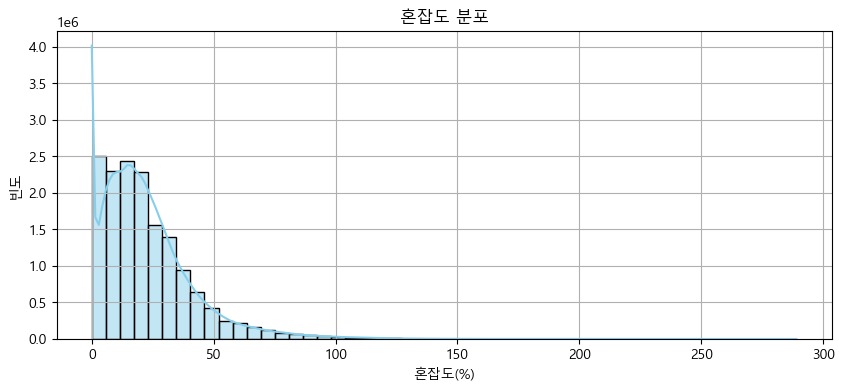

In [58]:
print(df['congestion'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df['congestion'], bins=50, kde=True, color='skyblue')
plt.title('ÌòºÏû°ÎèÑ Î∂ÑÌè¨')
plt.xlabel('ÌòºÏû°ÎèÑ(%)')
plt.ylabel('ÎπàÎèÑ')
plt.grid(True)
plt.show()

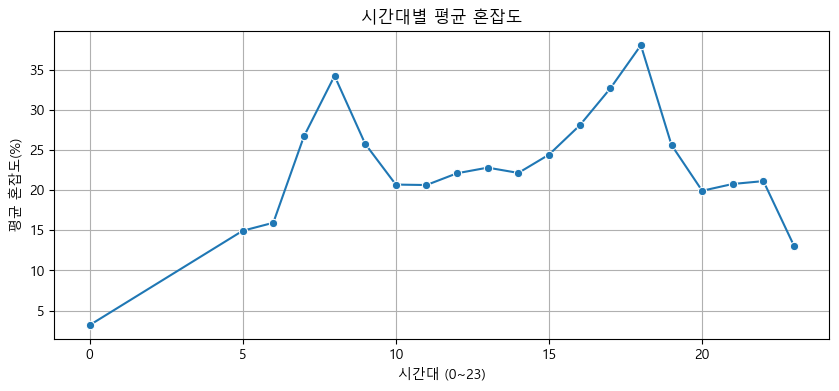

In [59]:
hourly_mean = df.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o')
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ")
plt.xlabel("ÏãúÍ∞ÑÎåÄ (0~23)")
plt.ylabel("ÌèâÍ∑† ÌòºÏû°ÎèÑ(%)")
plt.grid(True)
plt.show()


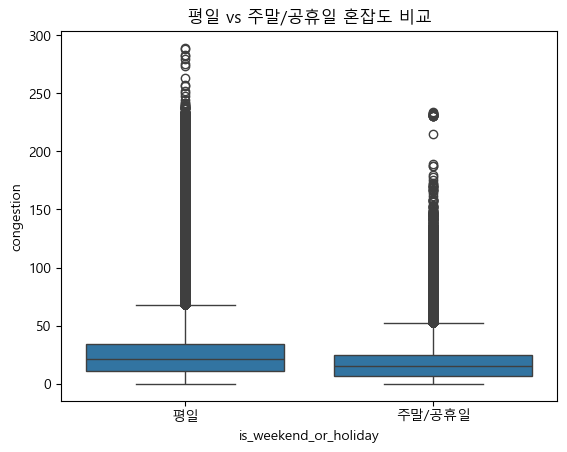

In [60]:
sns.boxplot(x='is_weekend_or_holiday', y='congestion', data=df)
plt.xticks([0, 1], ['ÌèâÏùº', 'Ï£ºÎßê/Í≥µÌú¥Ïùº'])
plt.title("ÌèâÏùº vs Ï£ºÎßê/Í≥µÌú¥Ïùº ÌòºÏû°ÎèÑ ÎπÑÍµê")
plt.show()


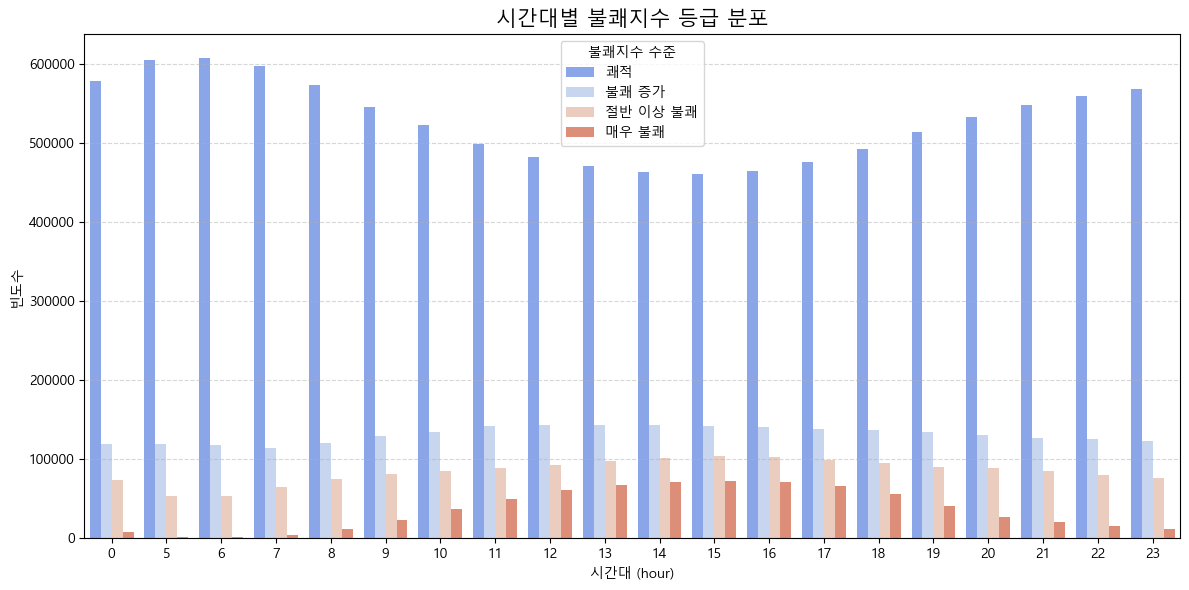

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂àÏæåÏßÄÏàò Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', hue='di_level', order=sorted(df['hour'].unique()), palette='coolwarm')

plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂àÏæåÏßÄÏàò Îì±Í∏â Î∂ÑÌè¨', fontsize=15)
plt.xlabel('ÏãúÍ∞ÑÎåÄ (hour)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.legend(title='Î∂àÏæåÏßÄÏàò ÏàòÏ§Ä')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ÌèâÏùº / Ìú¥Ïùº Î∂ÑÎ•ò EDA

In [62]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_weekday = df[df['is_weekend_or_holiday'] == 0]
df_weekend = df[df['is_weekend_or_holiday'] == 1]

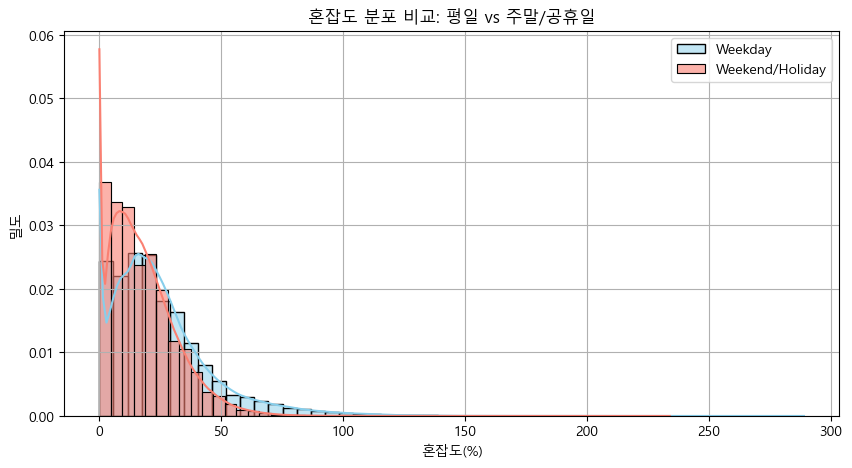

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_weekday['congestion'], color='skyblue', label='Weekday', stat='density', bins=50, kde=True)
sns.histplot(df_weekend['congestion'], color='salmon', label='Weekend/Holiday', stat='density', bins=50, kde=True, alpha=0.6)
plt.title("ÌòºÏû°ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê: ÌèâÏùº vs Ï£ºÎßê/Í≥µÌú¥Ïùº")
plt.xlabel("ÌòºÏû°ÎèÑ(%)")
plt.ylabel("Î∞ÄÎèÑ")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
print("üìå ÌòºÏû°ÎèÑ ÌÜµÍ≥Ñ ÏöîÏïΩ")
print("‚ñ∂ ÌèâÏùº")
print(df_weekday['congestion'].describe())
print("\n‚ñ∂ Ï£ºÎßê/Í≥µÌú¥Ïùº")
print(df_weekend['congestion'].describe())


üìå ÌòºÏû°ÎèÑ ÌÜµÍ≥Ñ ÏöîÏïΩ
‚ñ∂ ÌèâÏùº
count    1.059600e+07
mean     2.505205e+01
std      2.088204e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.100000e+01
75%      3.400000e+01
max      2.890000e+02
Name: congestion, dtype: float64

‚ñ∂ Ï£ºÎßê/Í≥µÌú¥Ïùº
count    4.993838e+06
mean     1.751410e+01
std      1.385104e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      2.500000e+01
max      2.340000e+02
Name: congestion, dtype: float64


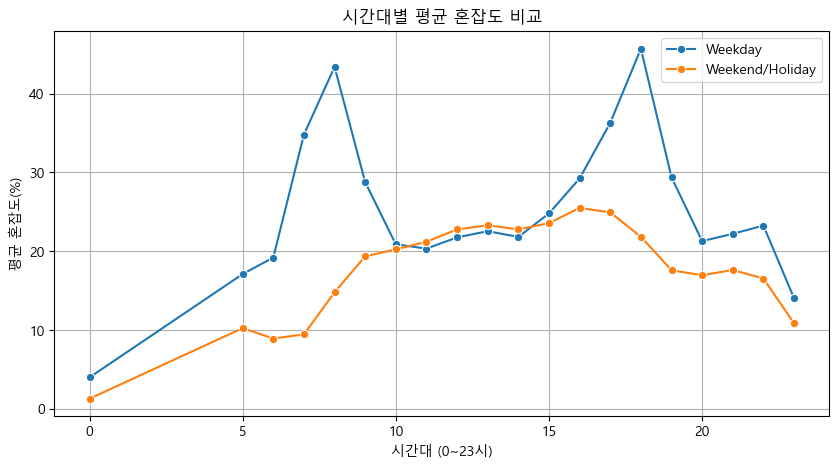

In [65]:
weekday_hourly = df_weekday.groupby('hour')['congestion'].mean()
weekend_hourly = df_weekend.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label='Weekday', marker='o')
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label='Weekend/Holiday', marker='o')
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ ÎπÑÍµê")
plt.xlabel("ÏãúÍ∞ÑÎåÄ (0~23Ïãú)")
plt.ylabel("ÌèâÍ∑† ÌòºÏû°ÎèÑ(%)")
plt.grid(True)
plt.legend()
plt.show()


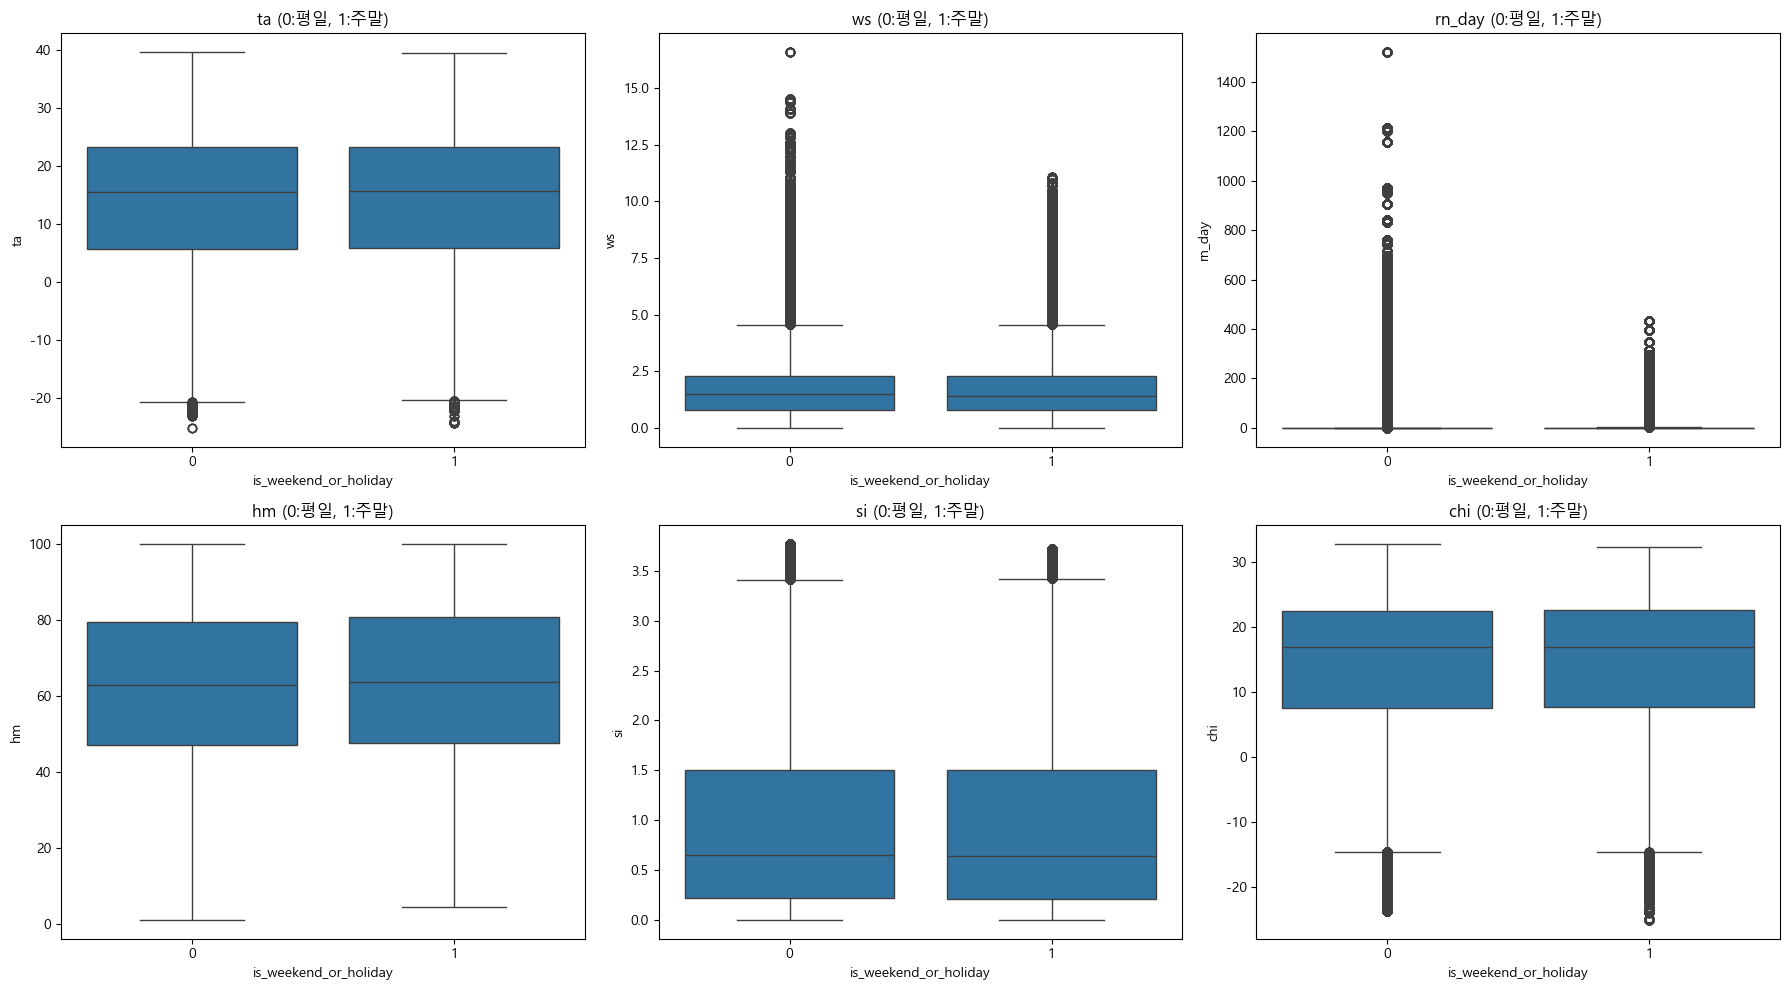

In [66]:
weather_cols = ['ta', 'ws', 'rn_day', 'hm', 'si', 'chi']

plt.figure(figsize=(18, 10))
for i, col in enumerate(weather_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='is_weekend_or_holiday', y=col)
    plt.title(f"{col} (0:ÌèâÏùº, 1:Ï£ºÎßê)")
plt.tight_layout()
plt.show()


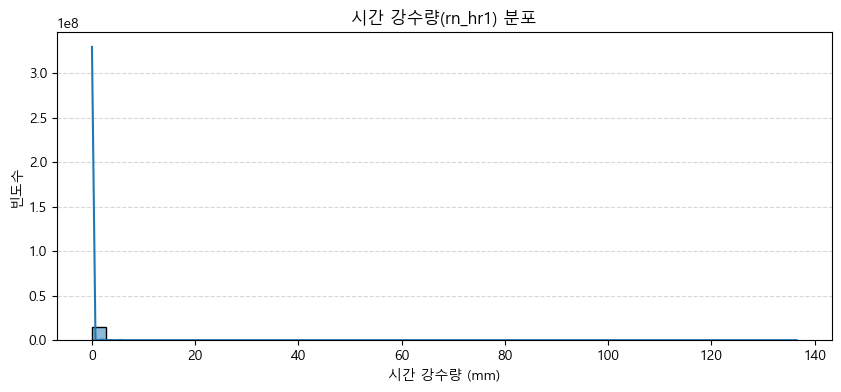

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['rn_hr1'], bins=50, kde=True)
plt.title('ÏãúÍ∞Ñ Í∞ïÏàòÎüâ(rn_hr1) Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞Ñ Í∞ïÏàòÎüâ (mm)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


---

- Î™®Îç∏ÎßÅÏùÑ ÎèåÎ¶∞Îã§Î©¥ ? 
    - ÌòºÏû°ÎèÑÎ•º Í∑∏ÎåÄÎ°ú Ïà´ÏûêÍ∞í(Ïó∞ÏÜçÌòï)ÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî Í≤É
    - Íµ¨Í∞ÑÏùÑ ÎÇòÎà†ÏÑú Î≤îÏ£ºÌòï(Î∂ÑÎ•ò)ÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî Í≤É

- Í∞ÅÍ∞Å ÏµúÏ†ÅÏùò ÏÉÅÌô©Í≥º Í∂åÏû• Î∞©Ïãù

| ÏÉÅÌô©                           | Í∂åÏû• Î∞©Ïãù | Ïù¥Ïú†                   |
| ---------------------------- | ----- | -------------------- |
| ÌòºÏû°ÎèÑÍ∞Ä ÏÑ∏Î∞ÄÌïú ÏàòÏπòÎ°ú ÌïÑÏöîÌïú Í≤ΩÏö∞          | ÌöåÍ∑Ä    | Ïòà: ÏµúÏ†Å Ïä§ÏºÄÏ§ÑÎßÅ ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏÇ¨Ïö©  |
| ÏÇ¨Ïö©Ïûê ÏïåÎ¶ºÏö© Îì± **Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±**Ïù¥ Ï§ëÏöîÌïú Í≤ΩÏö∞ | Î∂ÑÎ•ò    | Ïòà: ‚ÄúÏßÄÍ∏à ÌòºÏû°ÎèÑÍ∞Ä Îß§Ïö∞ ÎÜíÏäµÎãàÎã§‚Äù |
| Í∞íÏùò Î∂ÑÌè¨Í∞Ä Î∂àÍ∑†ÌòïÌïòÍ±∞ÎÇò ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞     | Î∂ÑÎ•ò    | Ïù¥ÏÉÅÏπò ÏòÅÌñ• ÏôÑÌôî Í∞ÄÎä•         |

- Ï†ïÎ¶¨ 
    - ‚úîÔ∏è ÎπÑÏ¶àÎãàÏä§ Î™©Ï†ÅÏù¥ ‚ÄúÏïåÍ∏∞ Ïâ¨Ïö¥ ÌòºÏû° Îì±Í∏â Ï†úÍ≥µ‚ÄùÏù¥ÎùºÎ©¥ ‚Üí Î∂ÑÎ•òÍ∞Ä Ï¢ãÍ≥†
    - ‚úîÔ∏è Ï†ïÎ∞ÄÌïú ÏàòÏπòÍ∞Ä ÌïÑÏöîÌïú ÏµúÏ†ÅÌôîÎÇò ÏãúÎÆ¨Î†àÏù¥ÏÖòÏù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥ ‚Üí ÌöåÍ∑ÄÍ∞Ä Ï¢ãÏäµÎãàÎã§

- ÌöåÍ∑ÄÏôÄ Î∂ÑÎ•òÎäî Î™©Ï†ÅÏù¥ Îã§Î•¥Í≥†, Ï∂úÎ†•Í∞íÎèÑ Îã§Î•¥Î©∞, ÌèâÍ∞Ä Î∞©ÏãùÎèÑ ÏôÑÏ†ÑÌûà Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÍ∞Å Îî∞Î°ú Í≤ÄÏ¶ùÏùÑ Ìï¥ÏïºÌïúÎã§.

| Ìï≠Î™©    | ÌöåÍ∑Ä Î™®Îç∏         | Î∂ÑÎ•ò Î™®Îç∏                    |
| ----- | ------------- | ------------------------ |
| Î™©ÌëúÍ∞í   | ÏàòÏπò (ex. 37.2) | Î≤îÏ£º (ex. Low/Medium/High) |
| ÎåÄÌëú ÏßÄÌëú | RMSE, R¬≤, MAE | Accuracy, F1-score, AUC  |
| Ìï¥ÏÑù    | ÏòàÏ∏°Í∞í ÏûêÏ≤¥Í∞Ä ÏùòÎØ∏    | ÏòàÏ∏° ÌÅ¥ÎûòÏä§Ïùò ÎßûÏ∂§ Ïó¨Î∂Ä            |
| Í≤ÄÏ¶ù Î∞©Ïãù | ÏàòÏπò Í∏∞Î∞ò Ïò§Ï∞® Ï∏°Ï†ï   | ÎßûÏ∂ò/Î™ª ÎßûÏ∂ò ÎπÑÏú® Ï∏°Ï†ï            |


- RMSEÏóê ÎåÄÌïú ÏÑ§Î™ÖÏù¥ ÏïàÎÇ¥ÏÑúÏóê ÏûàÎäî Í±∞Î°ú Î≥¥ÏïÑ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö© ÌïòÎùºÎäî Í≤ÉÏù¥ Ï£º Î™©ÌëúÏù∏ Í≤É Í∞ôÎã§. 


- Î™®Îç∏ÎßÅ Ìï† Îïå ÌïÑÏöîÌïú ÏàúÏÑú ! 
    - ÌïÑÏöîÌïú Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Í∞ÄÍ≥µÏùÑ Ìï¥Ïïº Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.(Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú ??)
        - Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú ??
        - ÏÉÅÏóÖÏßÄÍµ¨Ïù∏ÏßÄ ÏïÑÎãåÏßÄ ÎÇòÎàå ÌïÑÏöîÏÑ± ÏûàÎÇò ? 

- Î™®Îç∏ÎßÅÏùÑ ÌïúÎã§Î©¥ ? 
    - ÏûÖÎ†• (ÏòàÏãú) : Ïó≠, Í∏∞Ïò®, Ï≤¥Í∞êÏò®ÎèÑ, Î∂àÏæåÏßÄÏàò, ÏãúÍ∞Ñ, ÎÖ∏ÏÑ†
    - Ï∂úÎ†• : ÌòºÏû°ÎèÑ
- ÌïÑÏöîÌï†Íπå ? 
    - Î≥ÄÏàò Ï°∞Ìï©Î≥Ñ ÌòºÏû°ÎèÑ Ï∞®Ïù¥ Î∂ÑÏÑù
        - ÌäπÏ†ï ÎÖ∏ÏÑ† + ÌäπÏ†ï ÏãúÍ∞ÑÎç∞ + ÏÉÅÏóÖ ÏßÄÍµ¨ Î∞©Ìñ• -> ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏùÄÍ∞Ä ? 
        - Î∂àÏæåÏßÄÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÎäîÍ∞Ä ? 

## Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ EDA

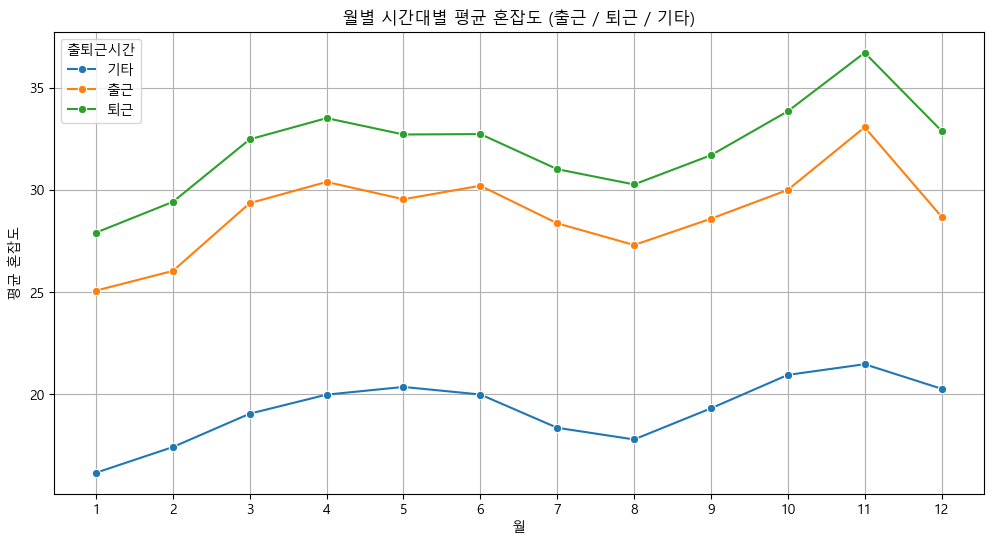

In [68]:
# Ï∂úÍ∑ºÍ≥º Ìá¥Í∑ºÏóêÎèÑ ÌòºÏû°ÎèÑ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?
# ÏõîÎ≥Ñ + Ï∂úÍ∑ºorÌá¥Í∑º Í∏∞Ï§Ä ÌèâÍ∑† ÌòºÏû°ÎèÑ
monthly_all = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_all, x='month', y='congestion', hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', marker='o')
plt.title('ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ (Ï∂úÍ∑º / Ìá¥Í∑º / Í∏∞ÌÉÄ)')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

- Ìá¥Í∑ºÏãúÍ∞ÑÎåÄÍ∞Ä Í∞ÄÏû• ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÍ≥† 11ÏõîÏù¥ Í∞ÄÏû• ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- ÌòºÏû°ÎèÑÏôÄ Í¥ÄÎ†®Ìï¥ÏÑú ÎπÑÏ∂úÌá¥Í∑ºÏãúÍ∞ÑÏù¥ Îçî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùå ÌïòÏßÄÎßå Îã§ ÎÇÆÏùå

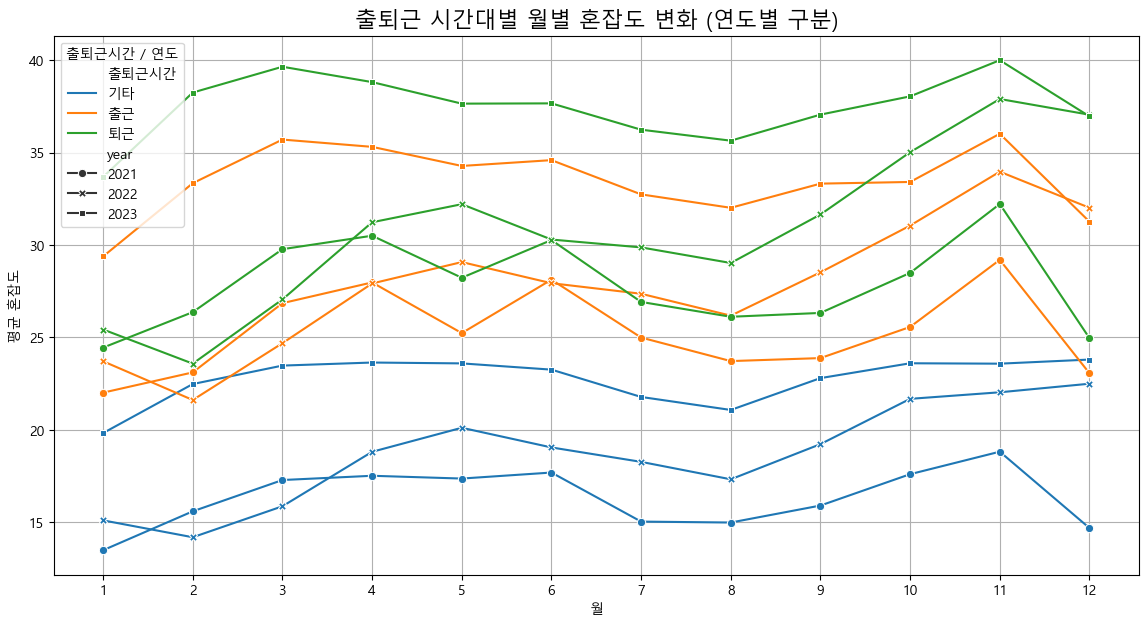

In [69]:
monthly_trend = df.groupby(['year', 'month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    style='year',
    markers=True,
    dashes=False
)
plt.title('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏõîÎ≥Ñ ÌòºÏû°ÎèÑ Î≥ÄÌôî (Ïó∞ÎèÑÎ≥Ñ Íµ¨Î∂Ñ)', fontsize=16)
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.legend(title='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ / Ïó∞ÎèÑ')
plt.grid(True)
plt.show()

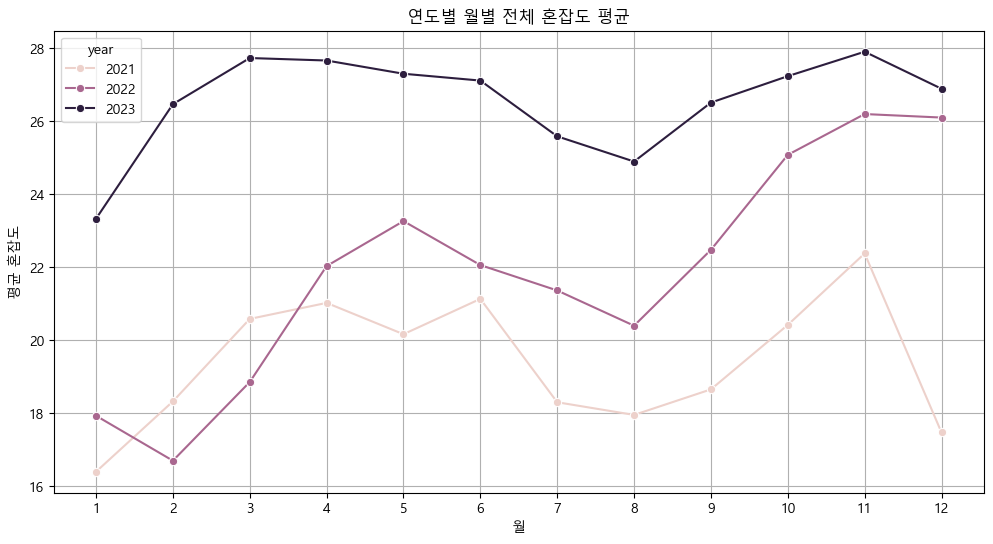

In [70]:
monthly_overall = df.groupby(['year', 'month'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_overall,
    x='month',
    y='congestion',
    hue='year',
    marker='o'
)
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Ï†ÑÏ≤¥ ÌòºÏû°ÎèÑ ÌèâÍ∑†')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


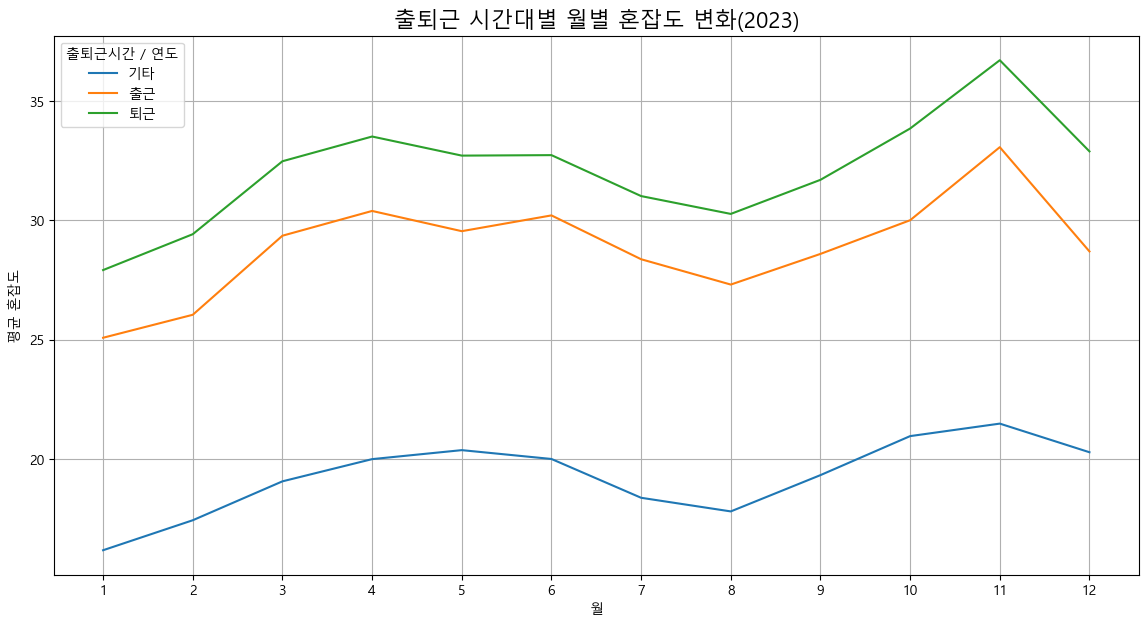

In [71]:
monthly_trend = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    dashes=False
)
plt.title('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏõîÎ≥Ñ ÌòºÏû°ÎèÑ Î≥ÄÌôî(2023)', fontsize=16)
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.legend(title='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ / Ïó∞ÎèÑ')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

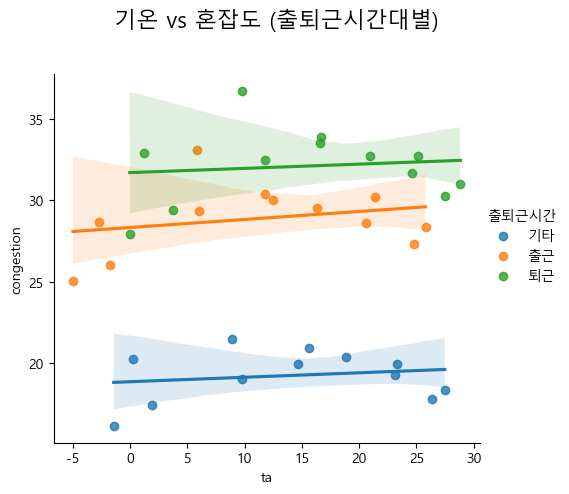

In [72]:
weather_grouped = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ']).agg({
    'congestion': 'mean',
    'ta': 'mean',          # Ïã§Ï†ú Í∏∞Ïò®
    'chi': 'mean',      # Ï≤¥Í∞êÏò®ÎèÑ
    'rn_day': 'mean',      # Ïùº ÎàÑÏ†Å Í∞ïÏàòÎüâ
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lmplot(
    data=weather_grouped,
    x='ta', y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    height=5, aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Í∏∞Ïò® vs ÌòºÏû°ÎèÑ (Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÎåÄÎ≥Ñ)', fontsize=16)
plt.show()

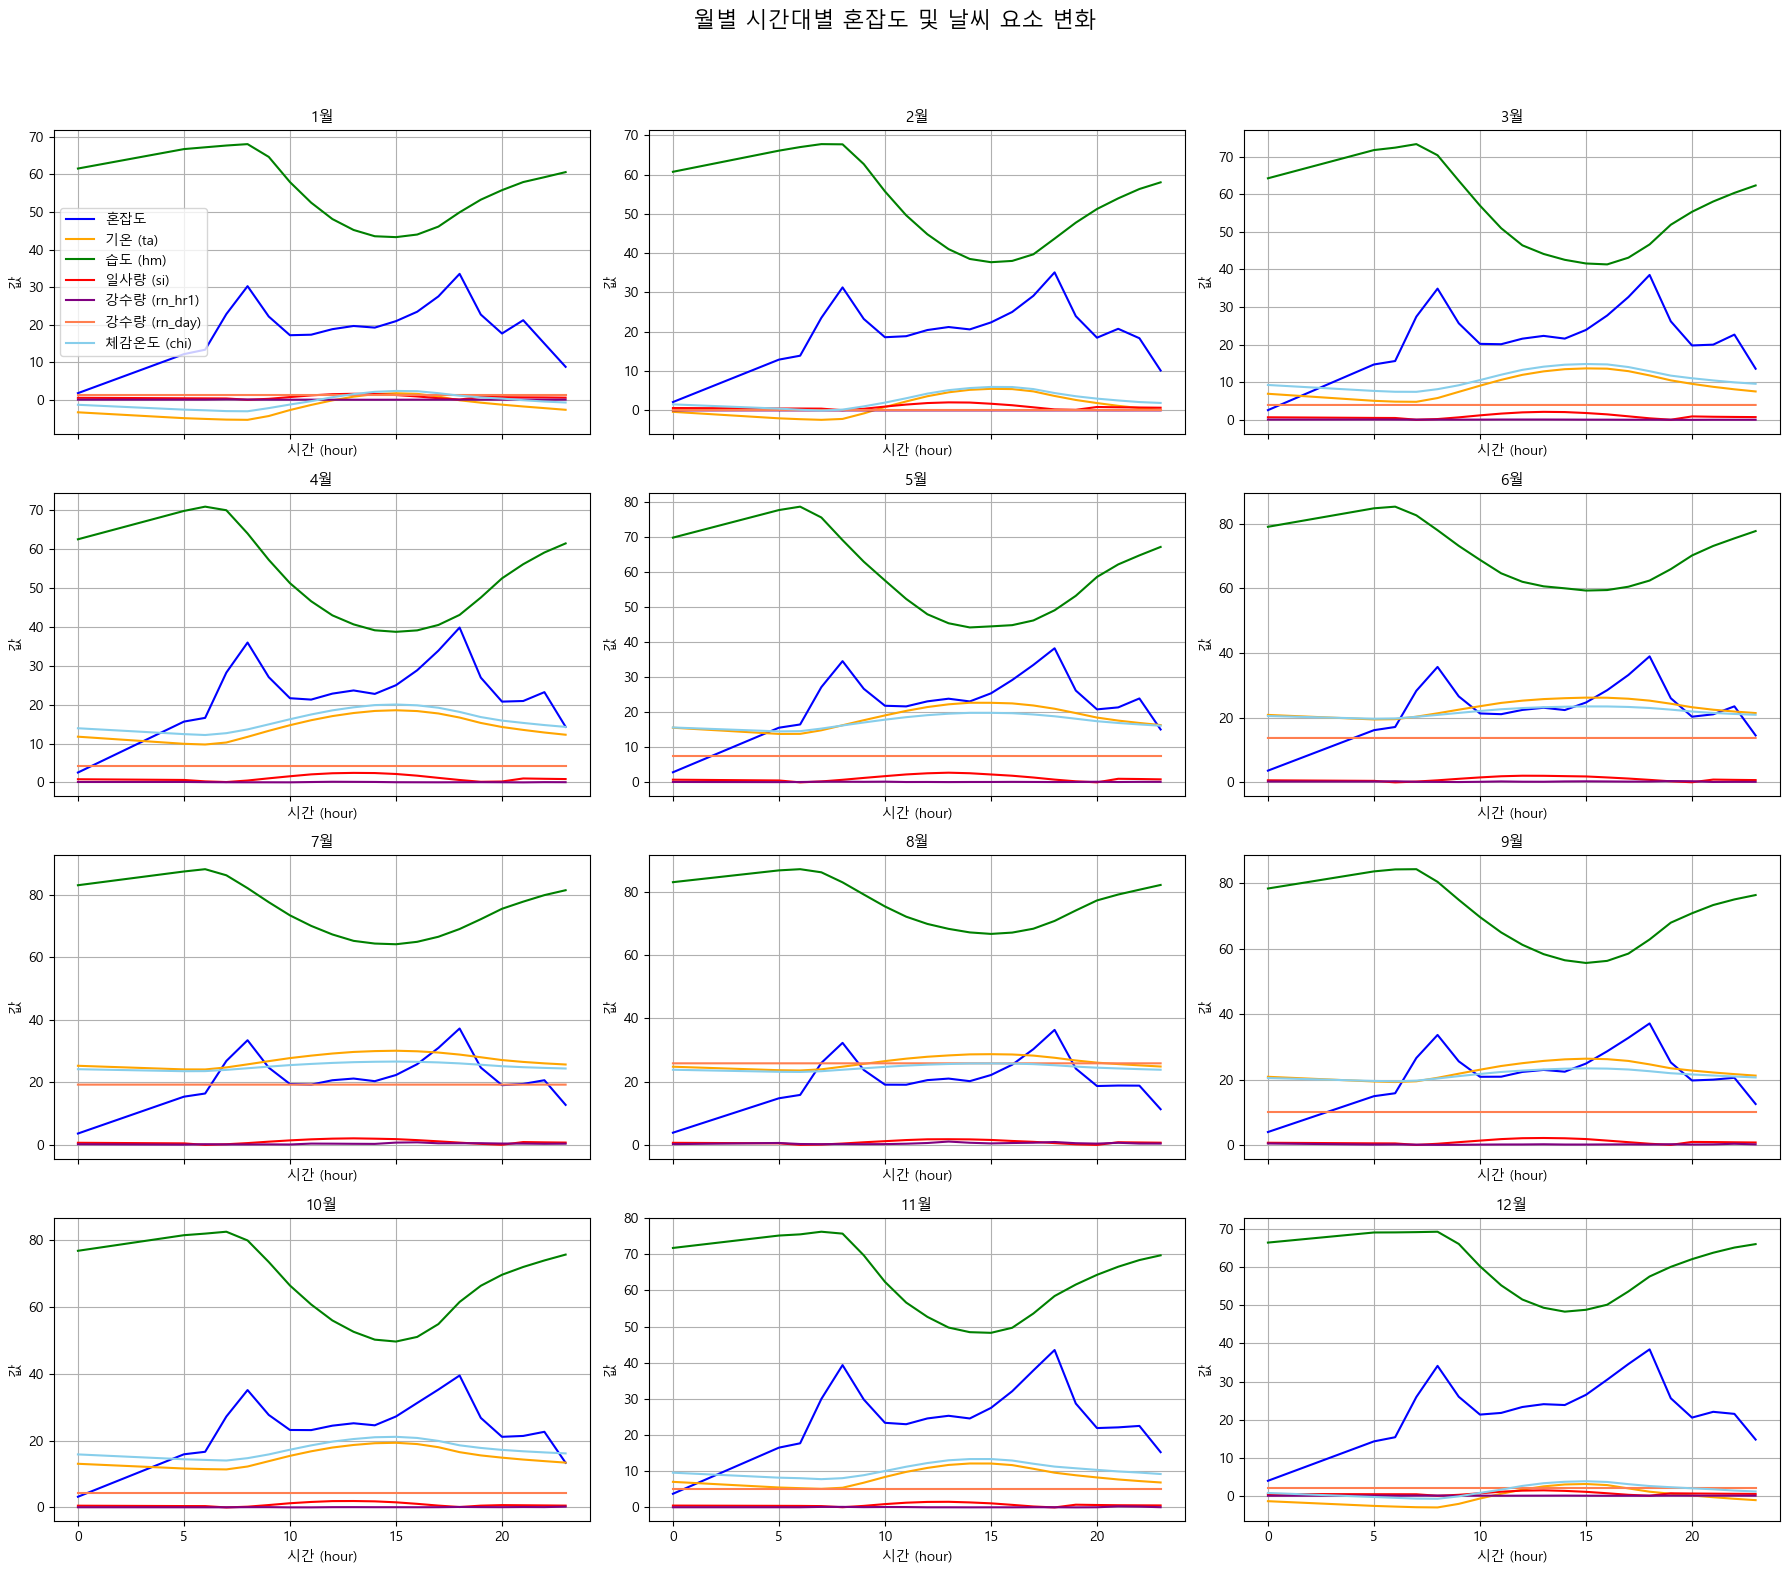

In [73]:
grouped = df.groupby(['month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# uniqueÌïú (year, month) Ï°∞Ìï© Ï†ïÎ†¨
time_keys = sorted(grouped['month'].drop_duplicates().values.tolist())

# subplot Í∑∏Î¶¨Îìú ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï (Ïòà: 4Ìñâ x 3Ïó¥)
ncols = 3
nrows = (len(time_keys) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4), sharex=True, sharey=False)
axes = axes.flatten()

# Í∞Å (year, month)Ïóê ÎåÄÌï¥ ÌïòÎÇòÏùò subplot ÏÉùÏÑ±
for i, month in enumerate(time_keys):
    ax = axes[i]
    df_sub = grouped[grouped['month'] == month]

    ax.plot(df_sub['hour'], df_sub['congestion'], color='blue', label='ÌòºÏû°ÎèÑ')
    ax.plot(df_sub['hour'], df_sub['ta'], color='orange', label='Í∏∞Ïò® (ta)')
    ax.plot(df_sub['hour'], df_sub['hm'], color='green', label='ÏäµÎèÑ (hm)')
    ax.plot(df_sub['hour'], df_sub['si'], color='red', label='ÏùºÏÇ¨Îüâ (si)')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], color='purple', label='Í∞ïÏàòÎüâ (rn_hr1)')
    ax.plot(df_sub['hour'], df_sub['rn_day'], color='coral', label='Í∞ïÏàòÎüâ (rn_day)')
    ax.plot(df_sub['hour'], df_sub['chi'], color='skyblue', label='Ï≤¥Í∞êÏò®ÎèÑ (chi)')

    ax.set_title(f'{month}Ïõî', fontsize=11)
    ax.set_xlabel('ÏãúÍ∞Ñ (hour)')
    ax.set_ylabel('Í∞í')
    ax.grid(True)
    if i == 0:
        ax.legend()

# ÎÇ®Îäî subplotÏùÄ Ï†úÍ±∞
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® ÏöîÏÜå Î≥ÄÌôî", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

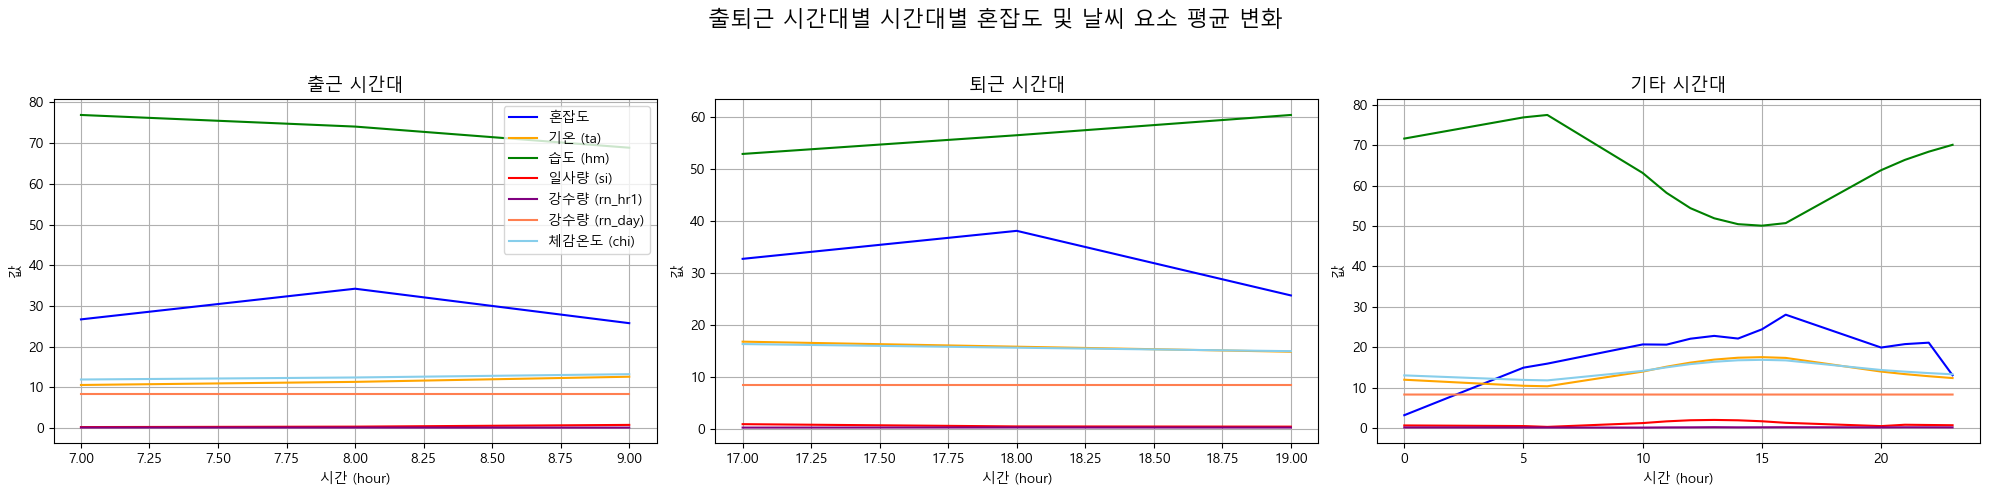

In [74]:
# 1. Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÎ≥ÑÎ°ú groupby
grouped_by_commute = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. subplot Ï§ÄÎπÑ (Ï∂úÍ∑º, Ìá¥Í∑º, Í∏∞ÌÉÄ Ï¥ù 3Í∞ú)
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=False)

# 3. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ subplot Í∑∏Î¶¨Í∏∞
for i, category in enumerate(commute_categories):
    ax = axes[i]
    df_sub = grouped_by_commute[grouped_by_commute['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == category]

    ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
    ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
    ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
    ax.plot(df_sub['hour'], df_sub['si'], label='ÏùºÏÇ¨Îüâ (si)', color='red')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')
    ax.plot(df_sub['hour'], df_sub['rn_day'], label='Í∞ïÏàòÎüâ (rn_day)', color='coral')
    ax.plot(df_sub['hour'], df_sub['chi'], label='Ï≤¥Í∞êÏò®ÎèÑ (chi)', color='skyblue')

    ax.set_title(f'{category} ÏãúÍ∞ÑÎåÄ', fontsize=13)
    ax.set_xlabel('ÏãúÍ∞Ñ (hour)')
    ax.set_ylabel('Í∞í')
    ax.grid(True)
    if i == 0:
        ax.legend(loc='upper right')

# Ï†ÑÏ≤¥ ÌÉÄÏù¥ÌãÄÍ≥º Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® ÏöîÏÜå ÌèâÍ∑† Î≥ÄÌôî', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

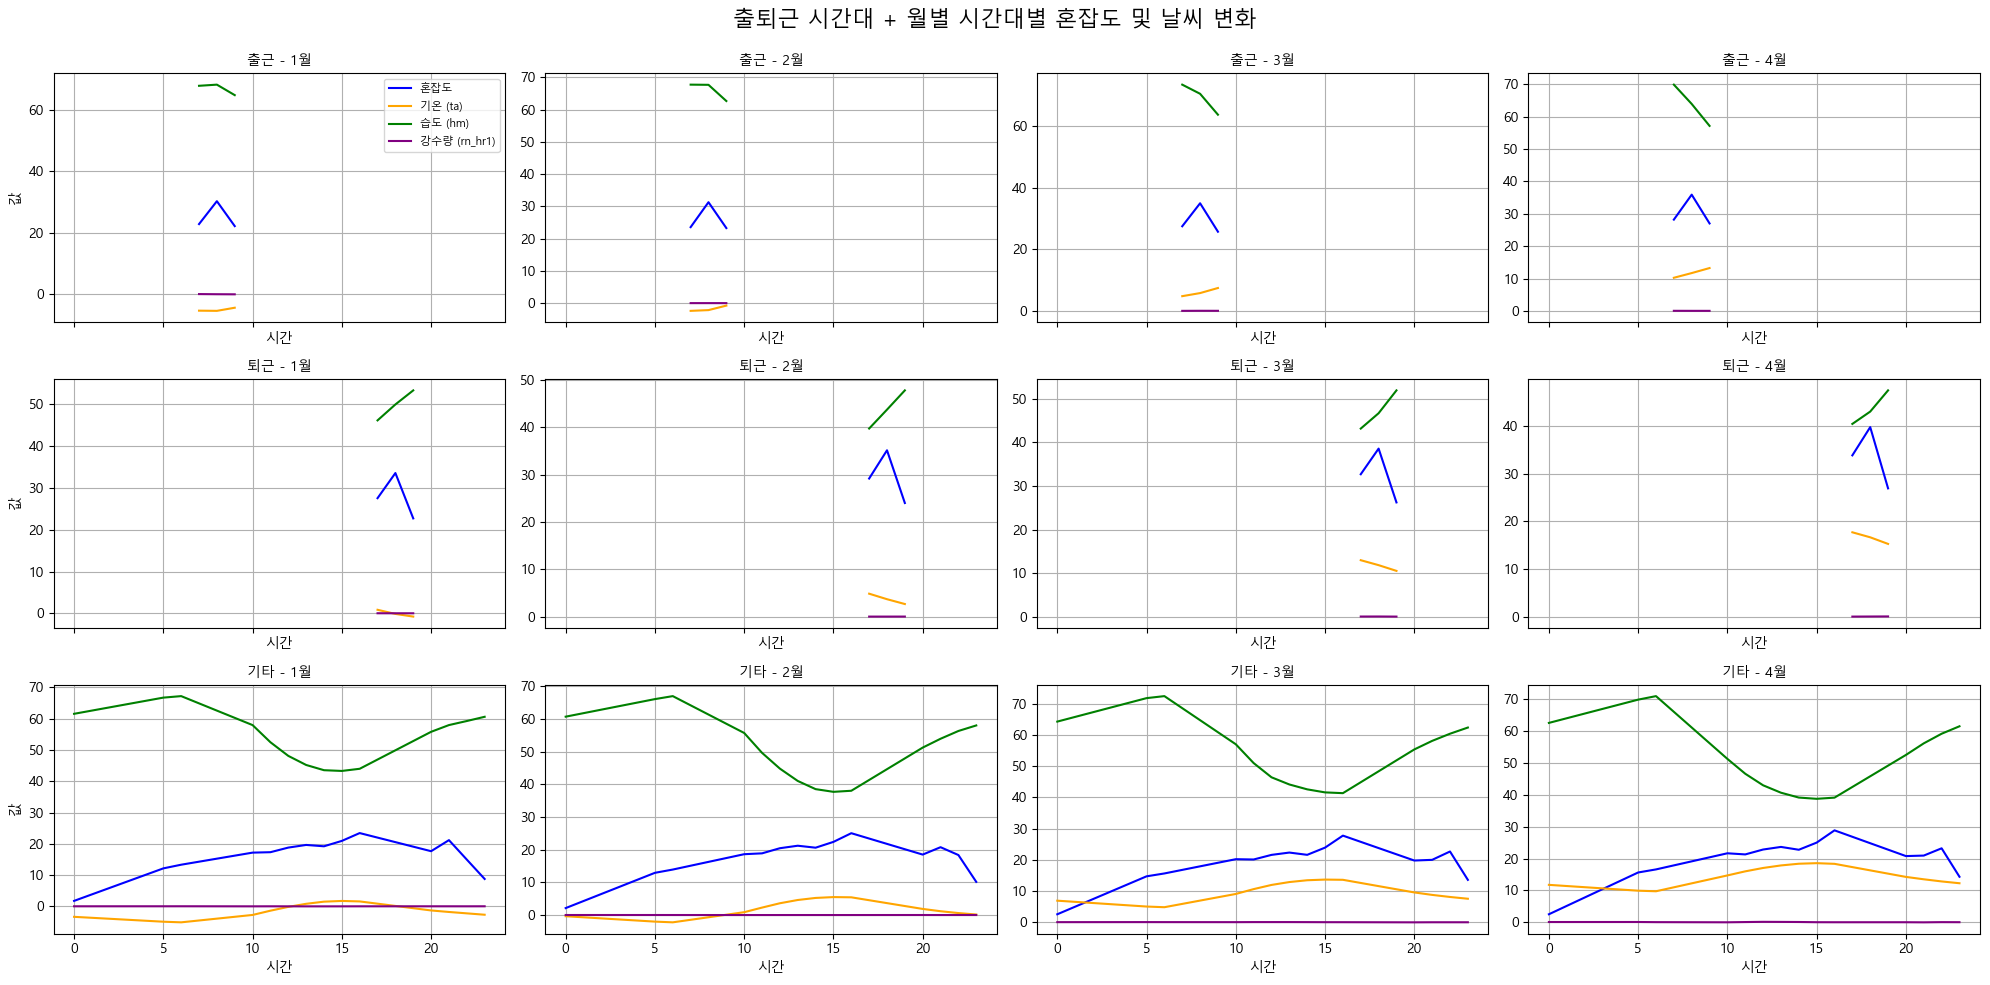

In [75]:
# 1. groupbyÎ°ú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
grouped = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Ïõî Î¶¨Ïä§Ìä∏ Ï†ïÏùò
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
months = list(range(1, 13))

# 3. subplot ÏÑ§Ï†ï
nrows = 3  # Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ 3Í∞ú
ncols = 4  # Ïõî 4Í∞úÏî©
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. Î∞òÎ≥µÌï¥ÏÑú subplot Í∑∏Î¶¨Í∏∞
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[:4]):  # 1~4Ïõî Î®ºÏ†Ä
        ax = axes[i, j]
        df_sub = grouped[(grouped['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}Ïõî', fontsize=10)
        ax.set_xlabel('ÏãúÍ∞Ñ')
        if j == 0:
            ax.set_ylabel('Í∞í')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ + ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® Î≥ÄÌôî', fontsize=16)
plt.show()


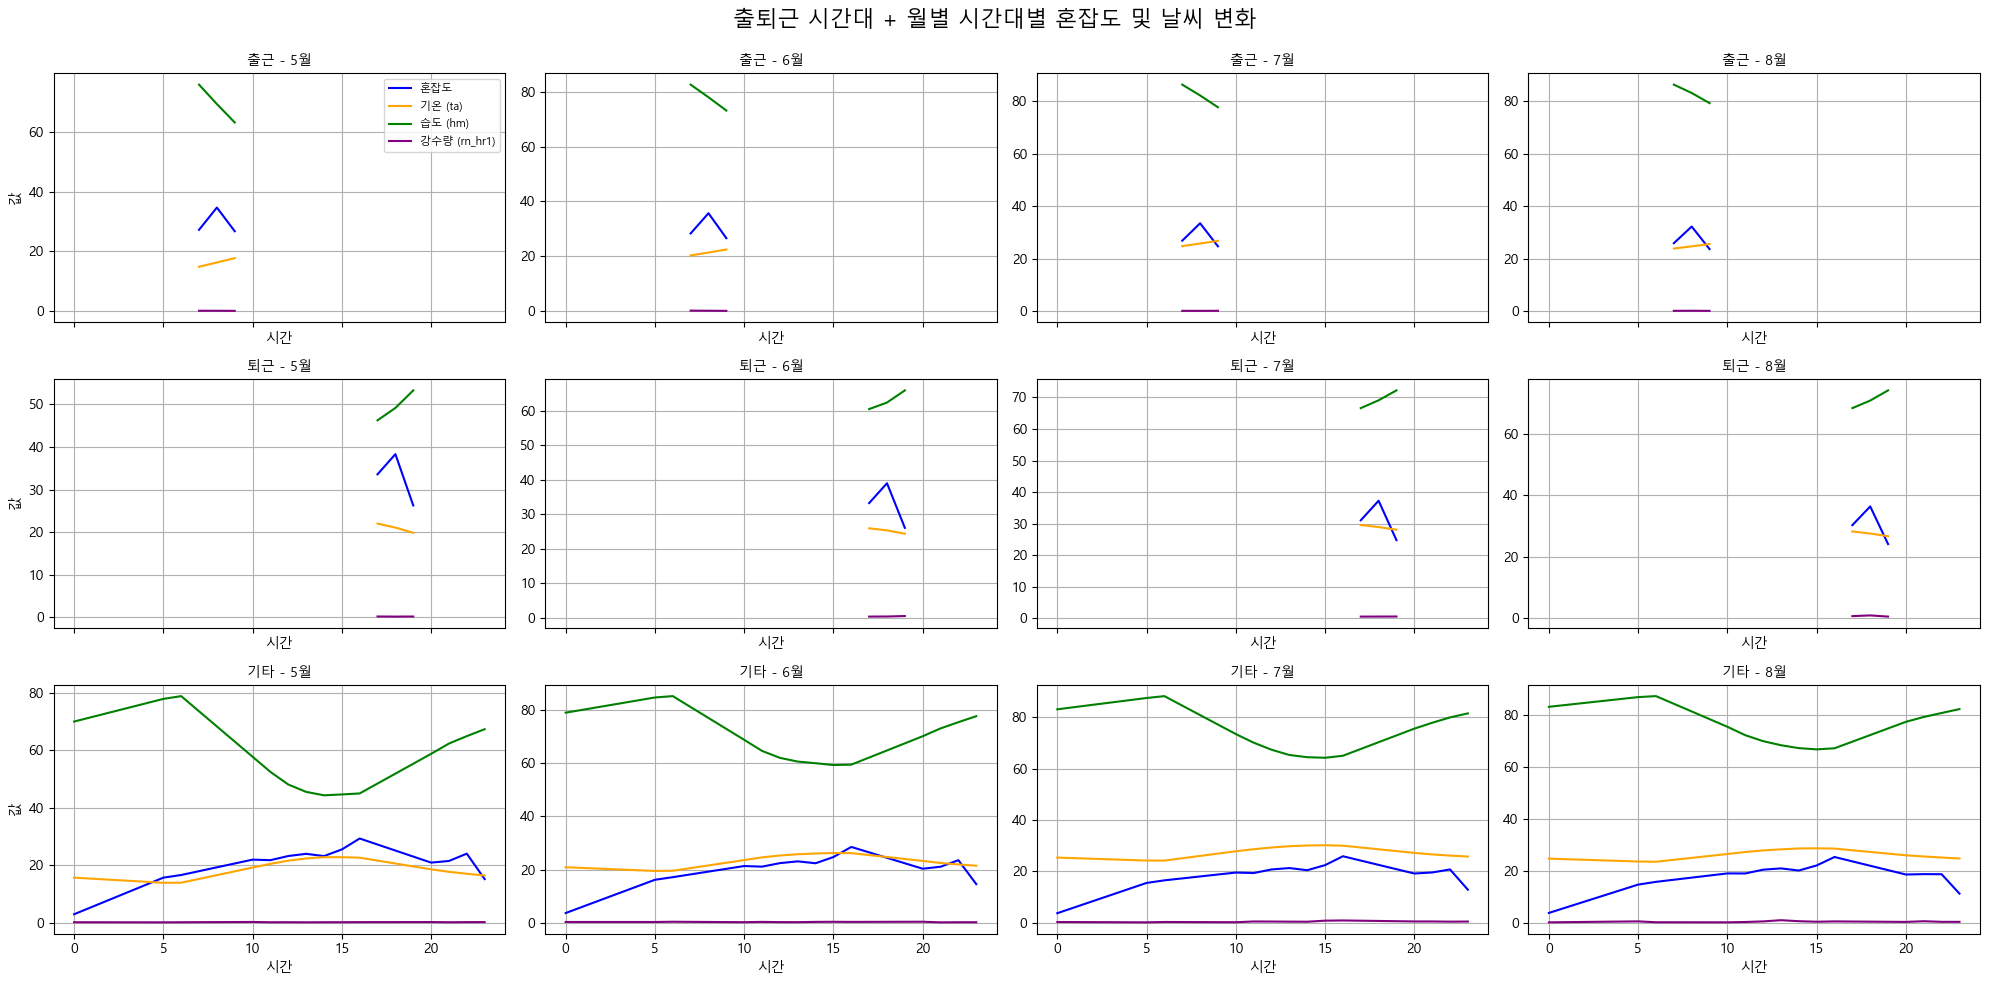

In [76]:
# 1. groupbyÎ°ú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
grouped = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Ïõî Î¶¨Ïä§Ìä∏ Ï†ïÏùò
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
months = list(range(1, 13))

# 3. subplot ÏÑ§Ï†ï
nrows = 3  # Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ 3Í∞ú
ncols = 4  # Ïõî 4Í∞úÏî©
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. Î∞òÎ≥µÌï¥ÏÑú subplot Í∑∏Î¶¨Í∏∞
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[4:8]):  # 5-8Ïõî
        ax = axes[i, j]
        df_sub = grouped[(grouped['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}Ïõî', fontsize=10)
        ax.set_xlabel('ÏãúÍ∞Ñ')
        if j == 0:
            ax.set_ylabel('Í∞í')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ + ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® Î≥ÄÌôî', fontsize=16)
plt.show()


In [77]:
from scipy.stats import f_oneway

# Í∞Å Í∑∏Î£πÏùò ÌòºÏû°ÎèÑ Ï∂îÏ∂ú
congestion_go = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Ï∂úÍ∑º']['congestion']
congestion_off = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Ìá¥Í∑º']['congestion']
congestion_else = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Í∏∞ÌÉÄ']['congestion']

# ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (ANOVA)
f_stat, p_value = f_oneway(congestion_go, congestion_off, congestion_else)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("‚úÖ Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Îùº ÌòºÏû°ÎèÑÏùò Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("‚ùå Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Î•∏ ÌòºÏû°ÎèÑ Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

F-statistic: 619295.3779
P-value: 0.0000e+00
‚úÖ Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Îùº ÌòºÏû°ÎèÑÏùò Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


üéØ Î∂ÑÏÑù Í∞úÏöî
- Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÏóê Îî∞Îùº ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ(congestion)Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)Î•º ÏàòÌñâ. Ïù¥ Î∂ÑÏÑùÏùÄ Îã§Ïùå ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Ï∞®Ïù¥Î•º ÎπÑÍµê
    - Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ (Ïòà: 07~09Ïãú)
    - Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ (Ïòà: 18~20Ïãú)
    - Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ (Í∑∏ Ïô∏)
üìä Í≤∞Í≥º ÏöîÏïΩ
- F-statistic: 619,295.3779
- P-value: 0.0000e+00 (Ï¶â, Í±∞Ïùò 0)
‚úÖ Ìï¥ÏÑù
- üîç F-statistic: 619,295.3779
    - FÍ∞íÏù¥ Îß§Ïö∞ ÌÅ¨Îã§Îäî Í≤ÉÏùÄ ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Î∂ÑÏÇ∞(ÌèâÍ∑†Ïùò Ï∞®Ïù¥)Ïù¥ Í∑∏Î£π ÎÇ¥Ïùò Î∂ÑÏÇ∞Î≥¥Îã§ Îß§Ïö∞ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏
    - Ï¶â, Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ÎÇò ÎÇ¥Î∂Ä Î≥ÄÎèôÏÑ±ÏúºÎ°úÎäî ÏÑ§Î™ÖÎêòÏßÄ ÏïäÏùÑ Ï†ïÎèÑÎ°ú Ï∂úÍ∑º/Ìá¥Í∑º/Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ ÌòºÏû°ÎèÑ ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§Îäî ÎúªÏûÑ

- üî¨ P-value: 0.0000
    - p-valueÍ∞Ä 0.05Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÍ≥†, ÏÇ¨Ïã§ÏÉÅ 0Ïóê ÏàòÎ†¥ÌïòÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§(Î™®Îì† Í∑∏Î£πÏùò ÌèâÍ∑†Ïù¥ Í∞ôÎã§)ÏùÑ Í∏∞Í∞Å
    - Ï¶â, Ï∂úÍ∑º/Ìá¥Í∑º/Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ Í∞Ñ ÌòºÏû°ÎèÑ ÌèâÍ∑†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•¥Îã§Îäî Í∞ïÎ†•Ìïú ÌÜµÍ≥ÑÏ†Å Í∑ºÍ±∞Í∞Ä ÏûàÏùå

In [78]:
from scipy.stats import ttest_ind

# Ï∂úÍ∑º vs Ìá¥Í∑º
t_stat, p_value = ttest_ind(congestion_go, congestion_off, equal_var=False)
print(f"[Ï∂úÍ∑º vs Ìá¥Í∑º] P-value: {p_value:.4e}")

# Ï∂úÍ∑º vs Í∏∞ÌÉÄ
t_stat, p_value = ttest_ind(congestion_go, congestion_else, equal_var=False)
print(f"[Ï∂úÍ∑º vs Í∏∞ÌÉÄ] P-value: {p_value:.4e}")

# Ìá¥Í∑º vs Í∏∞ÌÉÄ
t_stat, p_value = ttest_ind(congestion_off, congestion_else, equal_var=False)
print(f"[Ìá¥Í∑º vs Í∏∞ÌÉÄ] P-value: {p_value:.4e}")

[Ï∂úÍ∑º vs Ìá¥Í∑º] P-value: 0.0000e+00
[Ï∂úÍ∑º vs Í∏∞ÌÉÄ] P-value: 0.0000e+00
[Ìá¥Í∑º vs Í∏∞ÌÉÄ] P-value: 0.0000e+00


## ÏÉÅÏÑ† vs ÌïòÏÑ†

In [79]:
# Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ†Ïóê Îî∞Î•∏ ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
direction_analysis = df.groupby(['line', 'direction']).agg(
    mean_congestion=('congestion', 'mean'),
    median_congestion=('congestion', 'median'),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', 'mean'),
    median_discomfort_index=('discomfort_index', 'median'),
    max_discomfort_index=('discomfort_index', 'max')
).reset_index()

# Í≤∞Í≥º Ï∂úÎ†•
print("--- Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò Î∂ÑÏÑù Í≤∞Í≥º ---")
print(direction_analysis)

# ÌäπÏ†ï Ìò∏ÏÑ†Ïóê ÎåÄÌïú ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏòàÏãú (Ïòà: 7Ìò∏ÏÑ†)
print("\n--- 7Ìò∏ÏÑ† ÏÉÅÏÑ†/ÌïòÏÑ† Î∂ÑÏÑù Í≤∞Í≥º ---")
print(direction_analysis[direction_analysis['line'] == 7])

--- Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò Î∂ÑÏÑù Í≤∞Í≥º ---
    line direction  mean_congestion  median_congestion  max_congestion  \
0      1        ÏÉÅÏÑ†        19.652837               16.0             231   
1      1        ÌïòÏÑ†        19.689643               16.0             230   
2      2        ÎÇ¥ÏÑ†        30.999152               28.0             159   
3      2        Ïô∏ÏÑ†        31.389910               29.0             167   
4      3        ÏÉÅÏÑ†        21.542479               17.0             289   
5      3        ÌïòÏÑ†        21.576693               17.0             242   
6      4        ÏÉÅÏÑ†        21.817668               18.0             156   
7      4        ÌïòÏÑ†        20.240102               17.0             176   
8      5        ÏÉÅÏÑ†        22.802003               19.0             152   
9      5        ÌïòÏÑ†        22.630041               20.0             146   
10     6        ÏÉÅÏÑ†        16.171612               14.0           

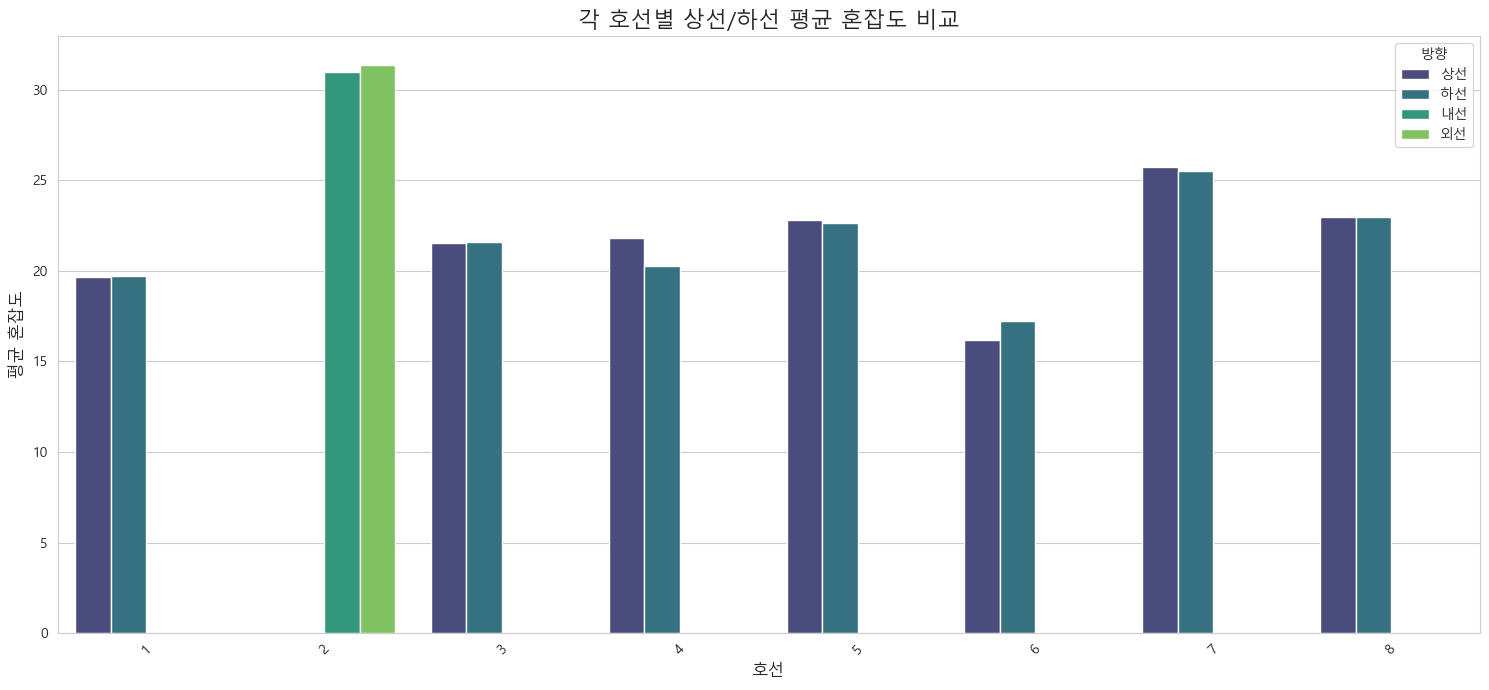

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú direction_analysis Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# ÎßåÏïΩ direction_analysisÍ∞Ä ÏóÜÎã§Î©¥, ÏïÑÎûò ÏΩîÎìúÎ•º Îã§Ïãú Ïã§ÌñâÌïòÏó¨ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
# direction_analysis = df_1.groupby(['line', 'direction']).agg(
#     mean_congestion=('congestion', 'mean'),
#     mean_discomfort_index=('discomfort_index', 'mean')
# ).reset_index()

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ

# 1. Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌèâÍ∑† ÌòºÏû°ÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 7))
sns.barplot(data=direction_analysis, x='line', y='mean_congestion', hue='direction', palette='viridis')
plt.title('Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌèâÍ∑† ÌòºÏû°ÎèÑ ÎπÑÍµê', fontsize=16)
plt.xlabel('Ìò∏ÏÑ†', fontsize=12)
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ', fontsize=12)
plt.xticks(rotation=45) # Ìò∏ÏÑ† Ïù¥Î¶ÑÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.legend(title='Î∞©Ìñ•')
plt.tight_layout() # Í∑∏ÎûòÌîÑ ÏöîÏÜåÎì§Ïù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÏûêÎèô Ï°∞Ï†ï
plt.show()

## 2021 - 2022 Ï†úÍ±∞

- 2021ÎÖÑÍ≥º 2022ÎÖÑÎèÑÏóê ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§Î°ú Ïù∏Ìïú Í±∞Î¶¨ÎëêÍ∏∞ Ï†ïÏ±ÖÏúºÎ°ú Ïù∏Ìï¥ Ìñ•ÌõÑ Î™®Îç∏ÎßÅÏóê ÏûàÏñ¥ Î∂àÌïÑÏöîÌïú ÏöîÏÜåÍ∞Ä Îì§Ïñ¥Í∞à Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†úÍ±∞Î•º Ìï¥ Ï§ÄÎã§.

In [81]:
# Ïó∞ÎèÑ Ï∂îÏ∂úÌïòÏó¨ ÌïÑÌÑ∞ÎßÅ
df_1 = df[~df['date_dt'].dt.year.isin([2021, 2022])]

# ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌîºÏ≤ò ÏÑ†ÌÉù

| Î∂ÑÏÑù Î™©Ï†Å                          | ÏÇ¨Ïö©Ìï† Î∂ÑÏÑù Î∞©Î≤ï                                        | ÏÑ§Î™Ö                       |
| ------------------------------- | ------------------------------------------------ | ------------------------ |
| **ÌòºÏû°ÎèÑÏôÄ Ïñ¥Îñ§ Î≥ÄÏàòÎì§Ïù¥ Í¥ÄÎ†® ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§** | `Pearson` ÎòêÎäî `Spearman` ÏÉÅÍ¥ÄÍ≥ÑÏàò                     | ÏÑ†Ìòï/ÎπÑÏÑ†Ìòï **ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎßå** ÌåêÎã®     |
| **ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏ÏùÑ Ìï¥ÏÑùÌïòÍ≥† Ïã∂Îã§**     | `Poisson ÌöåÍ∑Ä`                                     | ÌÜµÍ≥ÑÏ†Å **Ïú†ÏùòÏÑ± + Ïù∏Í≥º Ìï¥ÏÑù** Í∞ÄÎä•   |
| **ÌòºÏû°ÎèÑÎ•º ÏòàÏ∏°ÌïòÍ≥† Ïã∂Îã§ (Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Í∞í ÎΩëÍ∏∞)**  | üí° Î®∏Ïã†Îü¨Îãù Î™®Îç∏ (Ïòà: Random Forest, XGBoost, LightGBM) | ÏòàÏ∏° Ï†ïÌôïÎèÑÏóê ÏßëÏ§ë, **ÏÑ§Î™ÖÎ†•ÏùÄ Îñ®Ïñ¥Ïßê** |


In [82]:
# ÌïÑÏöîÌïú ÏàòÏπòÌòï Î≥ÄÏàòÎì§Îßå Ï∂îÎ†§ÏÑú ÌôïÏù∏
numerical_cols = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'chi', 'discomfort_index', 'rn_day', 'hour', 'congestion']
df_corr = df_1[numerical_cols]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
pearson_corr = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')


MemoryError: 

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


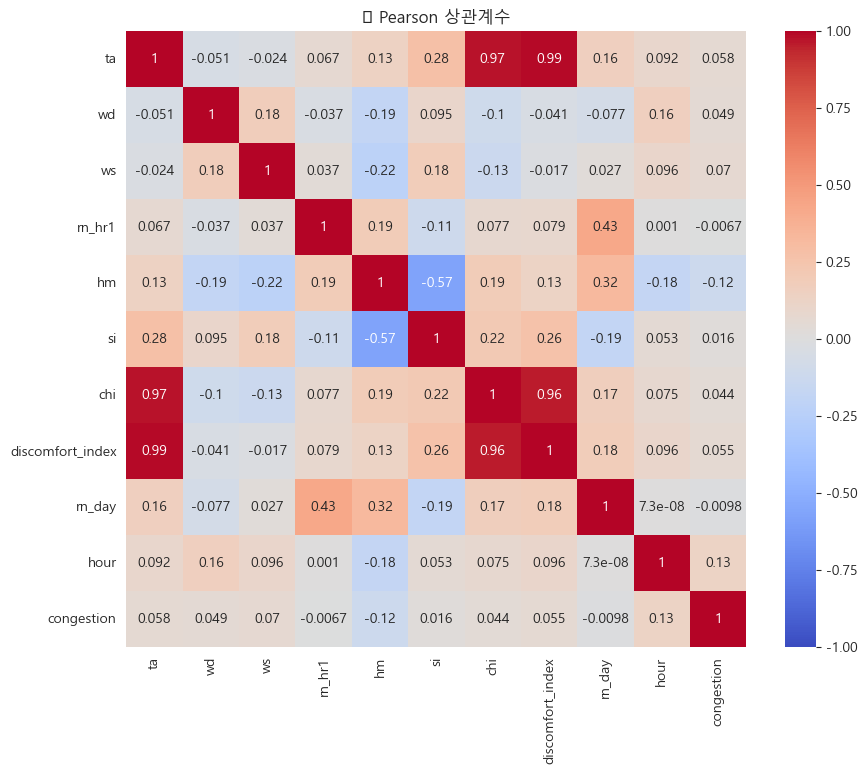

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


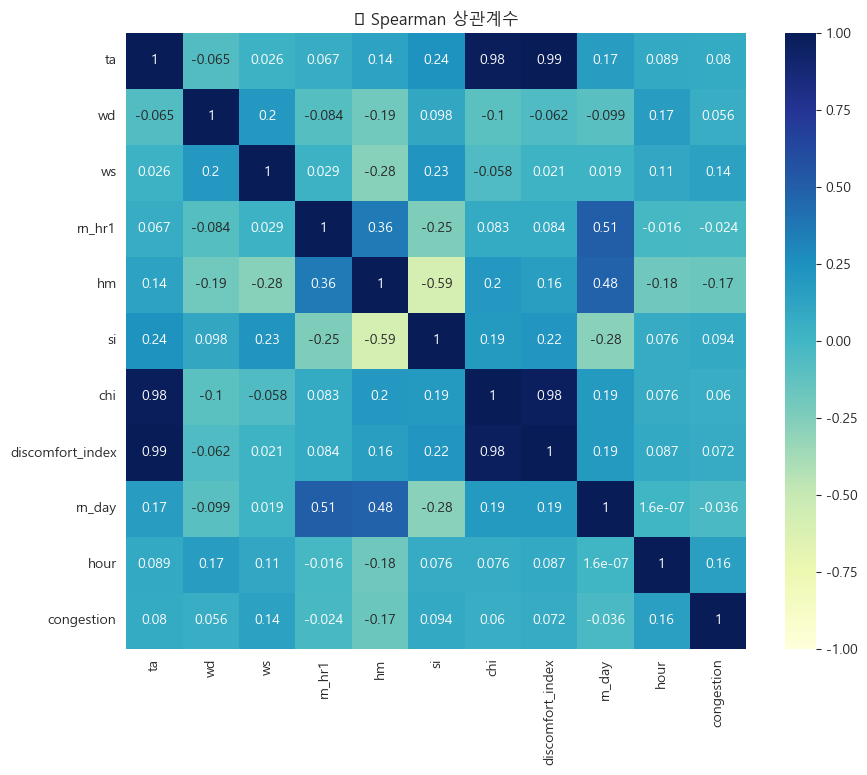

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson ÌûàÌä∏Îßµ
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("üìä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò")
plt.show()

# Spearman ÌûàÌä∏Îßµ (ÏÑ†ÌÉù)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("üìä Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò")
plt.show()

- 1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò
    - Î≥ÄÏàò Í∞Ñ ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ï∏°Ï†ïÌï©ÎãàÎã§.
    - ta, chi, discomfort_indexÍ∞Ä ÌÉÄÍ≤ü(congestion)Í≥º ÏïΩ 0.05~0.06 Ï†ïÎèÑÏùò ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§.
    - hourÎäî ÏïΩ 0.13 Ï†ïÎèÑÎ°ú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ ÏÉÅÍ¥ÄÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
    - ÏùºÎ∂Ä Î≥ÄÏàòÎäî ÏùåÏùò ÏÉÅÍ¥ÄÎèÑ Î≥¥ÏûÖÎãàÎã§(hm Îì±).
- 2. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò
    - Î≥ÄÏàò Í∞Ñ ÏàúÏúÑ Í∏∞Î∞ò(ÎπÑÏÑ†Ìòï Ìè¨Ìï®) Í¥ÄÍ≥ÑÎ•º Ï∏°Ï†ïÌï©ÎãàÎã§.
    - ta, chi, discomfort_indexÍ∞Ä ÌÉÄÍ≤üÍ≥º ÏïΩ 0.06~0.07 Ï†ïÎèÑÎ°ú ÌîºÏñ¥Ïä®Î≥¥Îã§ ÏïΩÍ∞Ñ Îçî ÎÜíÏùÄ ÏÉÅÍ¥ÄÏùÑ Î≥¥ÏûÖÎãàÎã§.
    - hourÎèÑ ÏïΩ 0.16ÏúºÎ°ú ÌîºÏñ¥Ïä®Î≥¥Îã§ Îçî ÎÜíÏùÄ ÏÉÅÍ¥ÄÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
    - rn_hr1, hm Îì± ÏùºÎ∂Ä Î≥ÄÏàòÎäî ÌîºÏñ¥Ïä®Í≥º Îã§Î•∏ Î∞©Ìñ• ÎòêÎäî ÌÅ¨Í∏∞Ïùò ÏÉÅÍ¥ÄÏùÑ Î≥¥ÏûÖÎãàÎã§.

- Ïñ¥Îñ§ Í≤∞Í≥ºÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌîºÏ≤òÎ•º ÏÑ†ÌÉùÌï†ÏßÄ?
    - Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≤∞Í≥ºÎ•º Ïö∞ÏÑ† Í≥†Î†§ÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤ú.

        - Ïù¥Ïú†: Í∏∞ÏÉÅ Î∞è ÌòºÏû°ÎèÑ Îç∞Ïù¥ÌÑ∞Îäî ÎπÑÏÑ†ÌòïÏ†ÅÏù¥Í≥† Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨ÎØÄÎ°ú, ÏàúÏúÑ Í∏∞Î∞ò ÏÉÅÍ¥ÄÏù∏ Ïä§ÌîºÏñ¥ÎßåÏù¥ Îçî ÌòÑÏã§Ï†ÅÏù∏ Î≥ÄÏàò Í¥ÄÍ≥ÑÎ•º Î∞òÏòÅÌï† Ïàò ÏûàÏäµÎãàÎã§.
        - ÎòêÌïú, Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàòÏóêÏÑú ÌÉÄÍ≤üÍ≥º ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ ÏÉÅÍ¥ÄÏùÑ Î≥¥Ïù¥Îäî Î≥ÄÏàò(hour, ta, chi, discomfort_index)Î•º Ïö∞ÏÑ† ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
        - ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎèÑ Ï∞∏Í≥†ÌïòÏó¨, Îëê ÏßÄÌëú Î™®ÎëêÏóêÏÑú ÏÉÅÍ¥ÄÏù¥ ÎÜíÏùÄ Î≥ÄÏàòÎäî ÎçîÏö± Ïã†Î¢∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.

|Î≥ÄÏàòÎ™Ö	|ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (congestion)	|Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò (congestion)	|ÏÑ†ÌÉù Ïó¨Î∂Ä Ï∂îÏ≤ú|
|----|-----|-----|----|
|hour|	0.13|	0.16|	ÏÑ†ÌÉù|
|ta|	0.058|	0.08|	ÏÑ†ÌÉù|
|chi|	0.044|	0.06|	ÏÑ†ÌÉù|
|discomfort_index|	0.055|	0.072|	ÏÑ†ÌÉù|
|rn_hr1|	0.001|	-0.024|	Ï†úÏô∏ Í∞ÄÎä•|
|hm|	-0.12|	-0.17|	Ï†úÏô∏ Í∞ÄÎä•|
|wd|	0.049|	0.056|	ÏÑ†ÌÉù Í≥†Î†§|
|ws|	0.07|	0.14|	ÏÑ†ÌÉù Í≥†Î†§|
|rn_day|	-0.009|	-0.036|	Ï†úÏô∏ Í∞ÄÎä•|
|si|	0.016|	0.094|	ÏÑ†ÌÉù Í≥†Î†§|

- ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÎã§Í≥† Î¨¥Ï°∞Í±¥ Ï†úÏô∏ÌïòÏßÄ ÎßêÍ≥†, Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÌÜµÌï¥ ÏµúÏ¢Ö ÌåêÎã®. ÌäπÌûà ÌíçÏÜç(ws)Í≥º ÌíçÌñ•(wd)ÏùÄ Îã§Î•∏ Î≥ÄÏàòÏôÄ ÏÉÅÌò∏ÏûëÏö©Ìï† Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏúºÎãà, Î™®Îç∏Ïóê ÎÑ£Í≥† Ï§ëÏöîÎèÑ ÌôïÏù∏.
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎèÑ Î∞òÎìúÏãú ÌôïÏù∏. ÏòàÎ•º Îì§Ïñ¥ ta, chi, discomfort_indexÎäî ÏÑúÎ°ú Îß§Ïö∞ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎØÄÎ°ú, VIF Í≤ÄÏÇ¨ ÌõÑ ÏùºÎ∂Ä Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌïòÍ±∞ÎÇò Ï°∞Ìï©ÌïòÎäî Í≤ÉÏù¥ ÌïÑÏöî.
- Î™®Îç∏ ÏÑ±Îä•Í≥º Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±ÏùÑ Í≥†Î†§Ìï¥ Î≥ÄÏàò ÏàòÎ•º Ï°∞Ï†à.

# Íµ∞Ïßë Î∂ÑÏÑù

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19448\963786267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['is_high_discomfort'] = df_1['di_level'].isin(['Î∂àÏæå', 'Îß§Ïö∞ Î∂àÏæå']).astype(int)


--- df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÏúÑ 5Í∞ú Ìñâ (ÌôïÏù∏Ïö©) ---
                date  line  station_number station_name direction  stn   ta  \
10331755  2023010100     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  0.3   
10331756  2023010105     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -0.8   
10331757  2023010106     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -1.8   
10331758  2023010107     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -2.6   
10331759  2023010108     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -3.0   

             wd   ws  rn_hr1  ...  is_weekend_or_holiday  month  is_same  \
10331755  318.0  3.4     0.0  ...                      1      1    False   
10331756   29.6  3.7     0.0  ...                      1      1    False   
10331757   48.1  3.4     0.0  ...                      1      1    False   
10331758   21.4  2.9     0.0  ...                      1      1    False   
10331759  353.4  2.8     0.0  ..

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

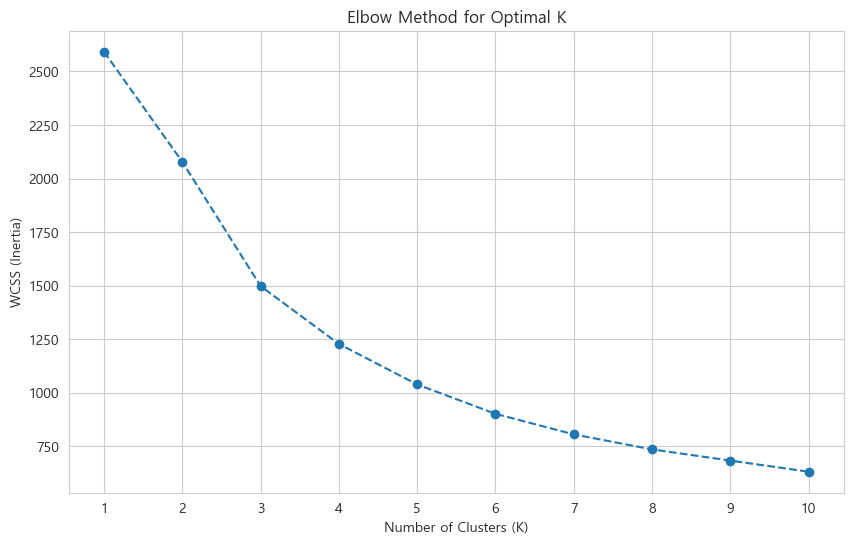

ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ WCSS Í∞êÏÜåÏú®Ïù¥ Í∏âÍ≤©Ìûà Ï§ÑÏñ¥ÎìúÎäî ÏßÄÏ†êÏùÑ ÏµúÏ†ÅÏùò KÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.

--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§. ÏµúÏ†ÅÏùò K Í∞í: 3 ---
--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (K=3) - ÏÉÅÏúÑ 5Í∞ú Ïó≠ ---
  station_name  cluster_label
0           Í∞ÄÎä•              0
1         Í∞ÄÎùΩÏãúÏû•              1
2      Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ              1
3           Í∞ÑÏÑù              0
4           Í∞ïÎÇ®              1


--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† ÌäπÏÑ± (Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ Í∞í) ---
               mean_congestion  max_congestion  mean_discomfort_index  \
cluster_label                                                           
0                    14.807946          57.128              57.493772   
1                    33.353439         119.000              58.478380   
2                     5.763542          74.000              27.118209   

               prop_high_discomfort    mean_ta    mean_hm   mean_ws  \
cluster_label     

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


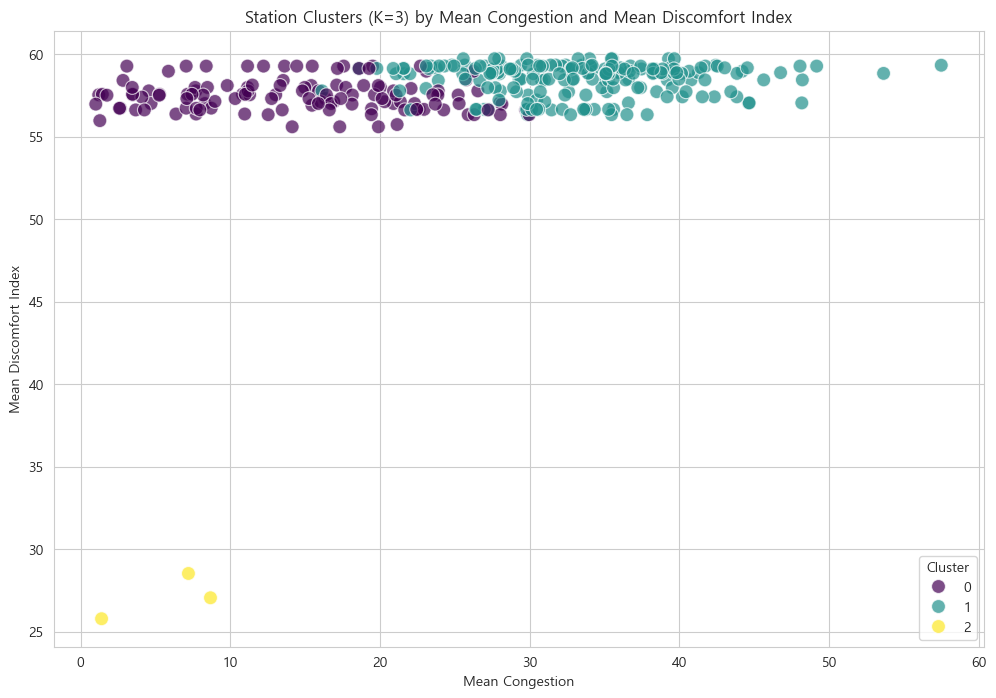

--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ (ÏÉÅÏúÑ 10Í∞ú) ---

ÌÅ¥Îü¨Ïä§ÌÑ∞ 0:
['Í∞ÄÎä•', 'Í∞ÑÏÑù', 'Í∞ïÏùº', 'Í∞úÌôîÏÇ∞', 'Í≤ΩÏ∞∞Î≥ëÏõê', 'Í≥†Ïûî', 'Í≥µÎ¶â', 'Í¥ëÏö¥ÎåÄ', 'Íµ¨ÏÇ∞', 'Íµ¨ÌååÎ∞ú']
------------------------------

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1:
['Í∞ÄÎùΩÏãúÏû•', 'Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ', 'Í∞ïÎÇ®', 'Í∞ïÎÇ®Íµ¨Ï≤≠', 'Í∞ïÎèô', 'Í∞ïÎèôÍµ¨Ï≤≠', 'Í∞ïÎ≥Ä', 'Í∞úÎ¥â', 'Í±¥ÎåÄÏûÖÍµ¨', 'Í≤ΩÎßàÍ≥µÏõê']
------------------------------

ÌÅ¥Îü¨Ïä§ÌÑ∞ 2:
['Ïó∞Ï≤ú', 'Ï†ÑÍ≥°', 'Ï≤≠ÏÇ∞']
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

if 'is_high_discomfort' not in df_1.columns:
    df_1['is_high_discomfort'] = df_1['di_level'].isin(['Î∂àÏæå', 'Îß§Ïö∞ Î∂àÏæå']).astype(int)

print("--- df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÏúÑ 5Í∞ú Ìñâ (ÌôïÏù∏Ïö©) ---")
print(df_1.head())
print("\n")

### 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßëÍ≥Ñ
# Ïó≠ Î≥Ñ ÌäπÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌîºÏ≤òÎ•º Ï†ïÏùòÌïòÍ≥† ÏßëÍ≥ÑÌï©ÎãàÎã§.
# Í∞Å Ïª¨ÎüºÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Îïå numeric_only=TrueÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï†ÅÏö©Ìï©ÎãàÎã§.
station_features = df_1.groupby('station_name').agg(
    mean_congestion=('congestion', lambda x: x.mean(numeric_only=True)),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', lambda x: x.mean(numeric_only=True)),
    prop_high_discomfort=('is_high_discomfort', lambda x: x.mean(numeric_only=True)), # ÎÜíÏùÄ Î∂àÏæåÏßÄÏàò Î∞úÏÉù ÎπÑÏú®
    mean_ta=('ta', lambda x: x.mean(numeric_only=True)),
    mean_hm=('hm', lambda x: x.mean(numeric_only=True)),
    mean_ws=('ws', lambda x: x.mean(numeric_only=True)),
    total_rn_day=('rn_day', 'sum') # sum()ÏùÄ Ïà´ÏûêÌòïÏù¥ ÏïÑÎãå Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Î¨¥ÏãúÌïòÎØÄÎ°ú Î≥ÄÍ≤Ω Î∂àÌïÑÏöî
).reset_index()

print("--- Ïó≠ Î≥Ñ ÏßëÍ≥ÑÎêú ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú Ìñâ) ---")
print(station_features.head())
print("\n")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò ÏÑ†ÌÉù (station_name Ïª¨Îüº Ï†úÏô∏)
features_for_clustering = station_features.drop(columns=['station_name'])

### 2. ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
# StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌîºÏ≤òÎì§ÏùÑ ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

print("--- Ïä§ÏºÄÏùºÎßÅÎêú ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú Ìñâ) ---")
print(scaled_features_df.head())
print("\n")

### 3. ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(K) Í≤∞Ï†ï (ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
# WCSS (Within-Cluster Sum of Squares) ÎòêÎäî InertiaÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏Î•º Ï∞æÏäµÎãàÎã§.
wcss = []
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ ÏãúÎèÑ (ÌïÑÏöîÏóê Îî∞Îùº Î≤îÏúÑ Ï°∞Ï†ï Í∞ÄÎä•)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11)) # xÏ∂ï ÎààÍ∏àÏùÑ 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ ÌëúÏãú
plt.grid(True)
plt.show()
print("ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ WCSS Í∞êÏÜåÏú®Ïù¥ Í∏âÍ≤©Ìûà Ï§ÑÏñ¥ÎìúÎäî ÏßÄÏ†êÏùÑ ÏµúÏ†ÅÏùò KÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.\n")

### 4. K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö©
# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ïÏùÑ ÌÜµÌï¥ Í≤∞Ï†ïÎêú ÏµúÏ†ÅÏùò K Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# ÏïÑÎûò optimal_k Í∞íÏùÄ ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Ï±ÑÏÜåÎ¶¨1ÎãòÍªòÏÑú ÏßÅÏ†ë Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# ÏòàÏãúÎ°ú 3ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄÎßå, Ïã§Ï†ú Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Í∞ÄÏû• Ï†ÅÏ†àÌïú Í∞íÏùÑ ÏÑ†ÌÉùÌïòÏã≠ÏãúÏò§.
optimal_k = 3

print(f"--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§. ÏµúÏ†ÅÏùò K Í∞í: {optimal_k} ---")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# ÏõêÎ≥∏ Ïó≠ ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞Ïóê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® Ï∂îÍ∞Ä
station_features['cluster_label'] = cluster_labels

print(f"--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (K={optimal_k}) - ÏÉÅÏúÑ 5Í∞ú Ïó≠ ---")
print(station_features[['station_name', 'cluster_label']].head())
print("\n")

### 5. Íµ∞Ïßë Í≤∞Í≥º Ìï¥ÏÑù Î∞è ÏãúÍ∞ÅÌôî

# 5.1. Í∞Å Íµ∞ÏßëÏùò ÌèâÍ∑† ÌäπÏÑ± Î∂ÑÏÑù
# Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ ÌîºÏ≤òÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å Íµ∞ÏßëÏùò ÌäπÏÑ±ÏùÑ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Îçî ÏßÅÍ¥ÄÏ†ÅÏûÖÎãàÎã§.
# station_name Ïª¨ÎüºÏùÑ Ï†úÏô∏ÌïòÍ≥† ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
cluster_summary = station_features.drop(columns=['station_name']).groupby('cluster_label').mean()
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† ÌäπÏÑ± (Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ Í∞í) ---")
print(cluster_summary)
print("\n")

# 5.2. Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïó≠Ïùò Í∞úÏàò ÌôïÏù∏
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïó≠Ïùò Í∞úÏàò ---")
print(station_features['cluster_label'].value_counts().sort_index())
print("\n")

# 5.3. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Íµ∞Ïßë ÌäπÏÑ± ÌååÏïÖ
# Îëê Í∞ÄÏßÄ Ï£ºÏöî ÌîºÏ≤òÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# Ïòà: 'mean_congestion'Í≥º 'mean_discomfort_index'Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=station_features, x='mean_congestion', y='mean_discomfort_index',
                hue='cluster_label', palette='viridis', s=100, alpha=0.7)
plt.title(f'Station Clusters (K={optimal_k}) by Mean Congestion and Mean Discomfort Index')
plt.xlabel('Mean Congestion')
plt.ylabel('Mean Discomfort Index')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# 5.4. Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ ÌôïÏù∏ (ÏùºÎ∂Ä)
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ (ÏÉÅÏúÑ 10Í∞ú) ---")
for i in range(optimal_k):
    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {i}:")
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïòÏó¨ Ï°∞Í±¥Î¨∏ Ï∂îÍ∞Ä
    if not station_features[station_features['cluster_label'] == i].empty:
        print(station_features[station_features['cluster_label'] == i]['station_name'].head(10).tolist())
    else:
        print("Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠Ïù¥ ÏóÜÏäµÎãàÎã§.")
    print("-" * 30)


- 1. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò Î∞è Î∂ÑÌè¨
    - ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÎäî 3Í∞úÎ°ú ÏÑ†Ï†ïÌïòÏÖ®Í≥†, Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïó≠ Í∞úÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 0: 125Í∞ú Ïó≠
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: 196Í∞ú Ïó≠
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: 3Í∞ú Ïó≠ (Îß§Ïö∞ ÏÜåÏàò)

- 2. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÎπÑÍµê

|ÌÅ¥Îü¨Ïä§ÌÑ∞	|ÌèâÍ∑† ÌòºÏû°ÎèÑ (mean_congestion)	|ÏµúÎåÄ ÌòºÏû°ÎèÑ (max_congestion)	|ÌèâÍ∑† Î∂àÏæåÏßÄÏàò (mean_discomfort_index)	|ÎÜíÏùÄ Î∂àÏæåÏßÄÏàò ÎπÑÏú® (prop_high_discomfort)	|ÌèâÍ∑† Í∏∞Ïò® (mean_ta)	|ÌèâÍ∑† ÏäµÎèÑ (mean_hm)	|ÌèâÍ∑† ÌíçÏÜç (mean_ws)	|Ï¥ù Í∞ïÏàòÎüâ (total_rn_day)|
|----|----|----|----|---|---|---|---|----|
|0	|14.81	|57.13	|57.49	|0.049	|13.92	|66.22	|1.49	|101,710|
|1	|33.35	|119.00	|58.48	|0.051	|14.53	|62.39	|1.71	|154,151|
|2	|5.76	|74.00	|27.12	|0.000	|-5.86	|73.27	|0.99	|892|


- 3. ÏãúÍ∞ÅÌôî Ìï¥ÏÑù
    - ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑÏóêÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Í≥º 1ÏùÄ Î∂àÏæåÏßÄÏàò(ÏÑ∏Î°úÏ∂ï)Í∞Ä ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏúºÎ°ú ÎÜíÍ≤å Î∂ÑÌè¨ÌïòÏßÄÎßå, ÌòºÏû°ÎèÑ(Í∞ÄÎ°úÏ∂ï)ÏóêÏÑúÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïù¥ Ìõ®Ïî¨ ÎÜíÏùÄ Í∞íÏùÑ Î≥¥ÏûÖÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Îäî ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàò Î™®Îëê ÎÇÆÏùÄ ÏòÅÏó≠Ïóê ÏúÑÏπòÌï¥ ÏûàÏñ¥, Îã§Î•∏ Îëê ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄ Î™ÖÌôïÌûà Íµ¨Î∂ÑÎê©ÎãàÎã§.
- 4. Ï¢ÖÌï© Ìï¥ÏÑù Î∞è ÌôúÏö© Î∞©Ïïà
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (Í≥†ÌòºÏû°¬∑Í≥†Î∂àÏæåÏßÄÏàò Í∑∏Î£π): ÏÑúÏö∏ Ï£ºÏöî Ï§ëÏã¨ÏßÄÎÇò Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ ÌòºÏû°Ïù¥ Ïã¨Ìïú Ïó≠Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§. Ïù¥ Í∑∏Î£πÏùÄ ÌòºÏû° ÏôÑÌôî Î∞è ÏæåÏ†ÅÌïú ÌôòÍ≤Ω Ï°∞ÏÑ±ÏùÑ ÏúÑÌïú Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅÏûÖÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (Ï§ëÍ∞Ñ ÌòºÏû°¬∑Ï§ëÍ∞Ñ Î∂àÏæåÏßÄÏàò Í∑∏Î£π): ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàòÍ∞Ä Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù∏ Ïó≠Îì§Î°ú, Í¥ÄÎ¶¨ Ïö∞ÏÑ†ÏàúÏúÑÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Î≥¥Îã§Îäî ÎÇÆÏúºÎÇò Ï£ºÍ∏∞Ï†ÅÏù∏ Î™®ÎãàÌÑ∞ÎßÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Ï†ÄÌòºÏû°¬∑Ï†ÄÎ∂àÏæåÏßÄÏàò Í∑∏Î£π): ÌòºÏû°ÎèÑÍ∞Ä ÎÇÆÍ≥† ÏæåÏ†ÅÌïú ÌôòÍ≤ΩÏùÑ Í∞ÄÏßÑ Ïó≠Îì§Î°ú, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í¥ÄÎ¶¨ Î∂ÄÎã¥Ïù¥ Ï†ÅÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§. Îã§Îßå Ïó≠ ÏàòÍ∞Ä Ï†ÅÏñ¥ Í∞úÎ≥Ñ Ïó≠ ÌäπÏÑ±ÏùÑ Î©¥Î∞ÄÌûà Î∂ÑÏÑùÌï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

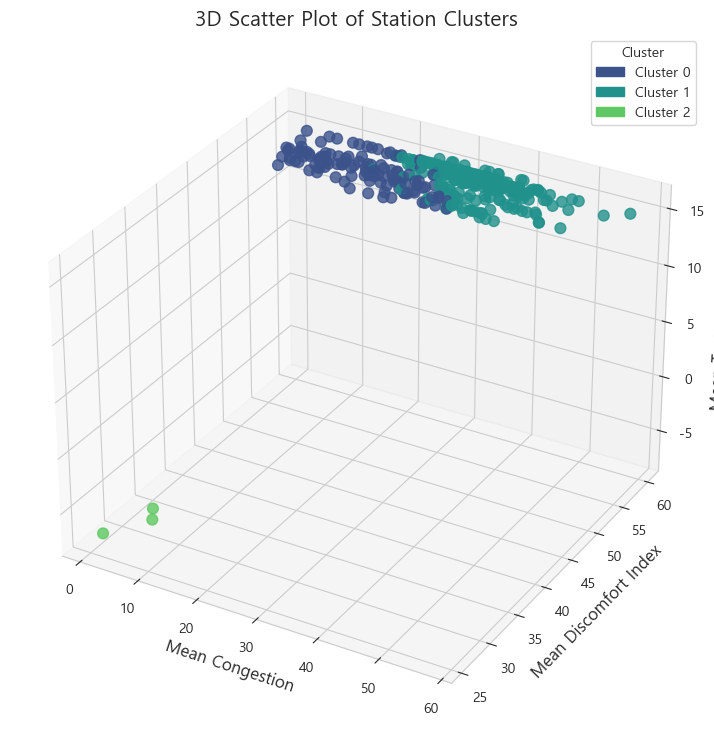

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D ÌîåÎ°ØÏùÑ ÏúÑÌïú Î™®Îìà
import seaborn as sns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÍ∞Ä Ìè¨Ìï®Îêú station_features Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# x, y, z Ï∂ïÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏßÄÏ†ï
x = station_features['mean_congestion']
y = station_features['mean_discomfort_index']
z = station_features['mean_ta']

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®Ïóê Îî∞Îùº ÏÉâÏÉÅ ÏßÄÏ†ï
clusters = station_features['cluster_label']
palette = sns.color_palette("viridis", n_colors=clusters.nunique())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ Îß§Ìïë
colors = [palette[label] for label in clusters]

# 3D ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
scatter = ax.scatter(x, y, z, c=colors, s=60, alpha=0.8)

# Ï∂ï ÎùºÎ≤® ÏÑ§Ï†ï
ax.set_xlabel('Mean Congestion', fontsize=12)
ax.set_ylabel('Mean Discomfort Index', fontsize=12)
ax.set_zlabel('Mean Temperature (Ta)', fontsize=12)

# Ï†úÎ™© ÏÑ§Ï†ï
ax.set_title('3D Scatter Plot of Station Clusters', fontsize=15)

# Î≤îÎ°Ä ÏÉùÏÑ±
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÏÉâÏÉÅÍ≥º Ïù¥Î¶ÑÏùÑ Î≤îÎ°ÄÎ°ú ÌëúÏãú
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=palette[i], label=f'Cluster {i}') for i in range(clusters.nunique())]
ax.legend(handles=legend_patches, title='Cluster')

plt.show()

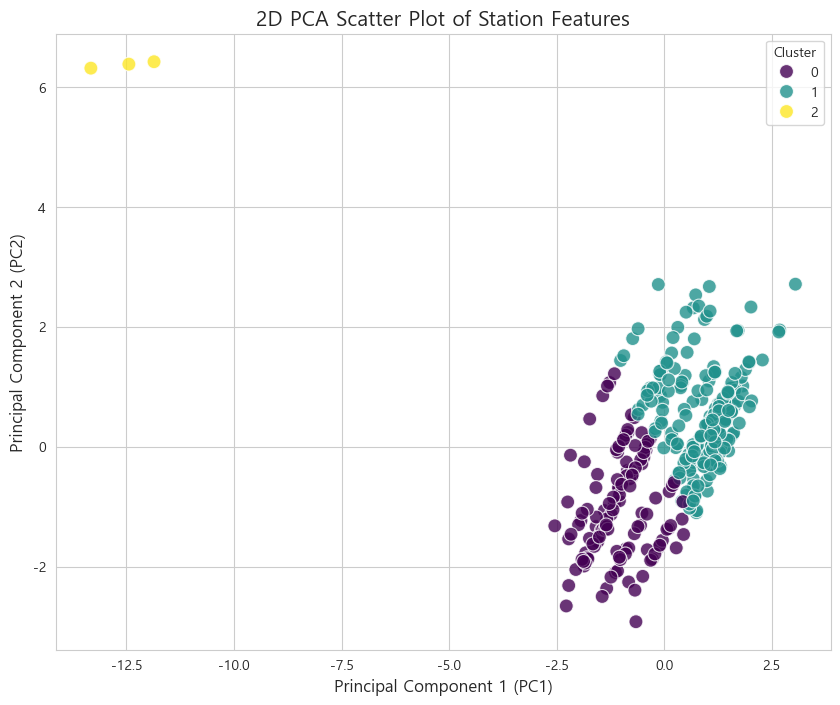

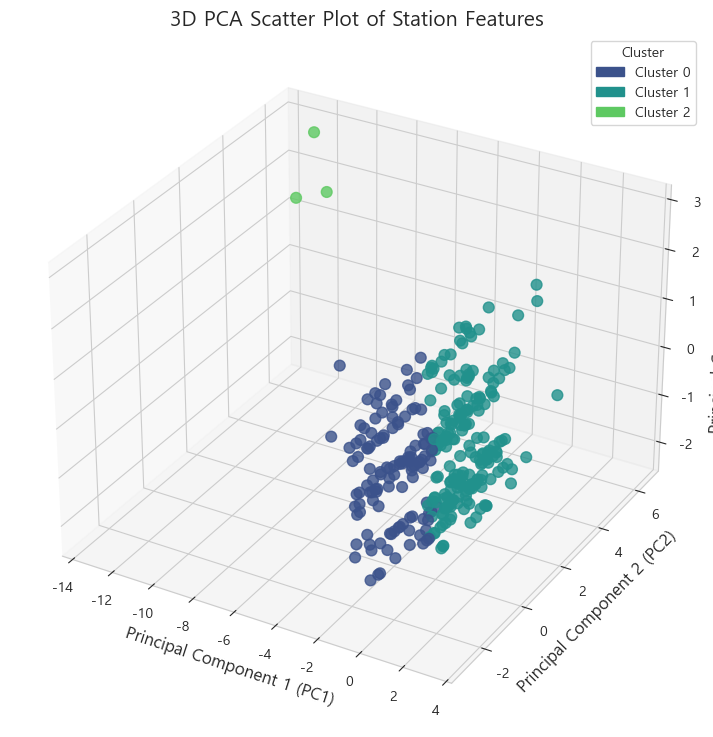

2D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®
PC1: 34.47%
PC2: 20.55%
2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: 55.02%

3D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®
PC1: 34.47%
PC2: 20.55%
PC3: 15.97%
3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: 70.98%



In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# 1. PCA Ï†ÅÏö© (2Ï∞®Ïõê)
pca = PCA(n_components=2)
principal_components_2d = pca.fit_transform(scaled_features)


pca_df_2d = pd.DataFrame(data=principal_components_2d, columns=['PC1', 'PC2'])
pca_df_2d['cluster_label'] = cluster_labels  

# 2Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='cluster_label', palette='viridis', s=100, alpha=0.8)
plt.title('2D PCA Scatter Plot of Station Features', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# PCA Ï†ÅÏö© -> 3Ï∞®Ïõê
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_features)


pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['cluster_label'] = cluster_labels 

# 3Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 3D ÏÇ∞Ï†êÎèÑ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Ï†ï
x = pca_df_3d['PC1']
y = pca_df_3d['PC2']
z = pca_df_3d['PC3']
clusters = pca_df_3d['cluster_label']

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ Îß§Ìïë
palette = sns.color_palette("viridis", n_colors=clusters.nunique())
colors = [palette[label] for label in clusters]

# 3D ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
scatter = ax.scatter(x, y, z, c=colors, s=60, alpha=0.8)


ax.set_xlabel('Principal Component 1 (PC1)', fontsize=12)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize=12)
ax.set_zlabel('Principal Component 3 (PC3)', fontsize=12)


ax.set_title('3D PCA Scatter Plot of Station Features', fontsize=15)

# Î≤îÎ°Ä ÏÉùÏÑ±
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=palette[i], label=f'Cluster {i}') for i in range(clusters.nunique())]
ax.legend(handles=legend_patches, title='Cluster')

plt.show()

# 3. PCA Î≥ÄÎèôÏÑ± ÏÑ§Î™Ö ÎπÑÏú® ÌôïÏù∏
explained_variance_2d = pca.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

print("2D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®")
for i, v in enumerate(explained_variance_2d, start=1):
    print(f"PC{i}: {v:.2%}")
print(f"2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: {explained_variance_2d.cumsum()[-1]:.2%}\n")

print("3D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®")
for i, v in enumerate(explained_variance_3d, start=1):
    print(f"PC{i}: {v:.2%}")
print(f"3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: {explained_variance_3d.cumsum()[-1]:.2%}\n")

 2DÏôÄ 3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú® Ï∞®Ïù¥Ïùò ÏùòÎØ∏

2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®(55.02%):
PC1Í≥º PC2Îßå ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî Í≤ΩÏö∞, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ±(Ï†ïÎ≥¥)Ïùò ÏïΩ 55%Î•º Ïú†ÏßÄÌïòÍ≥† ÏûàÎäîÍ±∞Í≥†

Ïù¥Í≤ÉÏùÄ Ï∞®ÏõêÏùÑ 2Í∞ú(PC1, PC2)Î°ú Ï§ÑÏòÄÏùÑ Îïå ÏïΩ 45%Ïùò Ï†ïÎ≥¥Í∞Ä ÏÜêÏã§ÎêúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÍ≥†?

3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®(70.98%):
PC1, PC2Ïóê PC3ÍπåÏßÄ Ìè¨Ìï®ÌñàÏùÑ Îïå Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî ÎπÑÏú®Ïù¥ 55.02%ÏóêÏÑú 70.98%Î°ú Ï¶ùÍ∞ÄÌïòÍ≥†

Îî∞ÎùºÏÑú 3Ï∞®ÏõêÏúºÎ°ú ÌôïÏû•ÌïòÎ©¥ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏïΩ 15.96%ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ±ÏùÑ Îçî ÏÑ§Î™ÖÌï† Ïàò ÏûàÍ≤†Ï£†?

Ìï¥ÏÑùÌï† Ïàò ÏûàÎäî Í≤∞Î°†

2D Ìï¥ÏÑùÏù¥ Ï†ÅÌï©Ìïú ÏÉÅÌô©:
Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ± Ï†ïÎ≥¥ Ï§ë ÏïΩ 55%Î•º ÏÑ§Î™ÖÌïòÎ©∞, Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÍ±∞ÎÇò Î∂ÑÏÑùÌïòÎäî Îç∞ Ï∂©Î∂ÑÌïòÎã§Í≥† ÌåêÎã®Îê† Îïå.

Ïòà: ÏÑ§Î™Ö ÎπÑÏú®Ïù¥ 50~60% Ïù¥ÏÉÅÏù¥Î©¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ∞ ÌùêÎ¶Ñ(Ìå®ÌÑ¥)ÏùÑ Ïù¥Ìï¥ÌïòÍ∏∞Ïóê Ï†ÅÌï©Ìïú Í≤ΩÏö∞Í∞Ä ÎßéÍ∏¥Ìï¥

3D Ìï¥ÏÑùÏù¥ Ï†ÅÌï©Ìïú ÏÉÅÌô©:

PC1, PC2, PC3Î•º ÌÜµÌï¥ 70.98%Ïùò Î≥ÄÎèôÏÑ±ÏùÑ ÏÑ§Î™ÖÌïòÎØÄÎ°ú, ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÎπÑÏú®Ïùò Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥Î•º Îã§Î£∞ Ïàò ÏûàÏ£†

ÌïòÏßÄÎßå ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®Ïù¥ Ïó¨Ï†ÑÌûà 100%Í∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê ÏùºÎ∂Ä Î≥ÄÎèô Ï†ïÎ≥¥Í∞Ä Ïó¨Ï†ÑÌûà ÏÜêÏã§Îêú ÏÉÅÌÉúÏù¥Îã§

In [ ]:
station_features

station_name  mean_congestion  max_congestion  mean_discomfort_index  \
0             Í∞ÄÎä•        19.439286              58              56.694763   
1           Í∞ÄÎùΩÏãúÏû•        28.121909             129              59.280310   
2        Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ        35.397321             152              59.333417   
3             Í∞ÑÏÑù        16.914698              69              57.120372   
4             Í∞ïÎÇ®        45.631250             143              58.443883   
..           ...              ...             ...                    ...   
319           ÌôîÏ†ï        17.383173              69              57.312046   
320           ÌöåÍ∏∞        20.884409              76              59.138458   
321           ÌöåÎ£°        23.695673              95              56.976171   
322           ÌöåÌòÑ        30.466209              80              56.656856   
323        Ìö®Ï∞ΩÍ≥µÏõêÏïû        26.685508             108              59.286532   

     prop_high_discomfort    mean_ta    mean_hm   mean_ws   total_rn_day  \
0                0.040522  13.421683  67.098763  0.561884   93893.312461   
1                0.062363  15.122763  60.435115  1.244568  404353.682504   
2                0.057143  15.157563  59.349150  1.512963  106026.320000   
3                0.053709  13.746532  70.374030  1.288355  101334.791284   
4                0.084478  14.549424  71.041040  1.092833  101643.340738   
..                    ...        ...        ...       ...            ...   
319              0.042308  13.867660  66.915858  1.683407   87721.379063   
320              0.044231  15.026786  57.513286  1.686778  116629.360000   
321              0.067308  13.410060  73.342666  1.156868   97704.540565   
322              0.031044  13.210371  64.728970  2.333757   77810.566644   
323              0.062088  15.095765  59.313544  1.950207   98083.920000   

     cluster_label  
0                0  
1                1  
2                1  
3                0  
4                1  
..             ...  
319              0  
320              1  
321              0  
322              1  
323              1  

[324 rows x 10 columns]

In [ ]:
# station_featuresÏóêÎäî 'station_name'Í≥º 'cluster_label' Ïª¨ÎüºÏù¥ ÏûàÏäµÎãàÎã§.
# df_1Ïóê 'cluster_label' Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ Î≥ëÌï©(merge)Ìï©ÎãàÎã§.

df_1 = df_1.merge(
    station_features[['station_name', 'cluster_label']],
    on='station_name',
    how='left'  # df_1 Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©, ÏóÜÎäî Ïó≠ÏùÄ NaN Ï≤òÎ¶¨
)

# Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
print(df_1[['station_name', 'cluster_label']].head())

  station_name  cluster_label
0          ÏÑúÏö∏Ïó≠              1
1          ÏÑúÏö∏Ïó≠              1
2          ÏÑúÏö∏Ïó≠              1
3          ÏÑúÏö∏Ïó≠              1
4          ÏÑúÏö∏Ïó≠              1


# Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏.

In [ ]:
vif_features = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'chi', 'rn_day', 'hour', 'discomfort_index']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_1[vif_features].copy()  # df_imputedÎäî Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature        VIF
0                ta  62.050987
1                wd   4.706753
2                ws   3.603523
3            rn_hr1   1.256326
4                hm  16.846082
5                si   3.749209
6               chi  77.315311
7            rn_day   1.451074
8              hour   6.072533
9  discomfort_index  88.131140


Í∞ÄÏû• ÎÜíÏùÄ VIFÎ•º Í∞ÄÏßÑ Î≥ÄÏàò Ï†úÍ±∞:

discomfort_index (88.13)Í∞Ä Í∞ÄÏû• ÎÜíÏúºÎØÄÎ°ú, Ïù¥ Î≥ÄÏàòÎ•º Î®ºÏ†Ä Ï†úÍ±∞ÌïòÍ≥† VIFÎ•º Îã§Ïãú Í≥ÑÏÇ∞Ìï¥Î¥ÖÎãàÎã§.

In [ ]:
vif_features = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'chi', 'rn_day', 'hour']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_1[vif_features].copy()  # df_imputedÎäî Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature        VIF
0      ta  58.678076
1      wd   4.210355
2      ws   3.274991
3  rn_hr1   1.254236
4      hm   7.067352
5      si   2.798086
6     chi  72.471904
7  rn_day   1.446588
8    hour   5.085159


In [ ]:
vif_features = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'rn_day', 'hour']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_1[vif_features].copy()  # df_imputedÎäî Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature       VIF
0      ta  3.481061
1      wd  4.189895
2      ws  2.924771
3  rn_hr1  1.254060
4      hm  5.246859
5      si  2.763395
6  rn_day  1.446328
7    hour  4.944420


- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÍ≤å ÎÇòÏôîÎçò Î∂àÏæåÏßÄÏàò, Ïò®ÎèÑ, Ï≤¥Í∞ê Ïò®ÎèÑ Ï§ë Î∂àÏæåÏßÄÏàò, Ï≤¥Í∞ê Ïò®ÎèÑÎ•º Ï†úÍ±∞.
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÍ∞Ä Ìï¥Í≤∞Ïù¥ Îêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

# Î™®Îç∏ÎßÅ

In [ ]:
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

In [ ]:
# Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
mapping = {'Í∏∞ÌÉÄ': 0, 'Ï∂úÍ∑º': 1, 'Ìá¥Í∑º': 2}

# Í∞í Î≥ÄÌôò Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
df_1['time_type'] = df_1['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'].map(mapping)

# Í∏∞Ï°¥ Ïª¨Îüº ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
df_1 = df_1.drop(columns=['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])

NameError: name 'df_1' is not defined

In [ ]:
df['direction'] = df['direction'].map({'ÏÉÅÏÑ†': 0, 'ÌïòÏÑ†': 1})

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Í∏∞Î≥∏ ÏÑ∏ÌåÖ
target = 'congestion'
cat_cols = ['line', 'station_number', 'is_weekend_or_holiday', 'time_type']
num_cols = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'rn_day', 'hour', 'month', 'day']

df_sample = df_1[[*cat_cols, *num_cols, target]].dropna().copy()

# üéØ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
encoder = TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_sample[cat_cols + num_cols], df_sample[target])
df_encoded[target] = df_sample[target].values

# üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò ÏàòÏπò Î≥ÄÏàò ÏÑ†ÌÉù (ÏÉÅÏúÑ 5Í∞ú ÏòàÏãú)
corrs = df_encoded.corr()[target].abs().sort_values(ascending=False)
top_features = corrs[1:6].index.tolist()  # ÏÉÅÏúÑ 5Í∞ú
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò:", top_features)

# üß† Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†úÍ±∞ (VIF)
X_vif = df_encoded[top_features].copy()
vif_data = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("\n‚ñ∂ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (VIF):")
print(vif_data)

# ‚ö° Î∞òÎ≥µ ÏÉòÌîåÎßÅ Î™®Îç∏ÎßÅ
rmse_list = []
r2_list = []
n_iter = 500

for i in range(n_iter):
    df_iter = df_encoded.sample(n=5000, random_state=42 + i)

    X = df_iter[top_features]
    y = df_iter[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        tree_method="gpu_hist",  # üöÄ GPU ÏÇ¨Ïö©
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # RMSE Í≥ÑÏÇ∞ Ïãú squared=False ÎåÄÏã† np.sqrt() ÏÇ¨Ïö©
    rmse_list.append(np.sqrt(mean_squared_error(y_test, preds))) # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ïÌñàÏäµÎãàÎã§.
    r2_list.append(r2_score(y_test, preds))

# ÌèâÍ∑† ÏÑ±Îä• Ï∂úÎ†•
print(f"\n‚úÖ ÌèâÍ∑† RMSE (5000Í∞ú x {n_iter}Ìöå): {np.mean(rmse_list):.4f}")
print(f"‚úÖ ÌèâÍ∑† R¬≤   (5000Í∞ú x {n_iter}Ìöå): {np.mean(r2_list):.4f}")

# üìä Feature Importance ÏãúÍ∞ÅÌôî
model_final = XGBRegressor(tree_method="gpu_hist")
model_final.fit(X_train, y_train)
plt.figure(figsize=(8, 6))
sns.barplot(x=model_final.feature_importances_, y=top_features)
plt.title("XGBoost Feature Importance (ÏµúÏ¢Ö Î™®Îç∏)")
plt.show()


In [ ]:
# 1. ÎÇ†Ïßú/ÏãúÍ∞Ñ Í¥ÄÎ†® ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± (Ïù¥ÎØ∏ ÌïòÏÖ®Îã§Î©¥ Í±¥ÎÑàÎõ∞ÏÑ∏Ïöî)
if not pd.api.types.is_datetime64_any_dtype(df_1['date_dt']):
    df_1['date_dt'] = pd.to_datetime(df_1['date_dt'])

df_1['year'] = df_1['date_dt'].dt.year
df_1['month'] = df_1['date_dt'].dt.month
df_1['day'] = df_1['date_dt'].dt.day
df_1['DAY_OF_WEEK'] = df_1['date_dt'].dt.dayofweek

In [ ]:
# 3. Ï≤¥Í∞êÏò®ÎèÑ 'chi'Î•º 'calculated_chi'Î°ú ÎåÄÏ≤¥ (ÎßåÏïΩ calculated_chiÍ∞Ä ÏûàÎã§Î©¥)
# df_1['chi'] = df_1['calculated_chi'] # Ïù¥Ï†ÑÏóê ÎÖºÏùòÎêú ÎÇ¥Ïö©

# 4. Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò Ï≤òÎ¶¨Îêú Ïª¨Îüº Ï†úÍ±∞ (VIF Í≤∞Í≥º Î∞è Ï§ëÎ≥µ Ï†ïÎ≥¥, Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Ïª¨ÎüºÎì§ÏùÑ Ï†úÍ±∞)
# 'calculated_chi', 'calculated_chi_rounded', 'chi_rounded', 'is_same', 'di_level', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'date_dt'
# VIFÍ∞Ä ÎÜíÏïòÎçò 'ta', 'hm', 'discomfort_index'Îäî ÏùºÎã® Ìè¨Ìï®ÌïòÏó¨ ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàòÎ•º ÎßåÎì§Í≥†,
# ÏµúÏ¢Ö ÌîºÏ≤ò ÏÑ†ÌÉù Ïãú Îã§Ïãú Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§.
columns_to_drop_after_preprocessing = [
    'calculated_chi', 'calculated_chi_rounded', 'chi_rounded', 'is_same',
    'di_level', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'date_dt'
]
df_1 = df_1.drop(columns=columns_to_drop_after_preprocessing, errors='ignore')


# --- ÏÉàÎ°úÏö¥ ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± ---
# Í∏∞Ï°¥ Ïª¨ÎüºÎì§Ïù¥ df_1Ïóê Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ NameErrorÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.

# 1. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎßê/ÌèâÏùº ÌòºÏû°ÎèÑ ÌäπÏÑ±
df_1['hour_is_weekend_or_holiday_interaction'] = df_1['hour'] * df_1['is_weekend_or_holiday']

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï∂úÌá¥Í∑º/Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ ÌòºÏû°ÎèÑ ÌäπÏÑ±
df_1['hour_time_type_interaction'] = df_1['hour'] * df_1['time_type']

# 3. Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄ ÌòºÏû°ÎèÑ ÌäπÏÑ± (station_numberÎäî ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© ÌõÑ ÏàòÏπòÌòïÏù¥ ÎêòÎØÄÎ°ú, Ïù∏ÏΩîÎî©Îêú Í∞íÍ≥º hourÎ•º Í≥±Ìï©ÎãàÎã§)
# Ïù¥ ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàòÎäî ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© ÌõÑÏóê ÏÉùÏÑ±ÌïòÎäî Í≤ÉÏù¥ Îçî Ï†ÅÌï©Ìï©ÎãàÎã§.
# ÏïÑÎûò Î™®Îç∏ÎßÅ ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú df_encoded ÏÉùÏÑ± ÌõÑ Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

# 4. Í∞ïÏàòÎüâÍ≥º Ï£ºÎßê/ÌèâÏùº ÏÉÅÌò∏ÏûëÏö©
df_1['rn_day_is_weekend_or_holiday_interaction'] = df_1['rn_day'] * df_1['is_weekend_or_holiday']

# --- Î™®Îç∏ÎßÅ ÌååÏù¥ÌîÑÎùºÏù∏ ÏãúÏûë ---

# Í∏∞Î≥∏ ÏÑ∏ÌåÖ
target = 'congestion'

# Ïö∞Î¶¨Í∞Ä ÎÖºÏùòÌïú ÌîºÏ≤ò ÏÑ†ÌÉù Î∞òÏòÅ
# Î≤îÏ£ºÌòï Î≥ÄÏàò (Target Encoding ÎåÄÏÉÅ)
cat_cols = [
    'line', 'station_number', 'is_weekend_or_holiday', 'time_type',
    'DAY_OF_WEEK' # DAY_OF_WEEKÎèÑ Î≤îÏ£ºÌòïÏúºÎ°ú Ï≤òÎ¶¨
]
# ÏàòÏπòÌòï Î≥ÄÏàò (VIF Í≤∞Í≥º Î∞è ÎèÑÎ©îÏù∏ ÏßÄÏãù Î∞òÏòÅ)
num_cols = [
    'hour', 'month', 'day', # ÏãúÍ∞Ñ Í¥ÄÎ†®
    'ws', 'rn_hr1', 'rn_day', 'si', 'wd', # Í∏∞ÏÉÅ Í¥ÄÎ†®
    'chi', 'ta', 'hm', 'discomfort_index', # VIFÍ∞Ä ÎÜíÏïòÏßÄÎßå Ï§ëÏöîÌïòÎã§Í≥† ÌåêÎã®Îêú Î≥ÄÏàòÎì§
    'hour_is_weekend_or_holiday_interaction', # ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò
    'hour_time_type_interaction', # ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò
    'rn_day_is_weekend_or_holiday_interaction' # ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò
]


# df_sample ÏÉùÏÑ± Ïãú, ÏÑ†ÌÉùÎêú Î™®Îì† Ïª¨ÎüºÏù¥ df_1Ïóê Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
all_features = cat_cols + num_cols + [target]
df_sample = df_1[all_features].dropna().copy() # Í≤∞Ï∏°Ïπò Ï†úÍ±∞Îäî Í∏∞Ï°¥ ÏΩîÎìú Ïú†ÏßÄ

# üéØ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
encoder = TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_sample[cat_cols + num_cols], df_sample[target])
df_encoded[target] = df_sample[target].values # ÌÉÄÍ≤ü Ïª¨Îüº Îã§Ïãú Ï∂îÍ∞Ä

# --- ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàòÎ•º ÌôúÏö©Ìïú ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± ---
# station_numberÎäî Ïù¥Ï†ú Ïù∏ÏΩîÎî©Îêú ÏàòÏπòÌòïÏù¥ÎØÄÎ°ú, hourÏôÄ Í≥±Ìï† Ïàò ÏûàÏäµÎãàÎã§.
df_encoded['station_hour_interaction'] = df_encoded['station_number'] * df_encoded['hour']
num_cols.append('station_hour_interaction') # num_cols Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä (VIF Î∞è Î™®Îç∏ÎßÅÏóê Ìè¨Ìï®)

# üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò ÏàòÏπò Î≥ÄÏàò ÏÑ†ÌÉù (ÏÉÅÏúÑ NÍ∞ú ÏòàÏãú)
# Ïù¥Ï†ú Î™®Îì† ÌîºÏ≤òÎ•º Î™®Îç∏Ïóê ÎÑ£ÏùÑ Í≤ÉÏù¥ÎØÄÎ°ú, Ïù¥ Î∂ÄÎ∂ÑÏùÄ Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÍ±∞ÎÇò Ï∞∏Í≥†Ïö©ÏúºÎ°úÎßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# corrs = df_encoded.corr()[target].abs().sort_values(ascending=False)
# top_features = corrs[1:6].index.tolist() # ÏÉÅÏúÑ 5Í∞ú
# print("ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò):", top_features)

# üß† Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†êÍ≤Ä (VIF) - Î™®Îì† ÌäπÏÑ± Î≥ÄÏàòÏóê ÎåÄÌï¥ ÌôïÏù∏
# VIFÎäî Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©∞, VIFÍ∞Ä ÎÜíÎçîÎùºÎèÑ ÎèÑÎ©îÏù∏ÏÉÅ Ï§ëÏöîÌïú Î≥ÄÏàòÎäî Ïú†ÏßÄÌï©ÎãàÎã§.
X_vif_all = df_encoded.drop(columns=[target]).copy()

# VIF Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif_all.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_all.values, i) for i in range(X_vif_all.shape[1])]

print("\n‚ñ∂ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (VIF - Î™®Îì† ÌäπÏÑ± Î≥ÄÏàò):")
print(vif_data.sort_values(by='VIF', ascending=False))

# --- Î™®Îç∏ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÏµúÏ¢Ö ÌäπÏÑ± Î¶¨Ïä§Ìä∏ Ï†ïÏùò ---
# Ïù¥Ï†ú top_features ÎåÄÏã† Î™®Îì† ÌäπÏÑ± Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
final_model_features = X_vif_all.columns.tolist()


- Í≤∞Î°†Ï†ÅÏúºÎ°ú, VIFÍ∞Ä ÎÜíÏïÑÏßÑ Í≤ÉÏùÄ ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò Ï∂îÍ∞ÄÏôÄ Í∏∞Ï°¥ Î≥ÄÏàò Ïû¨Ìè¨Ìï®Ïùò ÏûêÏó∞Ïä§Îü¨Ïö¥ Í≤∞Í≥ºÏûÖÎãàÎã§. Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏ÏóêÏÑúÎäî Ïù¥ VIF ÏàòÏπòÏóê ÎÑàÎ¨¥ ÏñΩÎß§Ïù¥ÏßÄ ÎßàÏãúÍ≥†, ÏùºÎã® Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú ÏÑ±Îä•ÏùÑ ÌôïÏù∏ÌïòÎäî Îç∞ ÏßëÏ§ëÌïòÏãúÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.



---


--- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 500000 ---

--- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏãúÏûë (RandomizedSearchCV) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

‚úÖ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'colsample_bytree': 0.6550083776583973, 'gamma': 0.0682132702100517, 'learning_rate': 0.02134735212405891, 'max_depth': 9, 'n_estimators': 514, 'reg_alpha': 0.0877339353380981, 'reg_lambda': 0.025794162771515562, 'subsample': 0.8639936184136716}
‚úÖ ÏµúÏ†Å Î™®Îç∏Ïùò ÍµêÏ∞® Í≤ÄÏ¶ù RMSE: 12.2316


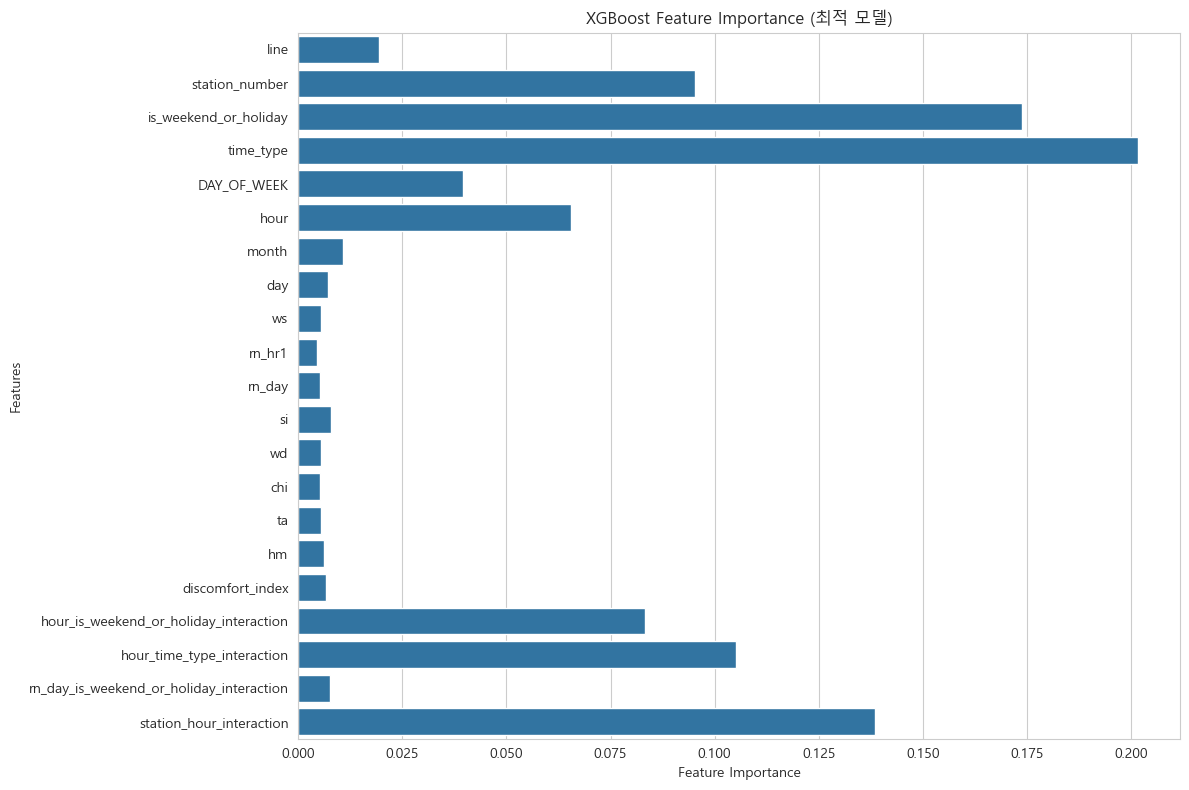


--- ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïû¨ÌïôÏäµ ÏãúÏûë ---

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ RMSE: 12.0930
‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ R¬≤: 0.6649


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint

final_model_features = X_vif_all.columns.tolist()

# ‚ö° ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (RandomizedSearchCV)
# XÏôÄ y Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ï†ÑÏ≤¥ df_encoded ÏÇ¨Ïö©)
X_full = df_encoded[final_model_features] # Î™®Îì† ÌäπÏÑ± Î≥ÄÏàò ÏÇ¨Ïö©
y_full = df_encoded[target]

# --- Ï§ëÏöî: RandomizedSearchCVÏóê Ï†ÑÎã¨Ìï† Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ---
# Îç∞Ïù¥ÌÑ∞Í∞Ä Îß§Ïö∞ ÌÅ¨ÎØÄÎ°ú, ÌäúÎãùÏùÑ ÏúÑÌïú ÏÉòÌîåÎßÅÏùÑ Î®ºÏ†Ä ÏàòÌñâÌï©ÎãàÎã§.
# ÏòàÎ•º Îì§Ïñ¥, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 10% ÎòêÎäî ÌäπÏ†ï Í∞úÏàò(Ïòà: 50Îßå Í∞ú)Î•º ÏÉòÌîåÎßÅÌï©ÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî 50Îßå Í∞úÎ•º ÏÉòÌîåÎßÅÌïòÎäî ÏòàÏãúÏûÖÎãàÎã§. ÌïÑÏöîÏóê Îî∞Îùº Í∞úÏàòÎ•º Ï°∞Ï†àÌïòÏÑ∏Ïöî.
sample_size_for_tuning = 500000 # 50Îßå Í∞ú (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏïΩ 10%)
if len(X_full) > sample_size_for_tuning:
    sample_indices = np.random.choice(len(X_full), sample_size_for_tuning, replace=False)
    X = X_full.iloc[sample_indices]
    y = y_full.iloc[sample_indices]
else: # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÉòÌîåÎßÅ ÌÅ¨Í∏∞Î≥¥Îã§ ÏûëÏúºÎ©¥ Ï†ÑÏ≤¥ ÏÇ¨Ïö©
    X = X_full
    y = y_full

print(f"\n--- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(X)} ---")


# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Î≤îÏúÑ Ï†ïÏùò
param_distributions = {
    'n_estimators': randint(100, 1000), # Ìä∏Î¶¨Ïùò Í∞úÏàò
    'learning_rate': uniform(0.01, 0.1), # ÌïôÏäµÎ•†
    'max_depth': randint(3, 10), # Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥
    'subsample': uniform(0.6, 0.4), # Í∞Å Ìä∏Î¶¨ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÏÉòÌîå ÎπÑÏú®
    'colsample_bytree': uniform(0.6, 0.4), # Í∞Å Ìä∏Î¶¨ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÌäπÏÑ± ÎπÑÏú®
    'gamma': uniform(0, 0.2), # Î¶¨ÌîÑ ÎÖ∏Îìú Î∂ÑÌï†Ïóê ÌïÑÏöîÌïú ÏµúÏÜå ÏÜêÏã§ Í∞êÏÜå
    'reg_alpha': uniform(0, 0.1), # L1 Ï†ïÍ∑úÌôî
    'reg_lambda': uniform(0, 0.1) # L2 Ï†ïÍ∑úÌôî
}

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
xgb_model = XGBRegressor(tree_method="gpu_hist", random_state=42) # n_jobsÎäî RandomizedSearchCVÏóêÏÑú ÏÑ§Ï†ï

# K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV ÏÑ§Ï†ï
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50, # ÌÉêÏÉâÌï† Ï°∞Ìï©Ïùò Ïàò (ÏòàÏãú: 50Í∞ú, Îçî ÎäòÎ¶¥ ÏàòÎ°ù Ï†ïÌôïÎèÑ Ìñ•ÏÉÅ Í∞ÄÎä•ÏÑ± ÎÜíÏßÄÎßå ÏãúÍ∞Ñ ÏÜåÏöî)
    scoring='neg_root_mean_squared_error', # RMSEÎ•º ÏµúÏÜåÌôî (ÏùåÏàòÏù¥ÎØÄÎ°ú ÏµúÎåÄÌôî)
    cv=kf,
    verbose=2,
    random_state=42,
    n_jobs=4 # Î©îÎ™®Î¶¨ Î∂ÄÎã¥ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ n_jobsÎ•º 4Î°ú ÏÑ§Ï†ï (CPU ÏΩîÏñ¥ ÏàòÏóê Îî∞Îùº Ï°∞Ï†à)
)

# ÌäúÎãù Ïã§Ìñâ
print("\n--- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏãúÏûë (RandomizedSearchCV) ---")
random_search.fit(X, y) # ÏÉòÌîåÎßÅÎêú X, y ÏÇ¨Ïö©

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÏÑ±Îä• Ï∂úÎ†•
print("\n‚úÖ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", random_search.best_params_)
print(f"‚úÖ ÏµúÏ†Å Î™®Îç∏Ïùò ÍµêÏ∞® Í≤ÄÏ¶ù RMSE: {-random_search.best_score_:.4f}")

# ÏµúÏ†ÅÏùò Î™®Îç∏ Ï†ÄÏû•
best_xgb_model = random_search.best_estimator_

# üìä Feature Importance ÏãúÍ∞ÅÌôî (ÏµúÏ†Å Î™®Îç∏ Í∏∞Ï§Ä)
plt.figure(figsize=(12, 8))
sns.barplot(x=best_xgb_model.feature_importances_, y=final_model_features)
plt.title("XGBoost Feature Importance (ÏµúÏ†Å Î™®Îç∏)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏)
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ X, yÎ°ú Î∂ÑÌï†ÌñàÏúºÎØÄÎ°ú, Îã§Ïãú train_test_splitÏùÑ ÏàòÌñâÌïòÏó¨ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏
# Ïó¨Í∏∞ÏÑúÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ X_full, y_fullÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î™®Îç∏ Ïû¨ÌïôÏäµ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
# ÌäúÎãùÎêú Î™®Îç∏ÏùÄ ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêòÏóàÏúºÎØÄÎ°ú, ÏµúÏ¢Ö ÌèâÍ∞Ä Ï†ÑÏóê Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.
print("\n--- ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïû¨ÌïôÏäµ ÏãúÏûë ---")

# 1. best_xgb_modelÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
params = best_xgb_model.get_params()

# 2. ÌïÑÏöîÌïú Í≤ΩÏö∞ ÌäπÏ†ï ÌååÎùºÎØ∏ÌÑ∞Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ±∞ÎÇò Ï∂îÍ∞ÄÌï©ÎãàÎã§.
# (Ïù¥ Î∂ÄÎ∂ÑÏùÄ best_xgb_modelÏóê Ïù¥ÎØ∏ tree_methodÏôÄ random_stateÍ∞Ä ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú,
#  ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏàòÏ†ï ÏóÜÏù¥ paramsÎßå ÏÇ¨Ïö©ÌïòÎ©¥ Îê©ÎãàÎã§.)
# params['tree_method'] = "gpu_hist"
# params['random_state'] = 42

# 3. ÏóÖÎç∞Ïù¥Ìä∏Îêú ÌååÎùºÎØ∏ÌÑ∞Î°ú XGBRegressorÎ•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
final_model_for_evaluation = XGBRegressor(**params) # **paramsÎßå ÏÇ¨Ïö©

final_model_for_evaluation.fit(X_train_final, y_train_final)

final_preds = final_model_for_evaluation.predict(X_test_final)
final_rmse = np.sqrt(mean_squared_error(y_test_final, final_preds))
final_r2 = r2_score(y_test_final, final_preds)

print(f"\n‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ RMSE: {final_rmse:.4f}")
print(f"‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ R¬≤: {final_r2:.4f}")

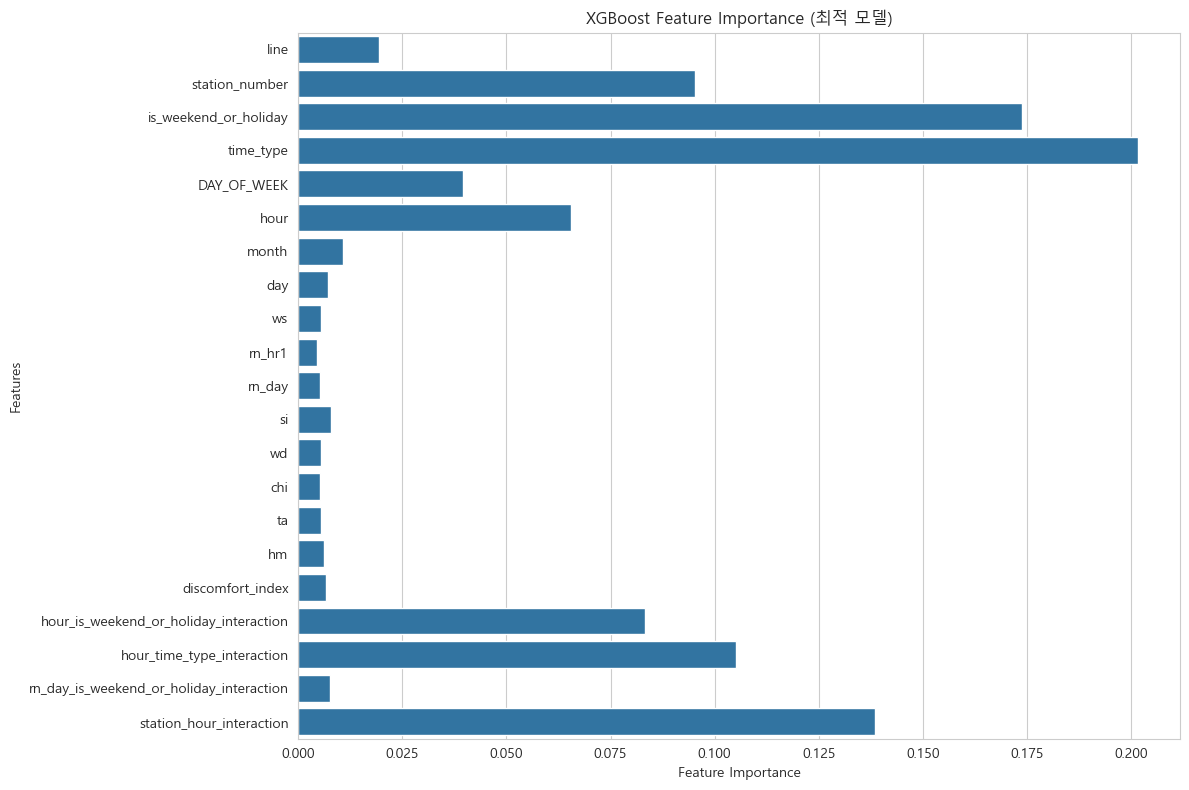


--- ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïû¨ÌïôÏäµ ÏãúÏûë ---

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ RMSE: 12.0930
‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ R¬≤: 0.6649


In [ ]:
# ÏµúÏ†ÅÏùò Î™®Îç∏ Ï†ÄÏû•
best_xgb_model = random_search.best_estimator_

# üìä Feature Importance ÏãúÍ∞ÅÌôî (ÏµúÏ†Å Î™®Îç∏ Í∏∞Ï§Ä)
plt.figure(figsize=(12, 8))
sns.barplot(x=best_xgb_model.feature_importances_, y=final_model_features)
plt.title("XGBoost Feature Importance (ÏµúÏ†Å Î™®Îç∏)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏)
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ X, yÎ°ú Î∂ÑÌï†ÌñàÏúºÎØÄÎ°ú, Îã§Ïãú train_test_splitÏùÑ ÏàòÌñâÌïòÏó¨ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏
# Ïó¨Í∏∞ÏÑúÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ X_full, y_fullÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î™®Îç∏ Ïû¨ÌïôÏäµ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
# ÌäúÎãùÎêú Î™®Îç∏ÏùÄ ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêòÏóàÏúºÎØÄÎ°ú, ÏµúÏ¢Ö ÌèâÍ∞Ä Ï†ÑÏóê Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.
print("\n--- ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïû¨ÌïôÏäµ ÏãúÏûë ---")

# 1. best_xgb_modelÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
params = best_xgb_model.get_params()

# 2. ÌïÑÏöîÌïú Í≤ΩÏö∞ ÌäπÏ†ï ÌååÎùºÎØ∏ÌÑ∞Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ±∞ÎÇò Ï∂îÍ∞ÄÌï©ÎãàÎã§.
# (Ïù¥ Î∂ÄÎ∂ÑÏùÄ best_xgb_modelÏóê Ïù¥ÎØ∏ tree_methodÏôÄ random_stateÍ∞Ä ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú,
#  ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏàòÏ†ï ÏóÜÏù¥ paramsÎßå ÏÇ¨Ïö©ÌïòÎ©¥ Îê©ÎãàÎã§.)
# params['tree_method'] = "gpu_hist"
# params['random_state'] = 42

# 3. ÏóÖÎç∞Ïù¥Ìä∏Îêú ÌååÎùºÎØ∏ÌÑ∞Î°ú XGBRegressorÎ•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
final_model_for_evaluation = XGBRegressor(**params) # **paramsÎßå ÏÇ¨Ïö©

final_model_for_evaluation.fit(X_train_final, y_train_final)

final_preds = final_model_for_evaluation.predict(X_test_final)
final_rmse = np.sqrt(mean_squared_error(y_test_final, final_preds))
final_r2 = r2_score(y_test_final, final_preds)

print(f"\n‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ RMSE: {final_rmse:.4f}")
print(f"‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ R¬≤: {final_r2:.4f}")


## ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [34]:
test = "C:/Users/PC/Downloads/test_subway.csv"

In [35]:
try:
    test_df = pd.read_csv(test, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")
except UnicodeDecodeError:
    test_df = pd.read_csv(test, encoding='cp949', on_bad_lines='skip')
    print("CP949 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")

CP949 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.


In [36]:
test_df.columns = test_df.columns.str.lower()

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834752 entries, 0 to 5834751
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tm              int64  
 1   line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   direction       object 
 5   stn             int64  
 6   ta              float64
 7   wd              float64
 8   ws              float64
 9   rn_day          float64
 10  rn_hr1          float64
 11  hm              float64
 12  si              float64
 13  ta_chi          float64
 14  congestion      float64
dtypes: float64(9), int64(4), object(2)
memory usage: 667.7+ MB


In [38]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ïòà: test_df = pd.read_csv('your_data.csv') (Ïù¥ÎØ∏ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
test_df.reset_index(drop=True, inplace=True)

# ‚úÖ 'si' Ìè¨Ìï®
target_columns = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'ta_chi', 'si']
missing_value = -99

for target_col in target_columns:
    print(f"\n\n====== '{target_col}' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======")

    df_predict = test_df[test_df[target_col] == missing_value].copy()
    df_train_candidate = test_df[test_df[target_col] != missing_value].copy()

    print(f"Ï†ÑÏ≤¥ Ìñâ Ïàò: {len(test_df)}")
    print(f"ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò ({target_col} == {missing_value}): {len(df_predict)}")
    print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò ({target_col} != {missing_value}): {len(df_train_candidate)}")

    if len(df_predict) == 0:
        print(f"{target_col} Ïª¨ÎüºÏóê ÎåÄÏ≤¥Ìï† {missing_value} Í∞íÏù¥ ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue

    # ÏàòÏπòÌòï Ïª¨Îüº Ï§ë ÌÉÄÍ≤ü Ï†úÏô∏
    numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col not in [target_col, 'Unnamed: 0']]

    correlation_matrix = df_train_candidate[numerical_cols + [target_col]].corr()
    correlation_with_target = correlation_matrix[target_col].abs().sort_values(ascending=False)

    correlation_threshold = 0.1
    features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
    if target_col in features:
        features.remove(target_col)

    if not features:
        features = numerical_cols
        print(f"{target_col}: ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§Ä ÎßåÏ°±ÌïòÎäî ÌîºÏ≤ò ÏóÜÏùå ‚Üí Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïª¨Îüº ÏÇ¨Ïö©")

    if not features:
        print(f"{target_col}: ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÌîºÏ≤òÍ∞Ä ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue

    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞è ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
    X_train_temp = df_train_candidate[features].replace(missing_value, np.nan)
    df_train_cleaned = df_train_candidate[~X_train_temp.isnull().any(axis=1)].copy()

    if df_train_cleaned.empty:
        print(f"{target_col}: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ïú†Ìö®Ìïú Ìñâ ÏóÜÏùå ‚Üí Í±¥ÎÑàÎúÄ")
        continue

    X_train = df_train_cleaned[features]
    y_train = df_train_cleaned[target_col]

    X_predict = df_predict[features].replace(missing_value, np.nan)

    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(X_train)
    X_predict_imputed = pd.DataFrame(imputer.transform(X_predict), columns=features, index=X_predict.index)

    # Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÏö© Î∂ÑÎ¶¨
    X_eval_train, X_eval_test, y_eval_train, y_eval_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # ‚úÖ XGBoost Î™®Îç∏ (GPU)
    model = XGBRegressor(
        n_estimators=100,
        random_state=42,
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        n_jobs=-1
    )

    model.fit(X_eval_train, y_eval_train)
    y_eval_pred = model.predict(X_eval_test)
    rmse = np.sqrt(mean_squared_error(y_eval_test, y_eval_pred))
    r2 = r2_score(y_eval_test, y_eval_pred)

    print(f"{target_col} ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: {rmse:.4f}, R¬≤: {r2:.4f}")

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ Î∞è ÏòàÏ∏°
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_predict_imputed)
    predicted_series = pd.Series(predicted_values, index=X_predict.index)

    # ÏõêÎ≥∏ dfÏóê Î∞òÏòÅ
    test_df.loc[predicted_series.index, target_col] = predicted_series

    print(f"{target_col}: {missing_value} Í∞í {len(predicted_series)}Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å")
    print(test_df.loc[predicted_series.index, target_col].head())
    print(f"{target_col} Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): {test_df[target_col].min()}")




====== 'ta' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ta == -99): 53228
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ta != -99): 5781524


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ta ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.8514, R¬≤: 0.9936


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ta: -99 Í∞í 53228Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
2363     16.877474
10327    16.877474
16723     0.814480
19958    23.960361
20330    24.745586
Name: ta, dtype: float64
ta Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -17.1


====== 'wd' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (wd == -99): 75302
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (wd != -99): 5759450


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

wd ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 96.4993, R¬≤: 0.1439


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

wd: -99 Í∞í 75302Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     184.538605
2252     180.319122
7616     185.876266
9263     184.538605
10216    180.319122
Name: wd, dtype: float64
wd Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -9.9


====== 'ws' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ws == -99): 75302
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ws != -99): 5759450


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ws ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.8419, R¬≤: 0.4937


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ws: -99 Í∞í 75302Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     1.735513
2252     1.030300
7616     1.687735
9263     1.735513
10216    1.030300
Name: ws, dtype: float64
ws Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): 0.0


====== 'rn_day' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (rn_day == -99): 129062
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (rn_day != -99): 5705690


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_day ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 6.3346, R¬≤: 0.4267


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_day: -99 Í∞í 129062Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
787    1.700097
788    1.678675
789    1.678675
790    1.238600
791    1.678675
Name: rn_day, dtype: float64
rn_day Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -1.1512452363967896


====== 'rn_hr1' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (rn_hr1 == -99): 131754
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (rn_hr1 != -99): 5702998


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_hr1 ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.9513, R¬≤: 0.3106


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_hr1: -99 Í∞í 131754Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
787    0.386634
788    0.365639
789    0.365639
790    0.252377
791    0.365639
Name: rn_hr1, dtype: float64
rn_hr1 Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -0.06277647614479065


====== 'hm' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (hm == -99): 101000
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (hm != -99): 5733752


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

hm ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 11.3988, R¬≤: 0.6867


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

hm: -99 Í∞í 101000Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     65.131065
2354     68.464745
2363     56.399815
9263     65.131065
10318    68.464745
Name: hm, dtype: float64
hm Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): 1.5


====== 'ta_chi' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ta_chi == -99): 0
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ta_chi != -99): 5834752
ta_chi Ïª¨ÎüºÏóê ÎåÄÏ≤¥Ìï† -99 Í∞íÏù¥ ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.


====== 'si' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (si == -99): 2366482
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (si != -99): 3468270


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

si ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.6712, R¬≤: 0.5383


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

si: -99 Í∞í 2366482Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
0    0.209054
1    0.160357
2    0.167832
3    0.221529
4    0.225197
Name: si, dtype: float64
si Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -0.616051435470581


In [39]:
test_df.describe()

tm          line  station_number           stn            ta  \
count  5.834752e+06  5.834752e+06    5.834752e+06  5.834752e+06  5.834752e+06   
mean   2.024067e+09  4.115423e+00    1.739918e+03  4.295553e+02  1.465636e+01   
std    3.460984e+04  2.223608e+00    1.202521e+03  1.408695e+02  1.091389e+01   
min    2.024010e+09  1.000000e+00    1.500000e+02  9.800000e+01 -1.710000e+01   
25%    2.024040e+09  2.000000e+00    4.100000e+02  4.070000e+02  4.700000e+00   
50%    2.024070e+09  4.000000e+00    1.910000e+03  4.180000e+02  1.570000e+01   
75%    2.024100e+09  6.000000e+00    2.633000e+03  4.350000e+02  2.420000e+01   
max    2.024123e+09  8.000000e+00    9.006000e+03  8.890000e+02  3.840000e+01   

                 wd            ws        rn_day        rn_hr1            hm  \
count  5.834752e+06  5.834752e+06  5.834752e+06  5.834752e+06  5.834752e+06   
mean   1.810395e+02  1.591341e+00  1.786164e+00  1.420337e-01  6.536836e+01   
std    1.038024e+02  1.205301e+00  8.241215e+00  1.132919e+00  1.995690e+01   
min   -9.900000e+00  0.000000e+00 -1.151245e+00 -6.277648e-02  1.500000e+00   
25%    8.510000e+01  7.000000e-01  0.000000e+00  0.000000e+00  5.030000e+01   
50%    1.968000e+02  1.400000e+00  0.000000e+00  0.000000e+00  6.580000e+01   
75%    2.677000e+02  2.200000e+00  0.000000e+00  0.000000e+00  8.130000e+01   
max    3.600000e+02  1.100000e+01  2.825000e+02  7.850000e+01  1.000000e+02   

                 si        ta_chi  congestion  
count  5.834752e+06  5.834752e+06         0.0  
mean   8.761685e-01  1.492001e+01         NaN  
std    8.489667e-01  1.184607e+01         NaN  
min   -6.160514e-01 -2.080000e+01         NaN  
25%    2.341500e-01  3.900000e+00         NaN  
50%    5.536912e-01  1.600000e+01         NaN  
75%    1.309521e+00  2.570000e+01         NaN  
max    3.900000e+00  3.760000e+01         NaN

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ïòà: test_df = pd.read_csv('your_data.csv')  (Ïù¥ÎØ∏ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
test_df.reset_index(drop=True, inplace=True)

target_columns = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'ta_chi']
missing_value = -99

for target_col in target_columns:
    print(f"\n\n====== '{target_col}' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======")
    
    df_predict = test_df[test_df[target_col] == missing_value].copy()
    df_train_candidate = test_df[test_df[target_col] != missing_value].copy()
    
    print(f"Ï†ÑÏ≤¥ Ìñâ Ïàò: {len(test_df)}")
    print(f"ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò ({target_col} == {missing_value}): {len(df_predict)}")
    print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò ({target_col} != {missing_value}): {len(df_train_candidate)}")
    
    if len(df_predict) == 0:
        print(f"{target_col} Ïª¨ÎüºÏóê ÎåÄÏ≤¥Ìï† {missing_value} Í∞íÏù¥ ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue
    
    # ÏàòÏπòÌòï Ïª¨Îüº Ï§ë ÌÉÄÍ≤ü Ï†úÏô∏
    numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col not in [target_col, 'Unnamed: 0']]
    
    correlation_matrix = df_train_candidate[numerical_cols + [target_col]].corr()
    correlation_with_target = correlation_matrix[target_col].abs().sort_values(ascending=False)
    
    correlation_threshold = 0.1
    features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
    if target_col in features:
        features.remove(target_col)
    
    if not features:
        features = numerical_cols
        print(f"{target_col}: ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§Ä ÎßåÏ°±ÌïòÎäî ÌîºÏ≤ò ÏóÜÏùå ‚Üí Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïª¨Îüº ÏÇ¨Ïö©")
    
    if not features:
        print(f"{target_col}: ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÌîºÏ≤òÍ∞Ä ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue
    
    X_train_temp = df_train_candidate[features].replace(missing_value, np.nan)
    df_train_cleaned = df_train_candidate[~X_train_temp.isnull().any(axis=1)].copy()
    
    if df_train_cleaned.empty:
        print(f"{target_col}: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ïú†Ìö®Ìïú Ìñâ ÏóÜÏùå ‚Üí Í±¥ÎÑàÎúÄ")
        continue
    
    X_train = df_train_cleaned[features]
    y_train = df_train_cleaned[target_col]
    
    X_predict = df_predict[features].replace(missing_value, np.nan)
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(X_train)
    X_predict_imputed = pd.DataFrame(imputer.transform(X_predict), columns=features, index=X_predict.index)
    
    # Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_eval_train, X_eval_test, y_eval_train, y_eval_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # ‚úÖ GPU Í∏∞Î∞ò XGBoost Î™®Îç∏
    model = XGBRegressor(
        n_estimators=100,
        random_state=42,
        tree_method='gpu_hist',        # GPU ÏÇ¨Ïö©
        predictor='gpu_predictor',
        n_jobs=-1
    )
    
    model.fit(X_eval_train, y_eval_train)
    y_eval_pred = model.predict(X_eval_test)
    rmse = np.sqrt(mean_squared_error(y_eval_test, y_eval_pred))
    r2 = r2_score(y_eval_test, y_eval_pred)
    
    print(f"{target_col} ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: {rmse:.4f}, R¬≤: {r2:.4f}")
    
    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_predict_imputed)
    predicted_series = pd.Series(predicted_values, index=X_predict.index)
    
    # ÏõêÎ≥∏Ïóê Î∞òÏòÅ
    test_df.loc[predicted_series.index, target_col] = predicted_series
    
    print(f"{target_col}: {missing_value} Í∞í {len(predicted_series)}Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å")
    print(test_df.loc[predicted_series.index, target_col].head())
    print(f"{target_col} Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): {test_df[target_col].min()}")




====== 'ta' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ta == -99): 53228
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ta != -99): 5781524


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:06:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ta ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.9284, R¬≤: 0.9928


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ta: -99 Í∞í 53228Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
2363     16.764078
10327    16.764078
16723    -0.596618
19958    23.773064
20330    24.401443
Name: ta, dtype: float64
ta Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -17.1


====== 'wd' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (wd == -99): 75302
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (wd != -99): 5759450


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

wd ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 96.4993, R¬≤: 0.1439


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

wd: -99 Í∞í 75302Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     184.538605
2252     180.319122
7616     185.876266
9263     184.538605
10216    180.319122
Name: wd, dtype: float64
wd Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -9.9


====== 'ws' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ws == -99): 75302
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ws != -99): 5759450


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ws ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.8549, R¬≤: 0.5025


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

ws: -99 Í∞í 75302Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     1.564491
2252     1.552609
7616     1.562247
9263     1.564491
10216    1.552609
Name: ws, dtype: float64
ws Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): 0.0


====== 'rn_day' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (rn_day == -99): 129062
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (rn_day != -99): 5705690


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_day ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 5.7889, R¬≤: 0.5212


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_day: -99 Í∞í 129062Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
787    2.409532
788    2.095265
789    2.095265
790    1.732072
791    2.537880
Name: rn_day, dtype: float64
rn_day Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -4.193172931671143


====== 'rn_hr1' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (rn_hr1 == -99): 131754
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (rn_hr1 != -99): 5702998


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_hr1 ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 0.6834, R¬≤: 0.6442


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

rn_hr1: -99 Í∞í 131754Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
787    0.492968
788    0.476891
789    0.476891
790    0.443573
791    0.837189
Name: rn_hr1, dtype: float64
rn_hr1 Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): -0.576958179473877


====== 'hm' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (hm == -99): 101000
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (hm != -99): 5733752


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:07:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

hm ÏÑ±Îä•ÌèâÍ∞Ä - RMSE: 10.4851, R¬≤: 0.7269


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:08:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:08:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:08:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

hm: -99 Í∞í 101000Í∞ú ÏòàÏ∏°Í∞íÏúºÎ°ú ÎåÄÏ≤¥ ÏôÑÎ£å
1299     67.466064
2354     67.142639
2363     51.769196
9263     67.466064
10318    67.142639
Name: hm, dtype: float64
hm Ïª¨Îüº ÏµúÏÜåÍ∞í (ÎåÄÏ≤¥ ÌõÑ): 1.5


====== 'ta_chi' Ïª¨Îüº Ï≤òÎ¶¨ ÏãúÏûë ======
Ï†ÑÏ≤¥ Ìñâ Ïàò: 5834752
ÏòàÏ∏° ÎåÄÏÉÅ Ìñâ Ïàò (ta_chi == -99): 0
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌõÑÎ≥¥ Ïàò (ta_chi != -99): 5834752
ta_chi Ïª¨ÎüºÏóê ÎåÄÏ≤¥Ìï† -99 Í∞íÏù¥ ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.


In [25]:
test_df['chi'] = test_df['ta_chi']

In [ ]:
test_df.drop(columns=['ta_chi'], inplace=True)

In [ ]:
import pandas as pd

# 1. ÎÇ†Ïßú Ï∂îÏ∂ú
test_df['date_dt'] = test_df['tm'].astype(str).str[:8]
test_df['date_dt'] = pd.to_datetime(test_df['date_dt'], format='%Y%m%d')

# 2. ÏöîÏùºÎ°ú Ï£ºÎßê Ïó¨Î∂Ä Í≥ÑÏÇ∞ (ÌÜ†/Ïùº ‚Üí 1)
test_df['weekday'] = test_df['date_dt'].dt.weekday
test_df['is_weekend'] = test_df['weekday'].isin([5, 6])

# 3. 2024ÎÖÑ Í≥µÌú¥Ïùº Ï†ïÏùò
holidays_2024 = [
    "2024-01-01",  # Ïã†Ï†ï
    "2024-02-09", "2024-02-10", "2024-02-11", "2024-02-12",  # ÏÑ§ÎÇ† Ïó∞Ìú¥
    "2024-03-01",  # ÏÇºÏùºÏ†à
    "2024-05-05", "2024-05-06",  # Ïñ¥Î¶∞Ïù¥ÎÇ† + ÎåÄÏ≤¥Í≥µÌú¥Ïùº
    "2024-05-15",  # Î∂ÄÏ≤òÎãòÏò§Ïã†ÎÇ†
    "2024-06-06",  # ÌòÑÏ∂©Ïùº
    "2024-07-17",  # Ï†úÌóåÏ†à
    "2024-08-15",  # Í¥ëÎ≥µÏ†à
    "2024-09-16", "2024-09-17", "2024-09-18",  # Ï∂îÏÑù Ïó∞Ìú¥
    "2024-10-03",  # Í∞úÏ≤úÏ†à
    "2024-10-09",  # ÌïúÍ∏ÄÎÇ†
    "2024-12-25",  # ÏÑ±ÌÉÑÏ†à
]
holiday_dates = pd.to_datetime(holidays_2024)
test_df['is_holiday'] = test_df['date_dt'].isin(holiday_dates)

# 4. Ï£ºÎßê or Í≥µÌú¥Ïùº ‚Üí 1, ÏïÑÎãàÎ©¥ 0
test_df['is_weekend_or_holiday'] = ((test_df['is_weekend']) | (test_df['is_holiday'])).astype(int)

# 5. Î∂àÌïÑÏöîÌïú Ï§ëÍ∞Ñ Ïª¨Îüº Ï†úÍ±∞ (ÏÑ†ÌÉù)
test_df.drop(columns=['weekday', 'is_weekend', 'is_holiday'], inplace=True)

# Í≤∞Í≥º ÏòàÏãú ÌôïÏù∏
print(test_df[['tm', 'is_weekend_or_holiday']].head())


           tm  is_weekend_or_holiday
0  2024010100                      1
1  2024010101                      1
2  2024010102                      1
3  2024010105                      1
4  2024010106                      1


In [199]:
# ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Ïõî Ï†ïÎ≥¥ Ï∂îÍ∞Ä
test_df['date_dt'] = pd.to_datetime(test_df['date_dt'])
test_df['month'] = test_df['date_dt'].dt.month  # Ïó¨Í∏∞ÏÑú .dt.month ÏÇ¨Ïö©

# Ïó¨Î¶ÑÏ≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (5~9Ïõî)
def summer_chi(ta, rh):
    try:
        tw = (
            ta * np.arctan(0.151977 * np.sqrt(rh + 8.313659)) +
            np.arctan(ta + rh) -
            np.arctan(rh - 1.676331) +
            0.00391838 * rh ** 1.5 * np.arctan(0.023101 * rh) -
            4.686035
        )
        chi = -0.2442 + 0.55399 * tw + 0.45535 * ta - 0.0022 * tw**2 - 0.00278 * tw * ta + 3.0
        return chi
    except:
        return np.nan

# Í≤®Ïö∏Ï≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (10~4Ïõî)
def winter_chi(ta, v):
    try:
        v_16 = v ** 0.16
        chi = 13.12 + 0.6215 * ta - 11.37 * v_16 + 0.3965 * v_16 * ta
        return chi
    except:
        return np.nan

# Ï†ÑÏ≤¥ Ï≤¥Í∞êÏò®ÎèÑ Í≥ÑÏÇ∞
def calculate_chi(row):
    if 5 <= row['month'] <= 9:
        return summer_chi(row['ta'], row['hm'])
    else:
        return winter_chi(row['ta'], row['ws'])

# Í≥ÑÏÇ∞ Ï†ÅÏö©
test_df['calculated_chi'] = test_df.apply(calculate_chi, axis=1)

# Î∞òÏò¨Î¶º
test_df['chi_rounded'] = test_df['chi'].round(1)
test_df['calculated_chi_rounded'] = test_df['calculated_chi'].round(1)

# ÏùºÏπò Ïó¨Î∂Ä ÌôïÏù∏
test_df['is_same'] = test_df['chi_rounded'] == test_df['calculated_chi_rounded']
match_rate = test_df['is_same'].mean()

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: {match_rate * 100:.2f}%')


Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: 0.46%


In [201]:
# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Î∞òÏò¨Î¶º Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥)
test_df['chi_diff'] = test_df['chi'] - test_df['calculated_chi']

# Î∞òÏò¨Î¶º ÌõÑ Í∏∞Ï§ÄÏúºÎ°ú Îã§Î•¥Îã§Í≥† ÌåêÎã®Îêú Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
not_matched_df = test_df[test_df['is_same'] == False]

# Ï∞®Ïù¥ ÌÜµÍ≥Ñ
diff_stats = not_matched_df['chi_diff'].describe()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):")
print(diff_stats)

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÌèâÍ∑† Ïò§Ï∞®ÎèÑ ÌôïÏù∏
mean_abs_error = not_matched_df['chi_diff'].abs().mean()
print(f"\nÎ∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: {mean_abs_error:.2f}¬∞C")


Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):
count    5.808144e+06
mean    -1.593834e-01
std      3.489507e+00
min     -2.015360e+01
25%     -2.381021e+00
50%     -9.000308e-01
75%      2.910610e+00
max      9.040812e+00
Name: chi_diff, dtype: float64

Î∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: 2.86¬∞C


In [202]:
test_df['chi'] = test_df['calculated_chi']
test_df = test_df.drop(columns=['calculated_chi_rounded', 'chi_rounded', 'calculated_chi', 'chi_diff'], axis=1)

### Î∂àÏæåÏßÄÏàò

In [204]:
test_df['hm'].unique()

array([99.        , 99.4       , 99.6       , ..., 94.41311646,
       87.33305359, 70.1960907 ])

In [203]:
# Î∂àÏæåÏßÄÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_discomfort_index(ta, rh):
    try:
        return 0.81 * ta + 0.01 * rh * (0.99 * ta - 14.3) + 46.3
    except:
        return np.nan

# Ï†ÅÏö©
test_df['discomfort_index'] = test_df.apply(lambda row: calculate_discomfort_index(row['ta'], row['hm']), axis=1)

# ÏòàÏãú Ï∂úÎ†•
print(test_df[['ta', 'hm', 'discomfort_index']].head())


    ta    hm  discomfort_index
0  0.6  99.0         33.217060
1  0.0  99.4         32.085800
2  0.3  99.6         32.596012
3 -0.1  98.1         32.093581
4 -0.6  99.0         31.068940


In [ ]:
# Î∂àÏæåÏßÄÏàò Îì±Í∏â Î∂ÑÎ•ò
def classify_di(di):
    if di <= 68:
        return 'ÏæåÏ†Å'
    elif di <= 75:
        return 'Î∂àÏæå Ï¶ùÍ∞Ä'
    elif di <= 80:
        return 'Ï†àÎ∞ò Ïù¥ÏÉÅ Î∂àÏæå'
    else:
        return 'Îß§Ïö∞ Î∂àÏæå'

test_df['di_level'] = test_df['discomfort_index'].apply(classify_di)

# ÌôïÏù∏
print(test_df[['discomfort_index', 'di_level']].value_counts())

### Í∞ïÏàòÎüâ

In [205]:
# ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©Í≥Ñ Í≥ÑÏÇ∞ (ÌïòÎ£® Îã®ÏúÑ)
hourly_rain_sum = test_df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
hourly_rain_sum.rename(columns={'rn_hr1': 'daily_rn_hr1_sum'}, inplace=True)


In [206]:
# Ïùº Í∞ïÏàòÎüâ Ï†ïÎ≥¥ Ï∂îÏ∂ú
daily_rn_day = test_df[['date_dt', 'station_name', 'rn_day']].drop_duplicates()


In [207]:
# Î≥ëÌï©
rain_compare = pd.merge(hourly_rain_sum, daily_rn_day, on=['date_dt', 'station_name'])

# Ï∞®Ïù¥ Í≥ÑÏÇ∞
rain_compare['diff'] = (rain_compare['daily_rn_hr1_sum'] - rain_compare['rn_day']).round(2)


In [208]:
# ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ ÎπÑÏú®
match_rate = (rain_compare['diff'].abs() < 0.01).mean() * 100
print(f"Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: {match_rate:.2f}%")

# Î∂àÏùºÏπò ÏÉòÌîå
rain_compare[rain_compare['diff'].abs() >= 0.01].head()


Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: 25.45%


date_dt station_name  daily_rn_hr1_sum    rn_day  diff
0 2024-01-01           Í∞ÄÎä•          1.926877  1.484352  0.44
1 2024-01-01           Í∞ÄÎä•          1.926877  0.000000  1.93
2 2024-01-01           Í∞ÄÎä•          1.926877  0.197432  1.73
3 2024-01-01           Í∞ÄÎä•          1.926877  0.425183  1.50
4 2024-01-01           Í∞ÄÎä•          1.926877  0.384946  1.54

In [211]:
# ÎßåÏïΩ tm Ïª¨ÎüºÏù¥ 'YYYYMMDDHH' ÌòïÏãù(Ïòà: 2024010101)Ïù¥ÎùºÎ©¥
test_df['hour'] = test_df['tm'].astype(str).str[-2:].astype(int)

# ÎòêÎäî date_dtÍ∞Ä datetime ÌÉÄÏûÖÏù¥Î©¥
# test_df['hour'] = test_df['date_dt'].dt.hour

In [212]:
# 1. Ïùº Í∞ïÏàòÎüâ Í≥ÑÏÇ∞ (date_dt + station_name Í∏∞Ï§Ä)
new_rn_day = test_df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
new_rn_day.rename(columns={'rn_hr1': 'rn_day_new'}, inplace=True)

# 2. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
test_df = pd.merge(test_df.drop(columns=['rn_day']), new_rn_day, on=['date_dt', 'station_name'], how='left')

# 3. Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨ (ÏÑ†ÌÉù)
cols = test_df.columns.tolist()
# rn_day_newÎ•º rn_dayÎ°ú Ïù¥Î¶Ñ Î≥ÄÍ≤ΩÌïòÏó¨ Í∏∞Ï°¥ ÏúÑÏπòÎ°ú
cols[cols.index('rn_day_new')] = 'rn_day'
test_df.columns = cols
test_df.rename(columns={'rn_day_new': 'rn_day'}, inplace=True)

# 4. ÌôïÏù∏
print(test_df[['date_dt', 'station_name', 'hour', 'rn_hr1', 'rn_day']].head(10))


     date_dt station_name  hour  rn_hr1  rn_day
0 2024-01-01          ÏÑúÏö∏Ïó≠     0     0.0     0.0
1 2024-01-01          ÏÑúÏö∏Ïó≠     1     0.0     0.0
2 2024-01-01          ÏÑúÏö∏Ïó≠     2     0.0     0.0
3 2024-01-01          ÏÑúÏö∏Ïó≠     5     0.0     0.0
4 2024-01-01          ÏÑúÏö∏Ïó≠     6     0.0     0.0
5 2024-01-01          ÏÑúÏö∏Ïó≠     7     0.0     0.0
6 2024-01-01          ÏÑúÏö∏Ïó≠     8     0.0     0.0
7 2024-01-01          ÏÑúÏö∏Ïó≠     9     0.0     0.0
8 2024-01-01          ÏÑúÏö∏Ïó≠    10     0.0     0.0
9 2024-01-01          ÏÑúÏö∏Ïó≠    11     0.0     0.0


In [210]:
test_df

tm  line  station_number station_name direction  stn   ta  \
0        2024010100     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  0.6   
1        2024010101     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  0.0   
2        2024010102     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  0.3   
3        2024010105     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -0.1   
4        2024010106     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -0.6   
...             ...   ...             ...          ...       ...  ...  ...   
5834747  2024123119     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.2   
5834748  2024123120     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.0   
5834749  2024123121     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -2.0   
5834750  2024123122     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -3.0   
5834751  2024123123     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -3.4   

            wd   ws  rn_hr1    hm        si  congestion        chi    date_dt  \
0        161.4  2.7     0.0  99.0  0.222748         NaN   0.443357 2024-01-01   
1        145.7  3.8     0.0  99.4  0.235187         NaN  -0.957510 2024-01-01   
2        171.3  3.1     0.0  99.6  0.147599         NaN  -0.177307 2024-01-01   
3        176.0  3.0     0.0  98.1  0.140145         NaN  -0.544430 2024-01-01   
4        174.4  3.9     0.0  99.0  0.117700         NaN  -1.684816 2024-01-01   
...        ...  ...     ...   ...       ...         ...        ...        ...   
5834747  255.7  0.2     0.0  35.1  1.133472         NaN   4.145691 2024-12-31   
5834748  251.6  0.2     0.0  35.1  1.133472         NaN   4.331287 2024-12-31   
5834749    0.0  0.0     0.0  41.6  1.191267         NaN  11.877000 2024-12-31   
5834750    0.0  0.0     0.0  46.0  0.704653         NaN  11.255500 2024-12-31   
5834751    0.0  0.0     0.0  51.8  0.447138         NaN  11.006900 2024-12-31   

         is_weekend_or_holiday  month  is_same  discomfort_index  rn_day  
0                            1      1    False         33.217060     0.0  
1                            1      1    False         32.085800     0.0  
2                            1      1    False         32.596012     0.0  
3                            1      1    False         32.093581     0.0  
4                            1      1    False         31.068940     0.0  
...                        ...    ...      ...               ...     ...  
5834747                      0     12    False         41.049202     0.0  
5834748                      0     12    False         41.280700     0.0  
5834749                      0     12    False         37.907520     0.0  
5834750                      0     12    False         35.925800     0.0  
5834751                      0     12    False         34.395012     0.0  

[5834752 rows x 20 columns]

### Ï∂úÍ∑º Ìá¥Í∑º

In [213]:
test_df['year'] = pd.to_datetime(test_df['date_dt']).dt.year
test_df['month'] = pd.to_datetime(test_df['date_dt']).dt.month
test_df['day'] = pd.to_datetime(test_df['date_dt']).dt.day
grouped_all = test_df.groupby(['year', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1']
].mean().reset_index()

In [214]:
def assign_commute_time(hour):
    if 7 <= hour <= 9:
        return 'Ï∂úÍ∑º'
    elif 17 <= hour <= 19:
        return 'Ìá¥Í∑º'
    else:
        return 'Í∏∞ÌÉÄ'

test_df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] = test_df['hour'].apply(assign_commute_time)

### Î™®Îç∏ÎßÅ Ï†ÑÏ≤òÎ¶¨

In [215]:
test_df = test_df.copy()
test_df['DAY_OF_WEEK'] = test_df['date_dt'].dt.dayofweek

In [216]:
# Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
mapping = {'Í∏∞ÌÉÄ': 0, 'Ï∂úÍ∑º': 1, 'Ìá¥Í∑º': 2}

# Í∞í Î≥ÄÌôò Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
test_df['time_type'] = test_df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'].map(mapping)

# Í∏∞Ï°¥ Ïª¨Îüº ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
test_df = test_df.drop(columns=['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])

In [217]:
test_df['direction'] = test_df['direction'].map({'ÏÉÅÏÑ†': 0, 'ÌïòÏÑ†': 1})

In [218]:
final_model_for_evaluation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6550083776583973, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.0682132702100517, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02134735212405891,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=514, n_jobs=None,
             num_parallel_tree=None, ...)

In [220]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834752 entries, 0 to 5834751
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tm                     int64         
 1   line                   int64         
 2   station_number         int64         
 3   station_name           object        
 4   direction              float64       
 5   stn                    int64         
 6   ta                     float64       
 7   wd                     float64       
 8   ws                     float64       
 9   rn_hr1                 float64       
 10  hm                     float64       
 11  si                     float64       
 12  congestion             float64       
 13  chi                    float64       
 14  date_dt                datetime64[ns]
 15  is_weekend_or_holiday  int32         
 16  month                  int32         
 17  is_same                bool          
 18  discomfort_index      

In [231]:
import pandas as pd
import numpy as np
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§Ïù¥ Ïù¥ÎØ∏ ÏûÑÌè¨Ìä∏ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# from category_encoders import TargetEncoder
# from xgboost import XGBRegressor

# --- ÌõàÎ†® Ïãú ÏÇ¨Ïö©Îêú Ïª¨Îüº Ï†ïÏùòÎ•º Îã§Ïãú Í∞ÄÏ†∏ÏòµÎãàÎã§. ---
# Ïù¥ Ï†ïÏùòÎäî ÌõàÎ†® ÏΩîÎìúÏôÄ Ï†ïÌôïÌûà ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§.
cat_cols = [
    'line', 'station_number', 'is_weekend_or_holiday', 'time_type',
    'DAY_OF_WEEK'
]

# TargetEncoderÏùò fit_transformÏóê ÏûÖÎ†•ÎêòÏóàÎçò ÏàòÏπòÌòï Î∞è ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàòÎì§
# (station_hour_interactionÏùÄ Target Encoding Ïù¥ÌõÑÏóê ÏÉùÏÑ±ÎêòÎØÄÎ°ú Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏäµÎãàÎã§.)
num_cols_for_encoder_input = [
    'hour', 'month', 'day',
    'ws', 'rn_hr1', 'rn_day', 'si', 'wd',
    'chi', 'ta', 'hm', 'discomfort_index',
    'hour_is_weekend_or_holiday_interaction',
    'hour_time_type_interaction',
    'rn_day_is_weekend_or_holiday_interaction'
]

# ÌõàÎ†® Ïãú Ï†úÍ±∞ÌñàÎçò Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_drop_after_preprocessing = [
    'calculated_chi', 'calculated_chi_rounded', 'chi_rounded', 'is_same',
    'di_level', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'date_dt'
]

# ÏµúÏ¢Ö Î™®Îç∏Ïóê ÏÇ¨Ïö©Îêú ÌäπÏÑ± Î¶¨Ïä§Ìä∏ (ÌõàÎ†® Ïãú final_model_featuresÏôÄ ÎèôÏùºÌï¥Ïïº Ìï©ÎãàÎã§.)
# Ïù¥ Î¶¨Ïä§Ìä∏Îäî Target EncodingÎêú Î≤îÏ£ºÌòï Î≥ÄÏàò, num_cols_for_encoder_input,
# Í∑∏Î¶¨Í≥† station_hour_interactionÏùÑ Ìè¨Ìï®Ìï©ÎãàÎã§.
final_model_features = cat_cols + num_cols_for_encoder_input + ['station_hour_interaction']

# --- test_df Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë ---

# ÏõêÎ≥∏ test_dfÎ•º ÏßÅÏ†ë ÏàòÏ†ïÌïòÏßÄ ÏïäÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì≠ÎãàÎã§.
test_df_processed = test_df.copy()

# 1. ÎÇ†Ïßú/ÏãúÍ∞Ñ Í¥ÄÎ†® ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
# date_dt Ïª¨ÎüºÏù¥ datetime ÌÉÄÏûÖÏù¥ ÏïÑÎãàÎùºÎ©¥ Î≥ÄÌôòÌï©ÎãàÎã§.
if not pd.api.types.is_datetime64_any_dtype(test_df_processed['date_dt']):
    test_df_processed['date_dt'] = pd.to_datetime(test_df_processed['date_dt'])

test_df_processed['year'] = test_df_processed['date_dt'].dt.year
test_df_processed['month'] = test_df_processed['date_dt'].dt.month
test_df_processed['day'] = test_df_processed['date_dt'].dt.day
test_df_processed['DAY_OF_WEEK'] = test_df_processed['date_dt'].dt.dayofweek

# 2. Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò Ï≤òÎ¶¨Îêú Ïª¨Îüº Ï†úÍ±∞
test_df_processed = test_df_processed.drop(columns=columns_to_drop_after_preprocessing, errors='ignore')

# 3. ÏÉàÎ°úÏö¥ ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± (ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© Ï†Ñ)
test_df_processed['hour_is_weekend_or_holiday_interaction'] = test_df_processed['hour'] * test_df_processed['is_weekend_or_holiday']
test_df_processed['hour_time_type_interaction'] = test_df_processed['hour'] * test_df_processed['time_type']
test_df_processed['rn_day_is_weekend_or_holiday_interaction'] = test_df_processed['rn_day'] * test_df_processed['is_weekend_or_holiday']

# 4. Target Encoding Ï†ÅÏö©
# ÌõàÎ†® Ïãú ÏÇ¨Ïö©Îêú `encoder` Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ `transform` Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
# `TargetEncoder`Îäî `cols`Ïóê ÏßÄÏ†ïÎêú Ïª¨ÎüºÎßå Ïù∏ÏΩîÎî©ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÏùÄ Í∑∏ÎåÄÎ°ú ÌÜµÍ≥ºÏãúÌÇµÎãàÎã§.
X_for_encoding = test_df_processed[cat_cols + num_cols_for_encoder_input].copy()
test_df_encoded_features = encoder.transform(X_for_encoding)

# 5. ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàòÎ•º ÌôúÏö©Ìïú ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± (`station_hour_interaction`)
# `station_number`Îäî `test_df_encoded_features` ÎÇ¥ÏóêÏÑú Ïù¥ÎØ∏ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©Îêú ÏàòÏπòÌòï Í∞íÏûÖÎãàÎã§.
test_df_encoded_features['station_hour_interaction'] = test_df_encoded_features['station_number'] * test_df_encoded_features['hour']

# 6. ÏµúÏ¢Ö Î™®Îç∏Ïóê ÏÇ¨Ïö©Ìï† ÌäπÏÑ± ÏÑ†ÌÉù
# ÌõàÎ†® Ïãú Î™®Îç∏Ïóê ÏûÖÎ†•Îêú ÌäπÏÑ±Îì§Ïùò ÏàúÏÑúÏôÄ Ïù¥Î¶ÑÏù¥ Ï†ïÌôïÌûà ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§.
X_for_prediction = test_df_encoded_features[final_model_features]

# 7. ÏòàÏ∏° ÏàòÌñâ
# ÌõàÎ†®Îêú `final_model_for_evaluation` Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
test_df['predicted_congestion'] = final_model_for_evaluation.predict(X_for_prediction)

print("\n‚úÖ test_dfÏóê 'predicted_congestion' Ïª¨ÎüºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.")
print("\n--- ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞ (ÏÉÅÏúÑ 5Í∞ú) ---")
# ÏõêÎ≥∏ congestion Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ Ìï®Íªò Ï∂úÎ†•ÌïòÏó¨ ÎπÑÍµêÌï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.
if 'congestion' in test_df.columns:
    print(test_df[['congestion', 'predicted_congestion']].head())
else:
    print(test_df[['predicted_congestion']].head())

print(f"\nÏ†ÑÏ≤¥ ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêú test_dfÏùò ÌÅ¨Í∏∞: {test_df.shape}")



‚úÖ test_dfÏóê 'predicted_congestion' Ïª¨ÎüºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.

--- ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞ (ÏÉÅÏúÑ 5Í∞ú) ---
   congestion  predicted_congestion
0         NaN              1.723259
1         NaN              1.623245
2         NaN              3.256090
3         NaN              3.661655
4         NaN              3.319155

Ï†ÑÏ≤¥ ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêú test_dfÏùò ÌÅ¨Í∏∞: (5834752, 26)


In [229]:
test_df['predicted_congestion']

0           1.723259
1           1.623245
2           3.256090
3           3.661655
4           3.319155
             ...    
5834747    22.436398
5834748    17.648264
5834749    17.896255
5834750    17.710747
5834751    12.776508
Name: predicted_congestion, Length: 5834752, dtype: float32

In [232]:
# 1. NaN Í∞íÏù¥ ÏóÜÎäî Í≤ΩÏö∞:
test_df['predicted_congestion'] = np.round(test_df['predicted_congestion']).astype(int)

# 2. NaN Í∞íÏù¥ ÏûàÏùÑ Ïàò ÏûàÎäî Í≤ΩÏö∞ (pandas 1.0 Ïù¥ÏÉÅÏóêÏÑú Í∂åÏû•):
# test_df['predicted_congestion'] = np.round(test_df['predicted_congestion']).astype('Int64')
# 'Int64'Îäî NaNÏùÑ ÌóàÏö©ÌïòÎäî Ï†ïÏàòÌòï ÌÉÄÏûÖÏûÖÎãàÎã§.

print(f"\n'predicted_congestion' Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ {test_df['predicted_congestion'].dtype}Î°ú Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§.")
print("\n--- 'predicted_congestion' Ïª¨Îüº ÎØ∏Î¶¨Î≥¥Í∏∞ (ÏÉÅÏúÑ 5Í∞ú) ---")
print(test_df['predicted_congestion'].head())


'predicted_congestion' Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ int32Î°ú Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§.

--- 'predicted_congestion' Ïª¨Îüº ÎØ∏Î¶¨Î≥¥Í∏∞ (ÏÉÅÏúÑ 5Í∞ú) ---
0    2
1    2
2    3
3    4
4    3
Name: predicted_congestion, dtype: int32


In [233]:
import pandas as pd
import numpy as np

# 1. 'predicted_congestion' Ïª¨ÎüºÎ™ÖÏùÑ 'Congestion'ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
# test_dfÎäî Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏòàÏ∏°Í∞íÏù¥ Ï∂îÍ∞ÄÎêú DataFrameÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
if 'predicted_congestion' in test_df.columns:
    test_df = test_df.rename(columns={'predicted_congestion': 'Congestion'})
    print("‚úÖ 'predicted_congestion' Ïª¨ÎüºÎ™ÖÏù¥ 'Congestion'ÏúºÎ°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§.")
else:
    print("‚ö†Ô∏è 'predicted_congestion' Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥ÎØ∏ Ïù¥Î¶ÑÏù¥ Î≥ÄÍ≤ΩÎêòÏóàÍ±∞ÎÇò Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.")

# 2. Î≥ÄÍ≤ΩÎêú 'Congestion' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌï©ÎãàÎã§.
if 'Congestion' in test_df.columns:
    congestion_column_df = test_df[['Congestion']] # DataFrame ÌòïÌÉúÎ°ú Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥Ï§ë ÎåÄÍ¥ÑÌò∏ ÏÇ¨Ïö©
    
    # 3. Ìï¥Îãπ Ïª¨ÎüºÏùÑ 'Congestion_predictions.csv' ÌååÏùºÎ°ú EUC-KR Ïù∏ÏΩîÎî©ÌïòÏó¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
    output_filename = 'Congestion_predictions.csv'
    try:
        congestion_column_df.to_csv(output_filename, index=False, encoding='euc-kr')
        print(f"‚úÖ 'Congestion' Ïª¨ÎüºÏù¥ '{output_filename}' ÌååÏùºÎ°ú EUC-KR Ïù∏ÏΩîÎî©ÎêòÏñ¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    except Exception as e:
        print(f"‚ùå ÌååÏùº Ï†ÄÏû• Ï§ë Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
else:
    print("‚ö†Ô∏è 'Congestion' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

print("\n--- 'test_df'Ïùò Ïª¨Îüº Î™©Î°ù (Ïù¥Î¶Ñ Î≥ÄÍ≤Ω ÌõÑ) ---")
print(test_df.columns.tolist())


‚úÖ 'predicted_congestion' Ïª¨ÎüºÎ™ÖÏù¥ 'Congestion'ÏúºÎ°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§.
‚úÖ 'Congestion' Ïª¨ÎüºÏù¥ 'Congestion_predictions.csv' ÌååÏùºÎ°ú EUC-KR Ïù∏ÏΩîÎî©ÎêòÏñ¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

--- 'test_df'Ïùò Ïª¨Îüº Î™©Î°ù (Ïù¥Î¶Ñ Î≥ÄÍ≤Ω ÌõÑ) ---
['tm', 'line', 'station_number', 'station_name', 'direction', 'stn', 'ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'congestion', 'chi', 'date_dt', 'is_weekend_or_holiday', 'month', 'is_same', 'discomfort_index', 'hour', 'rn_day', 'year', 'day', 'DAY_OF_WEEK', 'time_type', 'Congestion']


In [234]:
congestion_column_df

Congestion
0                 2
1                 2
2                 3
3                 4
4                 3
...             ...
5834747          22
5834748          18
5834749          18
5834750          18
5834751          13

[5834752 rows x 1 columns]